In [1]:
# Importing the important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import email

In [2]:
emails = []
with open('fradulent_emails.txt', "rb") as f:
    fh = f.read().decode("cp437")    # Decoded this to remove the use of binaries in this code
    
contents = re.split('From r', fh)
contents.pop(0)
for item in contents:
    emails_dict = {}
    sender = re.search('From:.*', item)
    #print(sender)
    if sender is not None:
        s_email = re.search('\w\S*@.*\w', sender.group())
        s_name = re.search('\".*\"', sender.group())
    else:
        s_email = None
        s_name = None
    if s_email is not None:
        sender_email = s_email.group()
    else:
        sender_email = None
    emails_dict['sender_email'] = sender_email
    #print(emails_dict)
    if s_name is not None:
        sender_name = s_name.group()
    else:
        sender_name = None
    emails_dict['sender_name'] = sender_name
    #print(emails_dict)
    
    # Recipient
    recipient = re.search('To:.*', item)
    #print(recipient.group())
    if recipient is not None:
        r_email = re.search('\w\S*@.*\w', recipient.group())
        r_name = re.search('\".*\"', recipient.group())
    else:
        r_email = None
        r_name = None
    
    if r_email is not None:
        recipient_email = r_email.group()
    else:
        recipient_email = None
    emails_dict['recipient_email'] = recipient_email
    #print(emails_dict)
    if r_name is not None:
        recipient_name = r_name.group()
    else:
        recipient_name = None
    emails_dict['recipient_name'] = recipient_name
    #print(emails_dict)
    
    #Getting the date of the emails
    date_field = re.search("Date:.*", item)
    #print(date_field.group())
    if date_field is not None:
        date = re.search("\d+\s\w+\s\d+", date_field.group())
    else:
        date = None
    if date is not None:
        date_sent = date.group()
    else:
        date_sent = None
    emails_dict['date_sent'] = date_sent
    #print(emails_dict)

    #Getting the subject
    subject_field = re.search('Subject:.*', item)
    if subject_field is not None:
        subject = re.sub('Subject:', '', subject_field.group())
    else:
        subject = None
    emails_dict['subject'] = subject
    #print(emails_dict)

    #Getting email body
    full_email = email.message_from_string(item)
    #print(full_email.get_payload())
    body = full_email.get_payload()
    emails_dict['email_body'] = body
    #print(emails_dict)
    emails.append(emails_dict)
emails_df = pd.DataFrame(emails)
emails_df

sender_email           sender_name  \
0       james_ngola2002@maktoob.com    "MR. JAMES NGOLA."   
1      bensul2004nng@spinfinder.com     "Mr. Ben Suleman"   
2              obong_715@epatra.com  "PRINCE OBONG ELEME"   
3              obong_715@epatra.com  "PRINCE OBONG ELEME"   
4                m_abacha03@www.com       "Maryam Abacha"   
...                             ...                   ...   
3972  michealagu0255@zipmail.com.br                  None   
3973       ali_sherif252@hotmail.fr                  None   
3974  drusmanibrahimtg08@hotmail.fr                  None   
3975     motherdorisk61@hotmail.com                  None   
3976                           None                  None   

                  recipient_email recipient_name    date_sent  \
0     james_ngola2002@maktoob.com           None  31 Oct 2002   
1                             R@M           None  31 Oct 2002   
2            obong_715@epatra.com           None  31 Oct 2002   
3            webmaster@aclweb.org           None  31 Oct 2002   
4              m_abacha03@www.com           None   1 Nov 2002   
...                           ...            ...          ...   
3972                         None           None         None   
3973    ali_sherif105@yahoo.co.uk           None  17 Sep 2007   
3974    drusmanibrahim.tg@homs.cc           None  18 Sep 2007   
3975   motherdorisk9@yahoo.com.hk           None  19 Sep 2007   
3976                         None           None  19 Sep 2007   

                                                subject  \
0            URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
1                   URGENT ASSISTANCE /RELATIONSHIP (P)   
2                                       GOOD DAY TO YOU   
3                                       GOOD DAY TO YOU   
4                               I Need Your Assistance.   
...                                                 ...   
3972   =?iso-8859-1?Q?CONTACT=20GLOBAL=20MAX=20SHIPI...   
3973                                   TREAT AS URGENT.   
3974   From Dr Usman Ibrahim / Mr Wahid Yoffe property.   
3975                            My Beloved In Christ.     
3976                                          ATTENTION   

                                             email_body  
0     FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...  
1     Dear Friend,\n\nI am Mr. Ben Suleman a custom ...  
2     FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...  
3     FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...  
4     Dear sir, \n \nIt is with a heart full of hope...  
...                                                 ...  
3972  Atten: My Dear ,\n \nI have Paid the fee for y...  
3973  [[Content-Type, Content-Transfer-Encoding], [C...  
3974  [[Content-Type, Content-Transfer-Encoding], [C...  
3975  \nBeloved in the Lord Jesus Christ, PLEASE END...  
3976  [[Content-Type, Content-Transfer-Encoding], [C...  

[3977 rows x 7 columns]

In [3]:
emails_df.head()

sender_email           sender_name  \
0   james_ngola2002@maktoob.com    "MR. JAMES NGOLA."   
1  bensul2004nng@spinfinder.com     "Mr. Ben Suleman"   
2          obong_715@epatra.com  "PRINCE OBONG ELEME"   
3          obong_715@epatra.com  "PRINCE OBONG ELEME"   
4            m_abacha03@www.com       "Maryam Abacha"   

               recipient_email recipient_name    date_sent  \
0  james_ngola2002@maktoob.com           None  31 Oct 2002   
1                          R@M           None  31 Oct 2002   
2         obong_715@epatra.com           None  31 Oct 2002   
3         webmaster@aclweb.org           None  31 Oct 2002   
4           m_abacha03@www.com           None   1 Nov 2002   

                                       subject  \
0   URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
1          URGENT ASSISTANCE /RELATIONSHIP (P)   
2                              GOOD DAY TO YOU   
3                              GOOD DAY TO YOU   
4                      I Need Your Assistance.   

                                          email_body  
0  FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...  
1  Dear Friend,\n\nI am Mr. Ben Suleman a custom ...  
2  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...  
3  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...  
4  Dear sir, \n \nIt is with a heart full of hope...

In [4]:
print('Shape of data ==>', emails_df.shape)

Shape of data ==> (3977, 7)


In [5]:
emails_df.columns

Index(['sender_email', 'sender_name', 'recipient_email', 'recipient_name',
       'date_sent', 'subject', 'email_body'],
      dtype='object')

# Sorting out somehow the important columns 

In [7]:
emails_df = emails_df[['sender_email','sender_name','recipient_email', 'subject']]
print('Shape of data ==>', emails_df.shape)
emails_df.head()

Shape of data ==> (3977, 4)


sender_email           sender_name  \
0   james_ngola2002@maktoob.com    "MR. JAMES NGOLA."   
1  bensul2004nng@spinfinder.com     "Mr. Ben Suleman"   
2          obong_715@epatra.com  "PRINCE OBONG ELEME"   
3          obong_715@epatra.com  "PRINCE OBONG ELEME"   
4            m_abacha03@www.com       "Maryam Abacha"   

               recipient_email                                      subject  
0  james_ngola2002@maktoob.com   URGENT BUSINESS ASSISTANCE AND PARTNERSHIP  
1                          R@M          URGENT ASSISTANCE /RELATIONSHIP (P)  
2         obong_715@epatra.com                              GOOD DAY TO YOU  
3         webmaster@aclweb.org                              GOOD DAY TO YOU  
4           m_abacha03@www.com                      I Need Your Assistance.

# Data Preprocessing

In [8]:
emails_df.isnull().sum()

sender_email        473
sender_name        1671
recipient_email     745
subject              27
dtype: int64

In [9]:
emails_df.dropna(inplace=True)
emails_df.isnull().sum()

sender_email       0
sender_name        0
recipient_email    0
subject            0
dtype: int64

# Data Cleaning and finding unique mails

In [10]:
emails_df['sender_email'].unique()

array(['james_ngola2002@maktoob.com', 'bensul2004nng@spinfinder.com',
       'obong_715@epatra.com', ..., 'henryallenci@seznam.cz',
       'best.list@laposte.net', 'tony_eselu2@virgilio.it'], dtype=object)

In [11]:
len(emails_df['sender_email'].unique())

1684

In [12]:
emails_df['sender_name'].unique()

array(['"MR. JAMES NGOLA."', '"Mr. Ben Suleman"', '"PRINCE OBONG ELEME"',
       ..., '"HENRY ALLEN"', '"Fernando Gonzalez"',
       '"From: Dr. Jackson Gaius-Obaseki"'], dtype=object)

In [13]:
len(emails_df['sender_name'].unique())

1591

In [14]:
emails_df['sender_name'] = emails_df['sender_name'].apply(lambda x: x.split(',,,')[0])
emails_df['sender_name'].unique()

array(['"MR. JAMES NGOLA."', '"Mr. Ben Suleman"', '"PRINCE OBONG ELEME"',
       ..., '"HENRY ALLEN"', '"Fernando Gonzalez"',
       '"From: Dr. Jackson Gaius-Obaseki"'], dtype=object)

In [15]:
for index, text in enumerate(emails_df['subject'][35:40]):
    print('Subject {}\n {}'.format(index+1, text))

Subject 1
  URGENT ASSISTANCE NEEDED!
Subject 2
  KINDEST ATTENTION
Subject 3
  PRIVATE EMAIL MESSAGE
Subject 4
  Business Cooperation ( Inheritance Claim)
Subject 5
  


# Converting Subject to lowercase

In [16]:
emails_df['cleaned'] = emails_df['subject'].apply(lambda x: x.lower())

In [17]:
emails_df

sender_email                        sender_name  \
0      james_ngola2002@maktoob.com                 "MR. JAMES NGOLA."   
1     bensul2004nng@spinfinder.com                  "Mr. Ben Suleman"   
2             obong_715@epatra.com               "PRINCE OBONG ELEME"   
3             obong_715@epatra.com               "PRINCE OBONG ELEME"   
4               m_abacha03@www.com                    "Maryam Abacha"   
...                            ...                                ...   
3958       wrightchember@gmail.com             "BARR.JONATHAN WRIGHT"   
3963   dickson_robert1@virgilio.it                  "Dr. David Smith"   
3966        henryallenci@seznam.cz                      "HENRY ALLEN"   
3970         best.list@laposte.net                "Fernando Gonzalez"   
3971       tony_eselu2@virgilio.it  "From: Dr. Jackson Gaius-Obaseki"   

                        recipient_email  \
0           james_ngola2002@maktoob.com   
1                                   R@M   
2                  obong_715@epatra.com   
3                  webmaster@aclweb.org   
4                    m_abacha03@www.com   
...                                 ...   
3958                                R@M   
3963             drdavidsmith@myway.com   
3966          info.financialci@yahoo.fr   
3970  oooooooooo_aaaaaaaaaa@hotmail.com   
3971                    henokoye@box.az   

                                                subject  \
0            URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
1                   URGENT ASSISTANCE /RELATIONSHIP (P)   
2                                       GOOD DAY TO YOU   
3                                       GOOD DAY TO YOU   
4                               I Need Your Assistance.   
...                                                 ...   
3958   CASTLE LAW CHAMBERS (urgent reply, can i trus...   
3963                                          RE: REPLY   
3966                                FROM MR HENRY ALLEN   
3970                              REF: 14TH SEPT., 2007   
3971                    From: Dr. Jackson Gaius-Obaseki   

                                                cleaned  
0            urgent business assistance and partnership  
1                   urgent assistance /relationship (p)  
2                                       good day to you  
3                                       good day to you  
4                               i need your assistance.  
...                                                 ...  
3958   castle law chambers (urgent reply, can i trus...  
3963                                          re: reply  
3966                                from mr henry allen  
3970                              ref: 14th sept., 2007  
3971                    from: dr. jackson gaius-obaseki  

[2106 rows x 5 columns]

In [18]:
emails_df['cleaned'] = emails_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','',x))
emails_df.head()

sender_email           sender_name  \
0   james_ngola2002@maktoob.com    "MR. JAMES NGOLA."   
1  bensul2004nng@spinfinder.com     "Mr. Ben Suleman"   
2          obong_715@epatra.com  "PRINCE OBONG ELEME"   
3          obong_715@epatra.com  "PRINCE OBONG ELEME"   
4            m_abacha03@www.com       "Maryam Abacha"   

               recipient_email                                      subject  \
0  james_ngola2002@maktoob.com   URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
1                          R@M          URGENT ASSISTANCE /RELATIONSHIP (P)   
2         obong_715@epatra.com                              GOOD DAY TO YOU   
3         webmaster@aclweb.org                              GOOD DAY TO YOU   
4           m_abacha03@www.com                      I Need Your Assistance.   

                                       cleaned  
0   urgent business assistance and partnership  
1          urgent assistance /relationship (p)  
2                              good day to you  
3                              good day to you  
4                      i need your assistance.

In [19]:
emails_df['cleaned'] = emails_df['cleaned'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)), ' ',x))
emails_df['cleaned']

0              urgent business assistance and partnership
1                     urgent assistance  relationship  p 
2                                         good day to you
3                                         good day to you
4                                 i need your assistance 
                              ...                        
3958     castle law chambers  urgent reply  can i trus...
3963                                            re  reply
3966                                  from mr henry allen
3970                                        ref   sept   
3971                      from  dr  jackson gaius obaseki
Name: cleaned, Length: 2106, dtype: object

In [20]:
emails_df['cleaned'] = emails_df['cleaned'].apply(lambda x: re.sub('\s+',' ', x))
emails_df['cleaned']

0              urgent business assistance and partnership
1                       urgent assistance relationship p 
2                                         good day to you
3                                         good day to you
4                                 i need your assistance 
                              ...                        
3958     castle law chambers urgent reply can i trust ...
3963                                             re reply
3966                                  from mr henry allen
3970                                            ref sept 
3971                        from dr jackson gaius obaseki
Name: cleaned, Length: 2106, dtype: object

In [21]:
for index, text in enumerate(emails_df['cleaned'][35:40]):
    print('Subject {}\n {}'.format(index+1, text))

Subject 1
  urgent assistance needed 
Subject 2
  kindest attention
Subject 3
  private email message
Subject 4
  business cooperation inheritance claim 
Subject 5
  


In [22]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [23]:
emails_df['cleaned'] = emails_df['cleaned'].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop))

In [24]:
emails_df_grouped = emails_df[['subject','cleaned']].groupby('subject').sum()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(emails_df_grouped['cleaned'])
df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df.index = emails_df_grouped.index
df.head(3)

aatention  abacha  abdul  abdulahi  abe  \
subject                                                                      
                                           0       0      0         0    0   
           CONFIDENCIAL   PLEASE.          0       0      0         0    0   
        URGENT   ASSISTANCE                0       0      0         0    0   

                                   abidjan  aboa  abu  abubaka  abuom  ...  \
subject                                                                ...   
                                         0     0    0        0      0  ...   
           CONFIDENCIAL   PLEASE.        0     0    0        0      0  ...   
        URGENT   ASSISTANCE              0     0    0        0      0  ...   

                                   yaoprasirth  yaro  yaya  year  yokus  \
subject                                                                   
                                             0     0     0     0      0   
           CONFIDENCIAL   PLEASE.            0     0     0     0      0   
        URGENT   ASSISTANCE                  0     0     0     0      0   

                                   yousf  yukos  zainab  zeid  zuma  
subject                                                              
                                       0      0       0     0     0  
           CONFIDENCIAL   PLEASE.      0      0       0     0     0  
        URGENT   ASSISTANCE            0      0       0     0     0  

[3 rows x 923 columns]

In [26]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 11.5 kB/s eta 0:00:00a 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
    wc = WordCloud(width = 400, height = 330, max_words = 150, colormap='Dark2').generate_from_frequencies(data)
    plt.figure(figsize = (10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title, 60)), fontsize = 13)
    plt.show()

In [28]:
df_dtm = df.transpose()
df_dtm

subject                  CONFIDENCIAL   PLEASE.          URGENT   ASSISTANCE  \
aatention  0                                  0                            0   
abacha     0                                  0                            0   
abdul      0                                  0                            0   
abdulahi   0                                  0                            0   
abe        0                                  0                            0   
...       ..                                ...                          ...   
yousf      0                                  0                            0   
yukos      0                                  0                            0   
zainab     0                                  0                            0   
zeid       0                                  0                            0   
zuma       0                                  0                            0   

subject          Matter Of Assistance        PLEASE HELP ME  \
aatention                           0                     0   
abacha                              0                     0   
abdul                               0                     0   
abdulahi                            0                     0   
abe                                 0                     0   
...                               ...                   ...   
yousf                               0                     0   
yukos                               0                     0   
zainab                              0                     0   
zeid                                0                     0   
zuma                                0                     0   

subject          STRICTLY  CONFIDENTIAL       From : Nicholas Mavis  \
aatention                             0                           0   
abacha                                0                           0   
abdul                                 0                           0   
abdulahi                              0                           0   
abe                                   0                           0   
...                                 ...                         ...   
yousf                                 0                           0   
yukos                                 0                           0   
zainab                                0                           0   
zeid                                  0                           0   
zuma                                  0                           0   

subject      "MY GOOD WILL" THANK YOU AS YOU REPLY.    ASSISTANCE PLEASE  \
aatention                                         0                    0   
abacha                                            0                    0   
abdul                                             0                    0   
abdulahi                                          0                    0   
abe                                               0                    0   
...                                             ...                  ...   
yousf                                             0                    0   
yukos                                             0                    0   
zainab                                            0                    0   
zeid                                              0                    0   
zuma                                              0                    0   

subject      ATTENTION  ...   urgent reply   urgent reply needed  \
aatention            0  ...              0                     0   
abacha               0  ...              0                     0   
abdul                0  ...              0                     0   
abdulahi             0  ...              0                     0   
abe                  0  ...              0                     0   
...                ...  ...            ...                   ...   
yousf                0  ...             

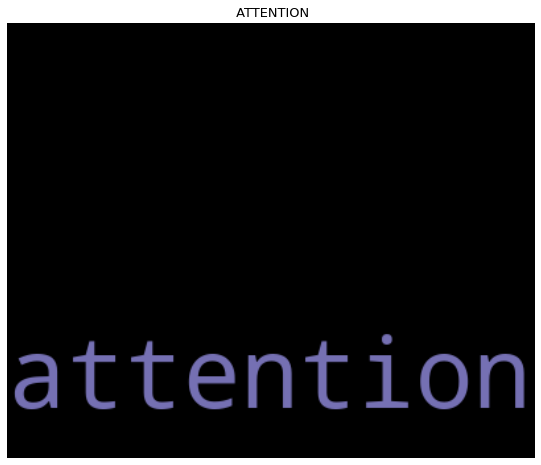

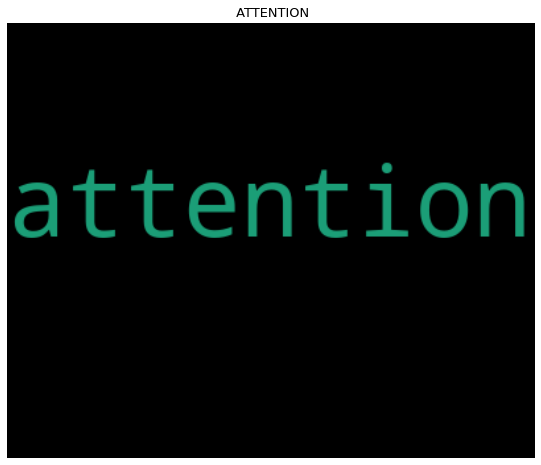

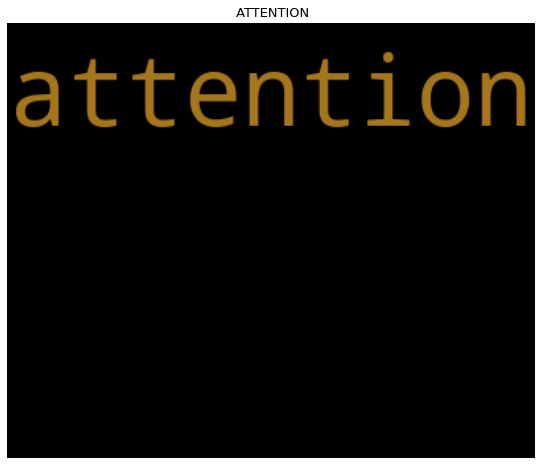

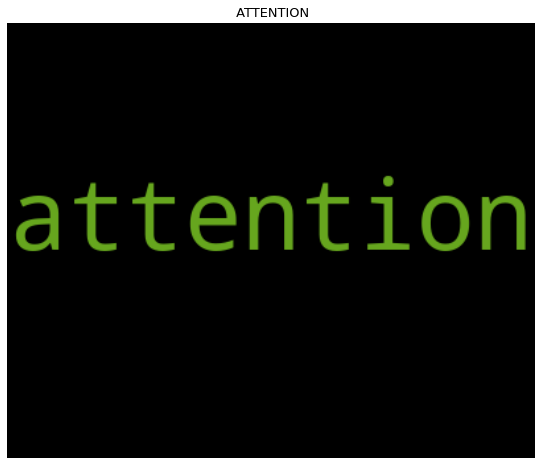

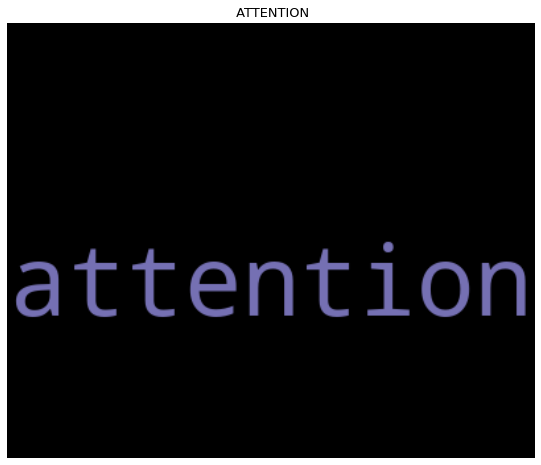

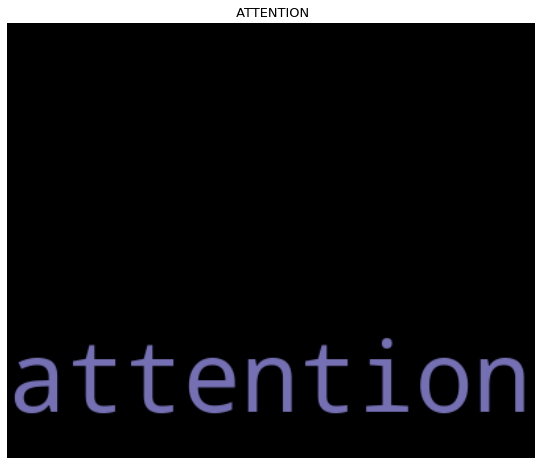

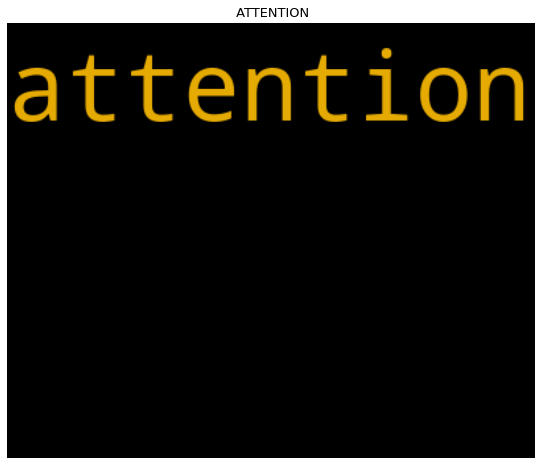

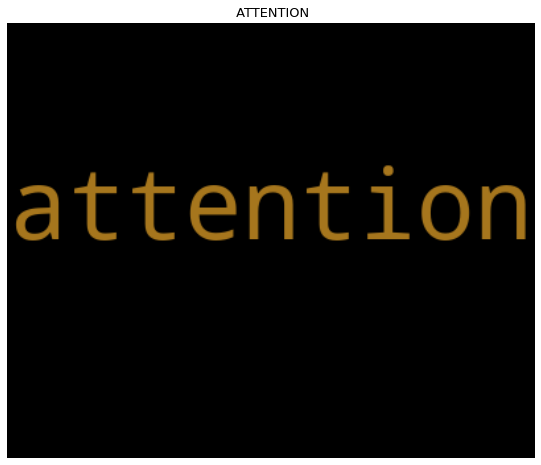

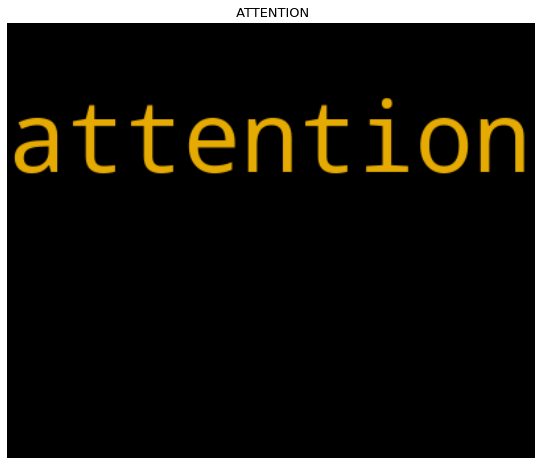

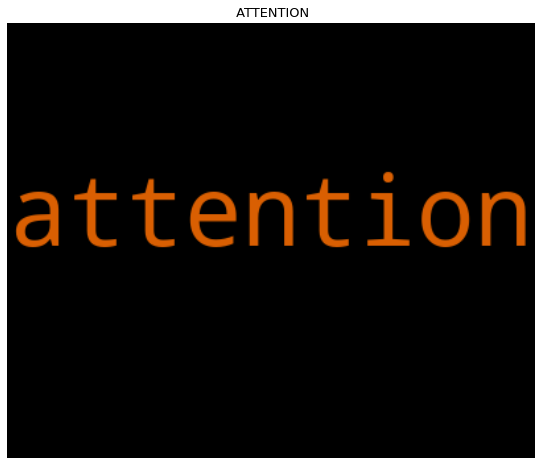

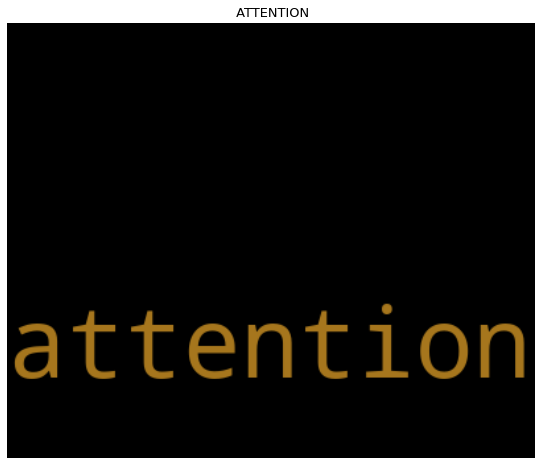

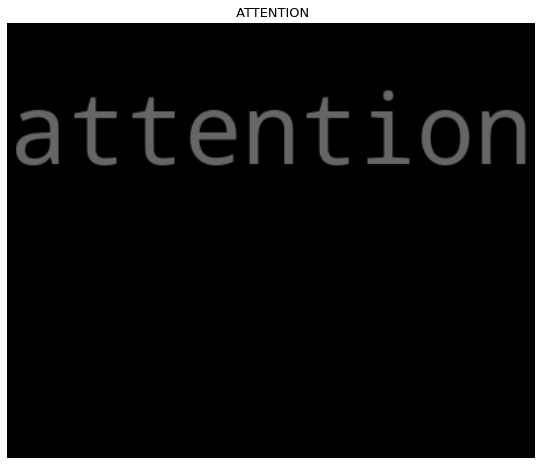

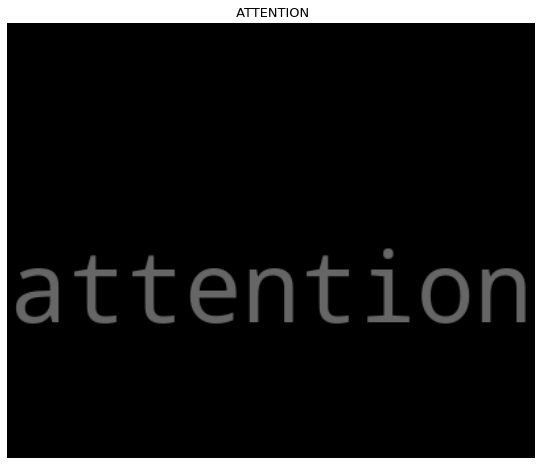

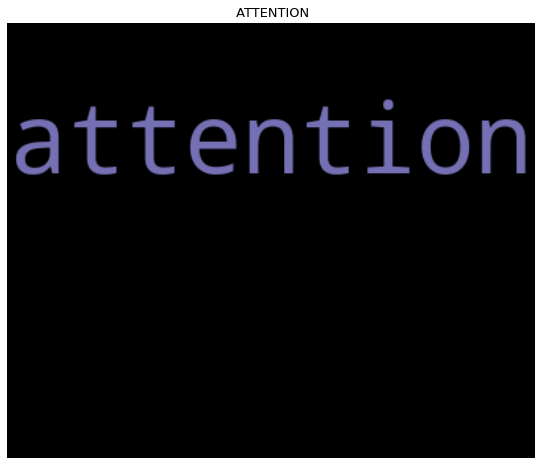

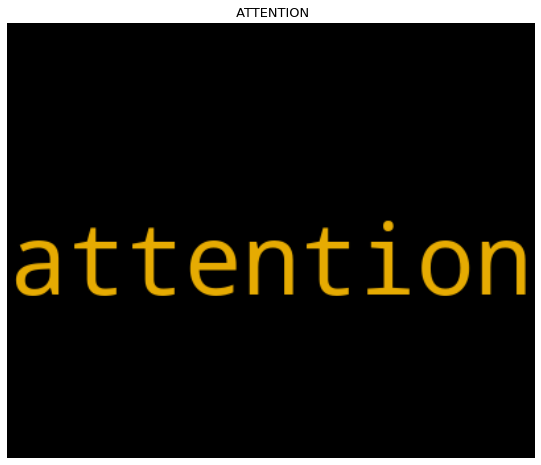

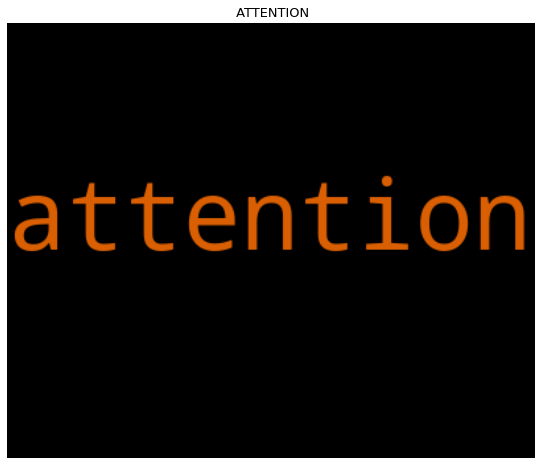

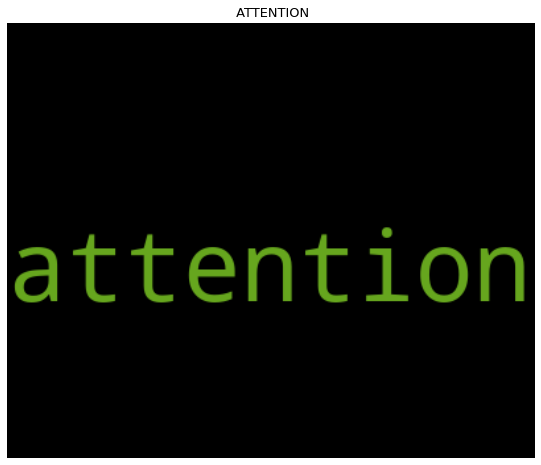

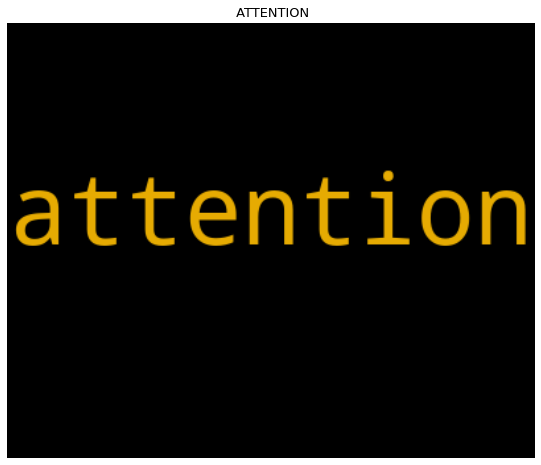

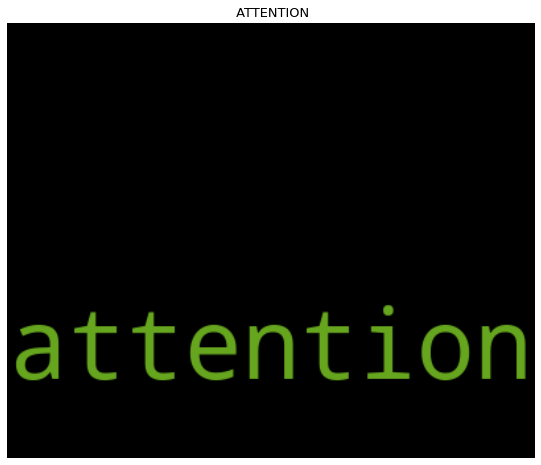

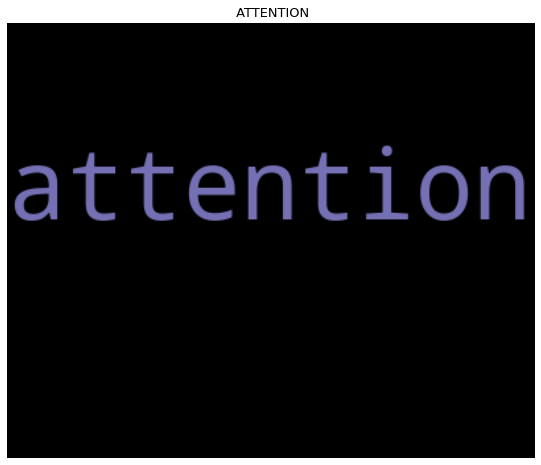

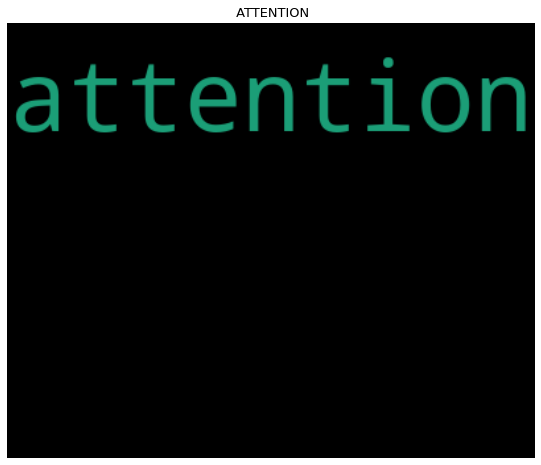

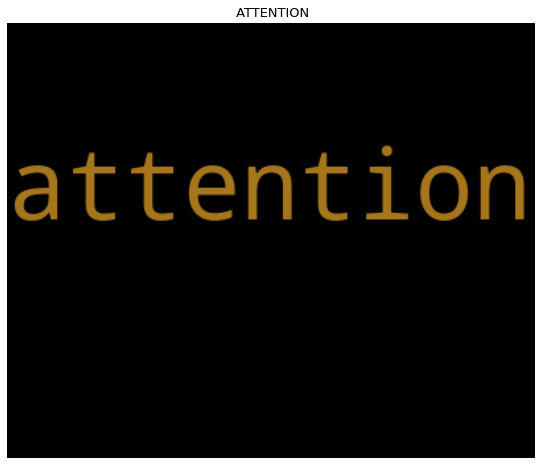

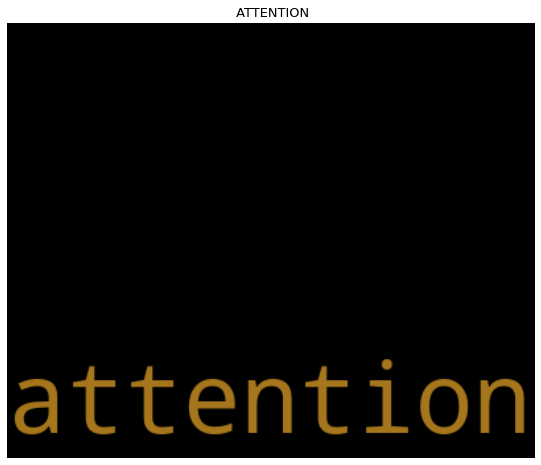

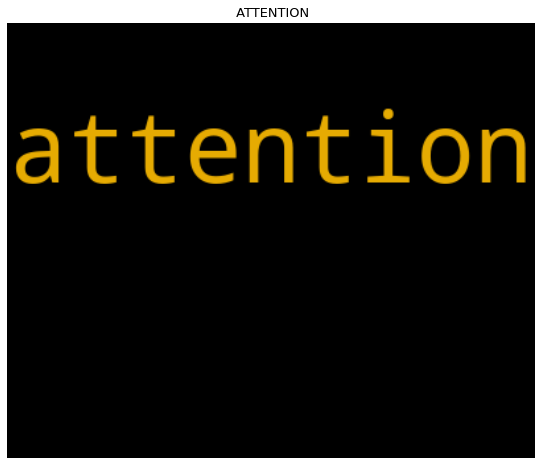

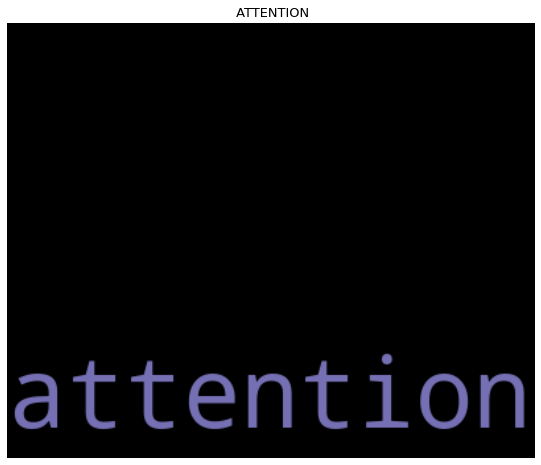

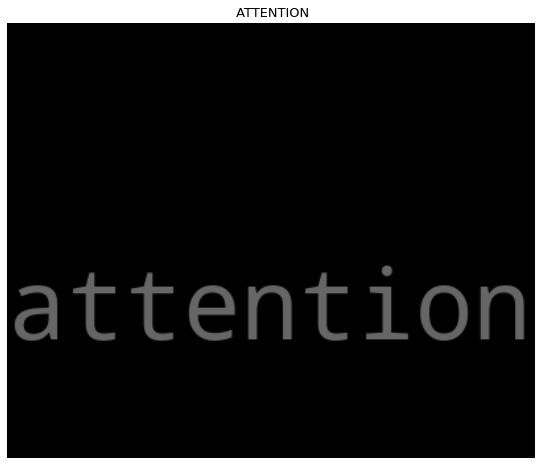

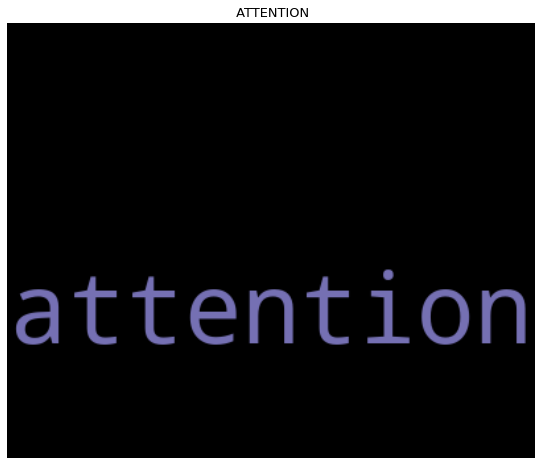

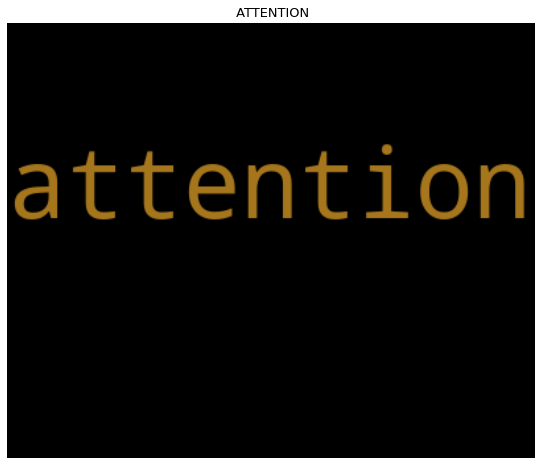

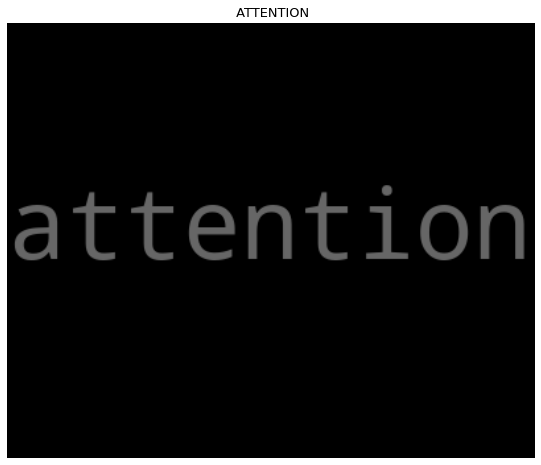

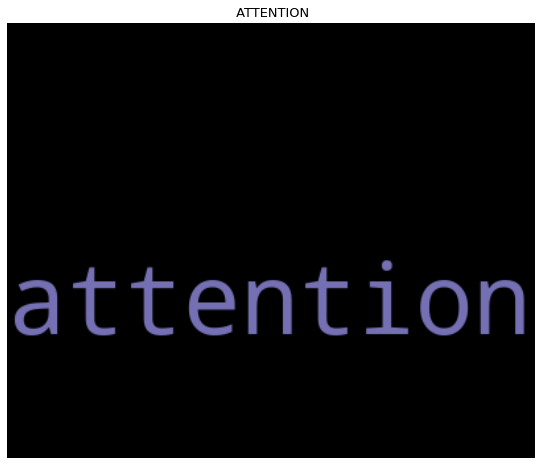

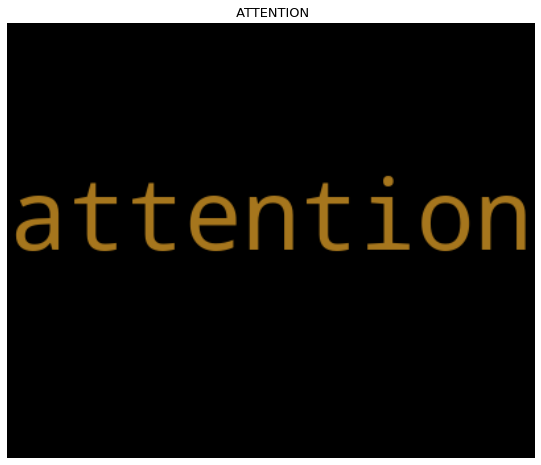

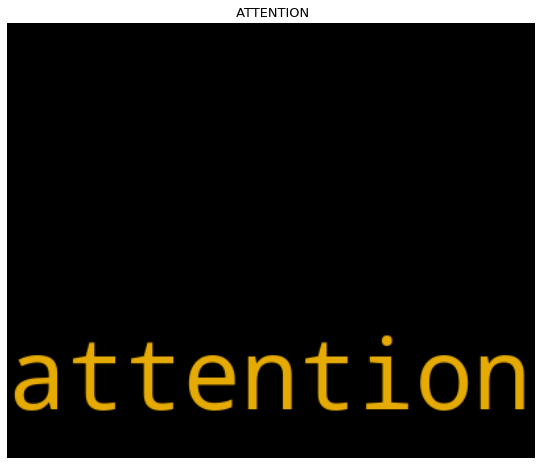

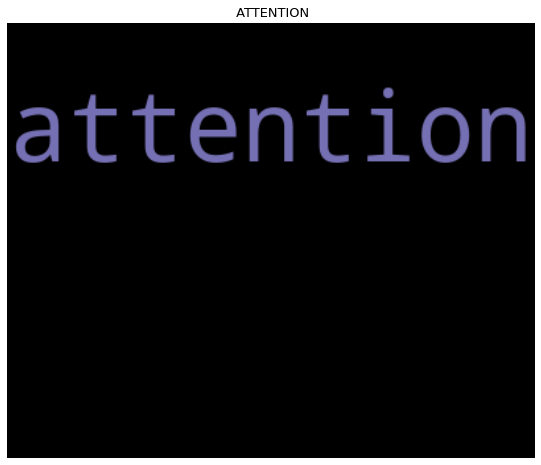

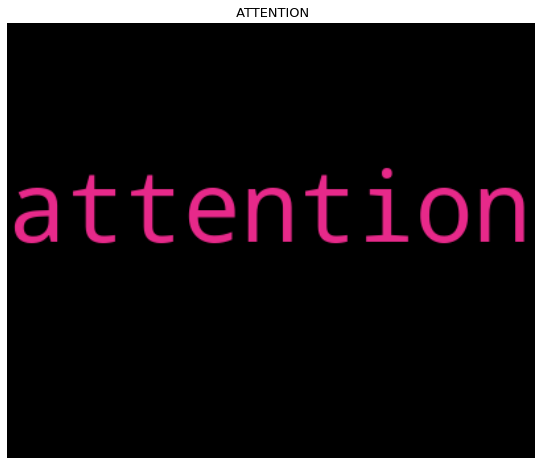

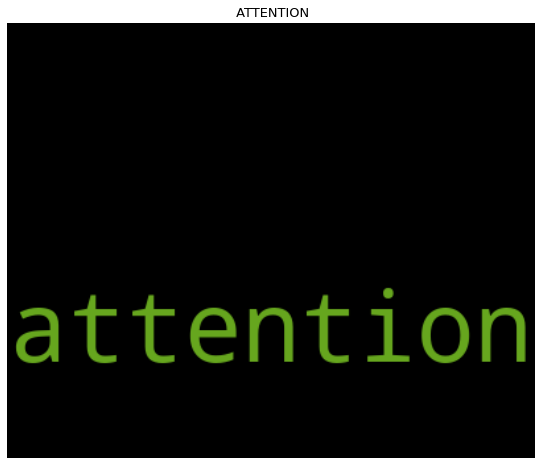

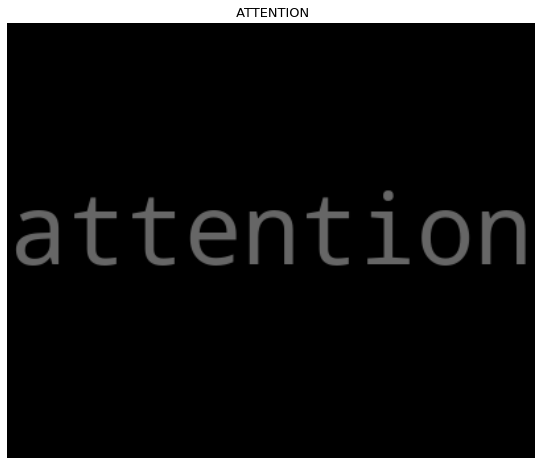

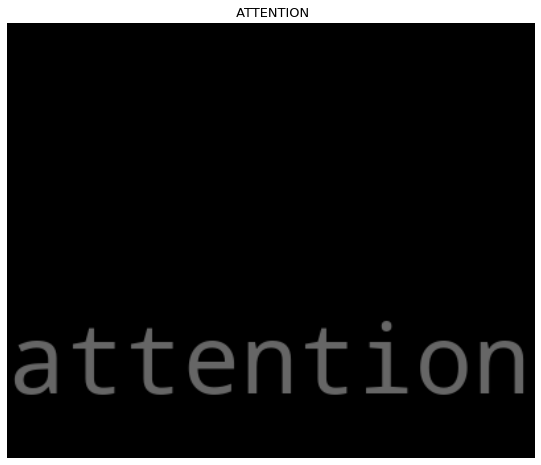

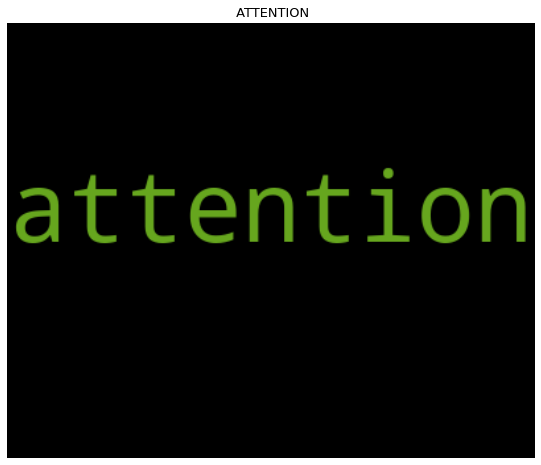

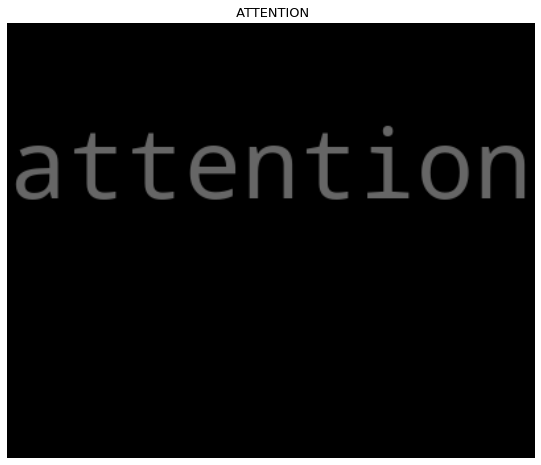

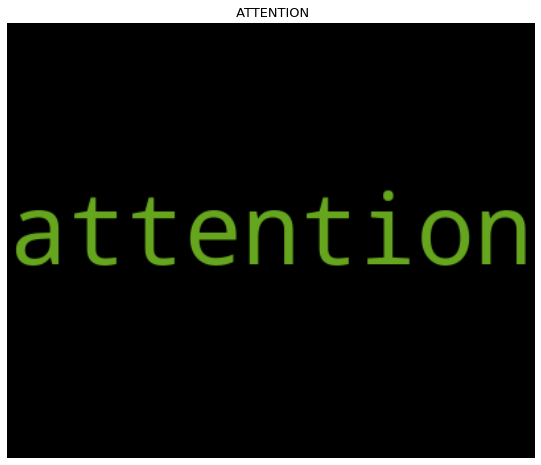

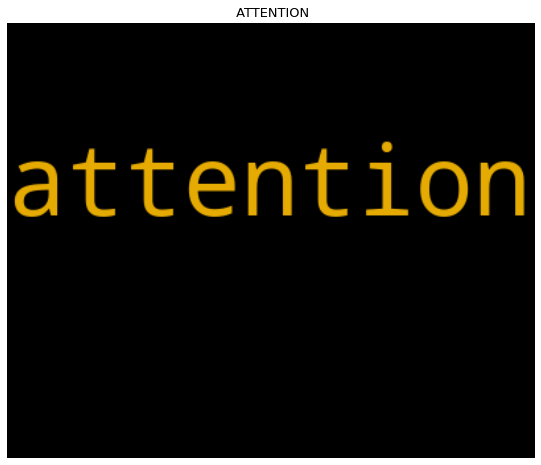

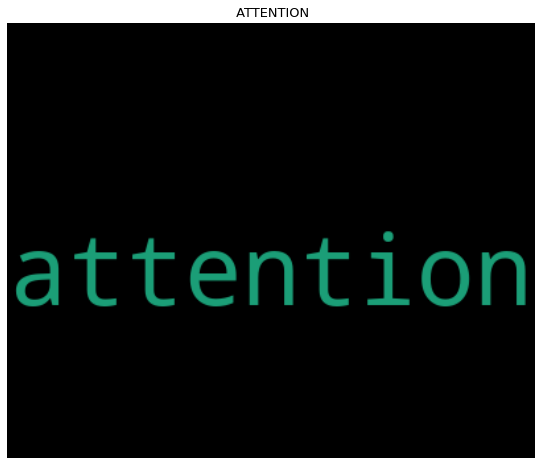

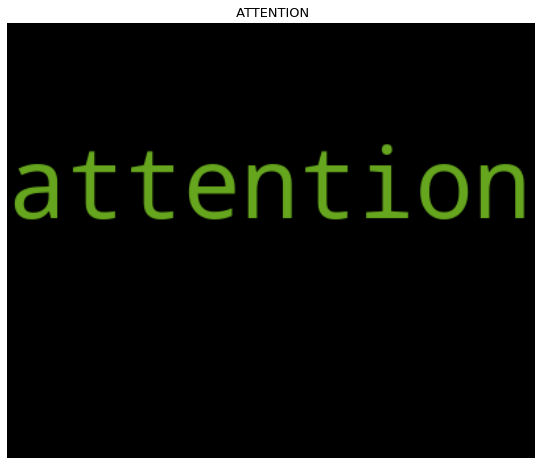

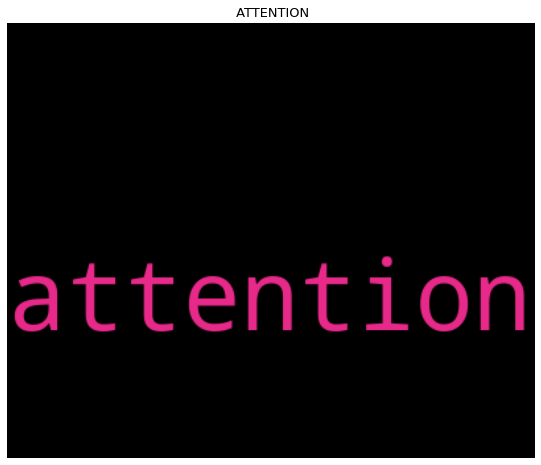

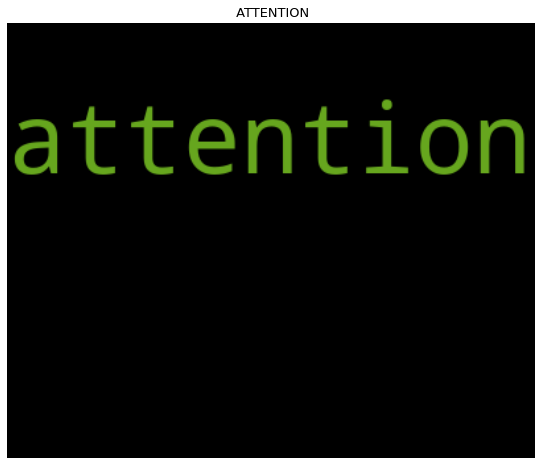

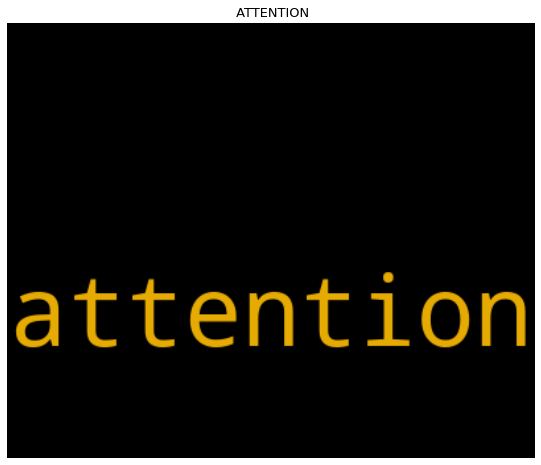

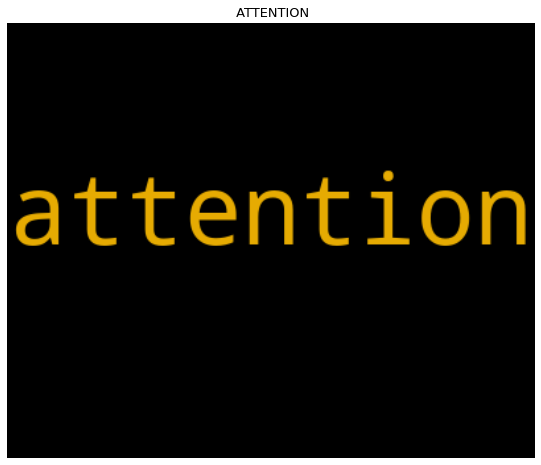

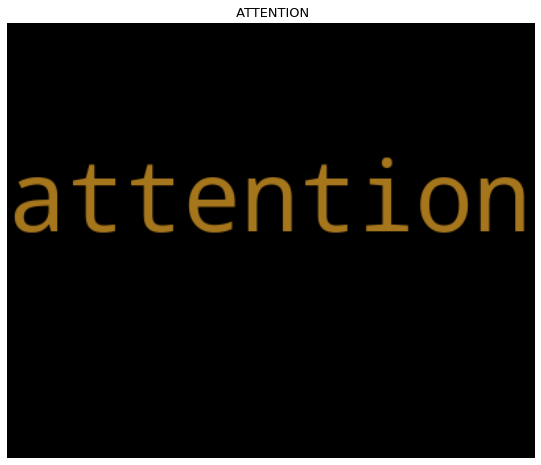

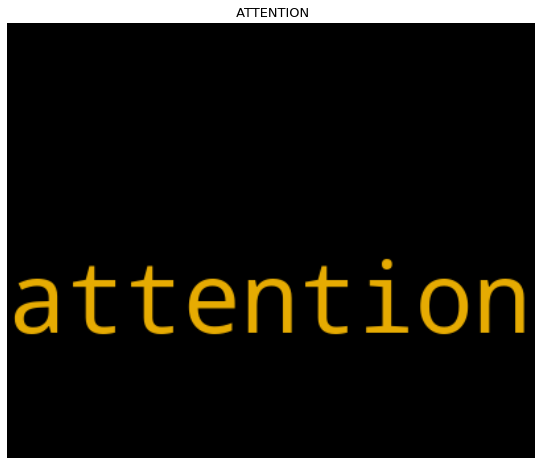

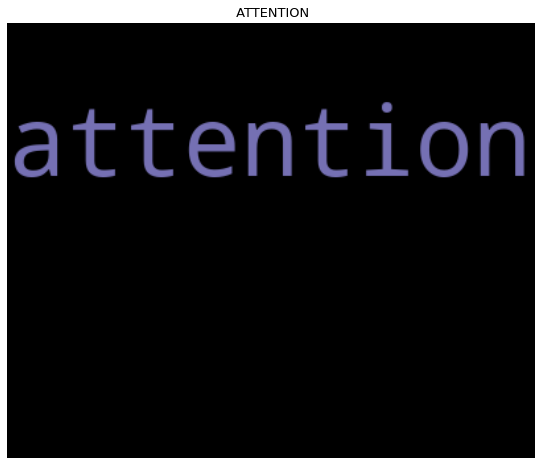

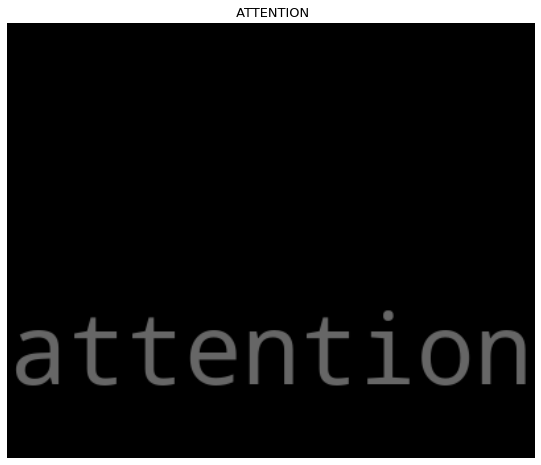

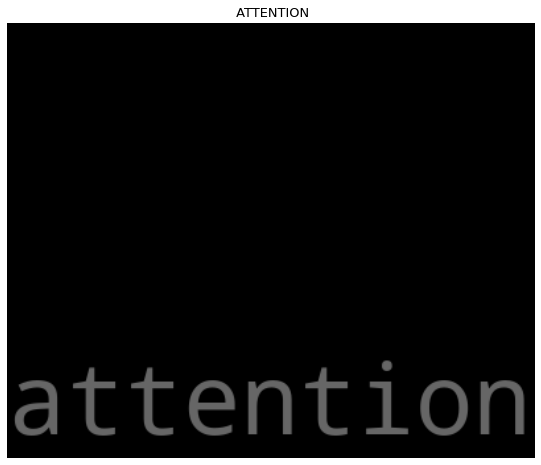

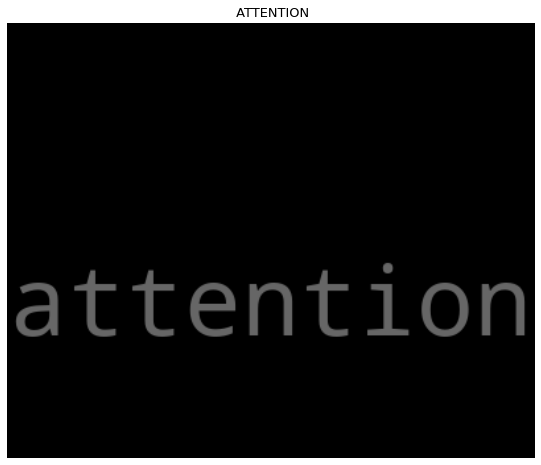

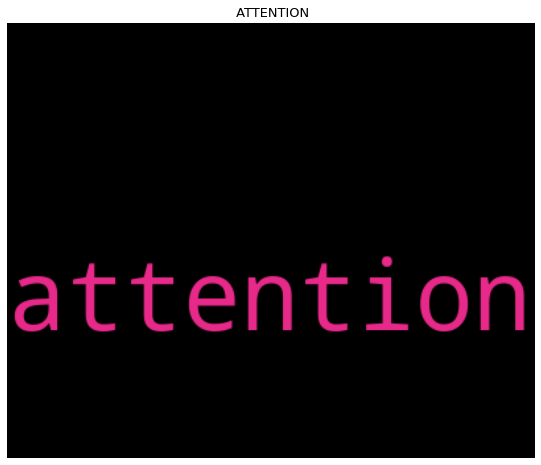

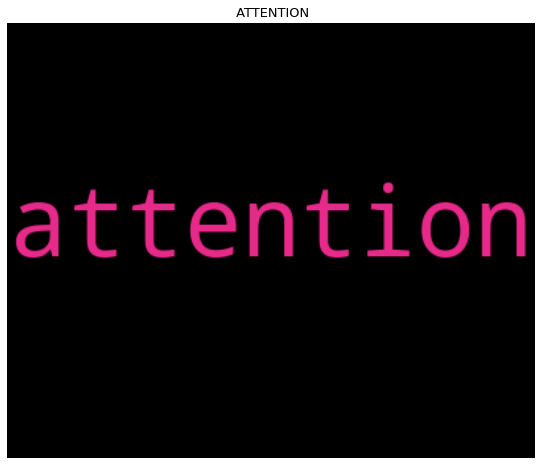

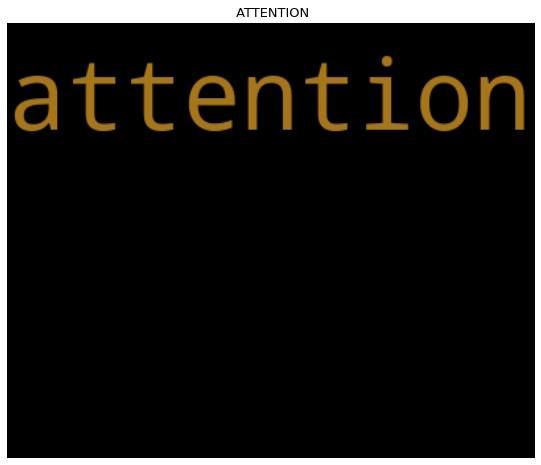

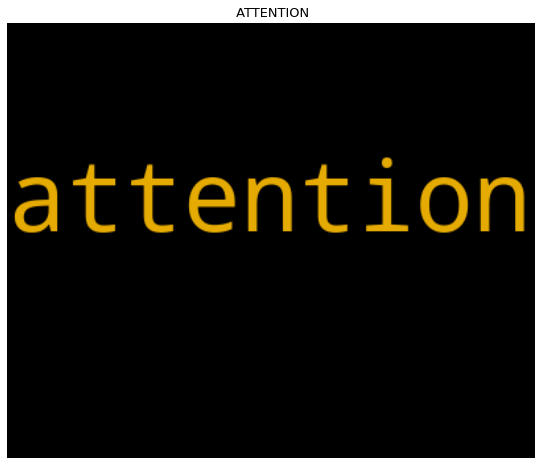

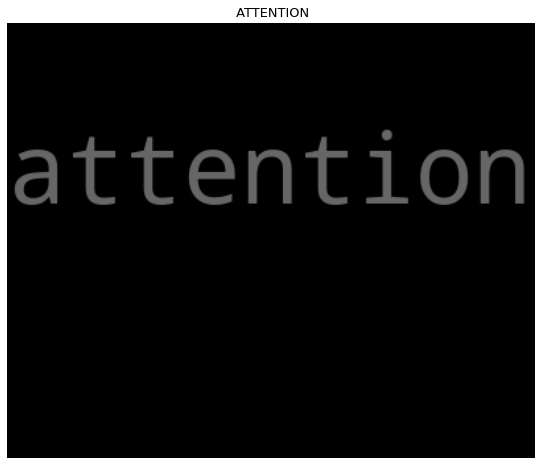

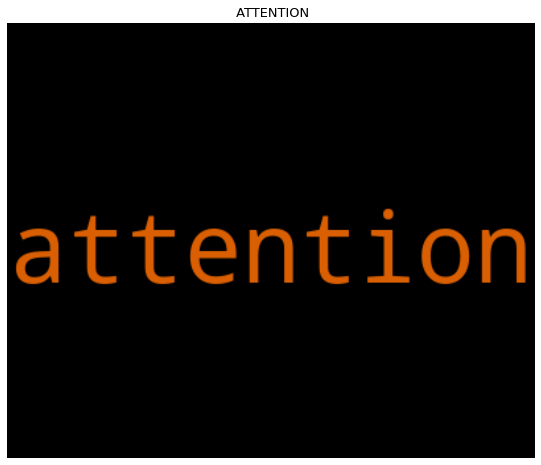

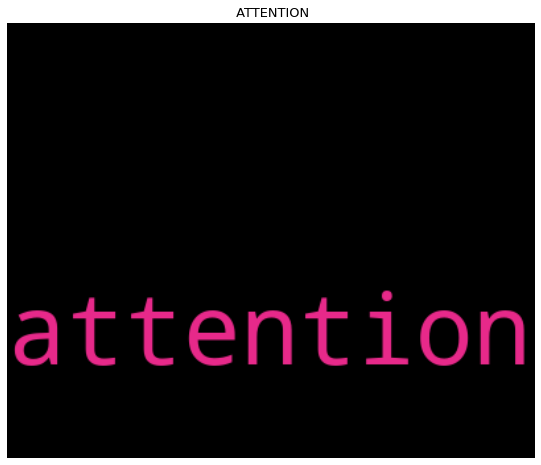

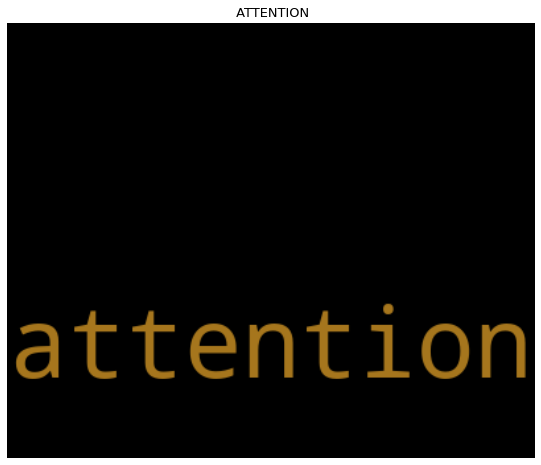

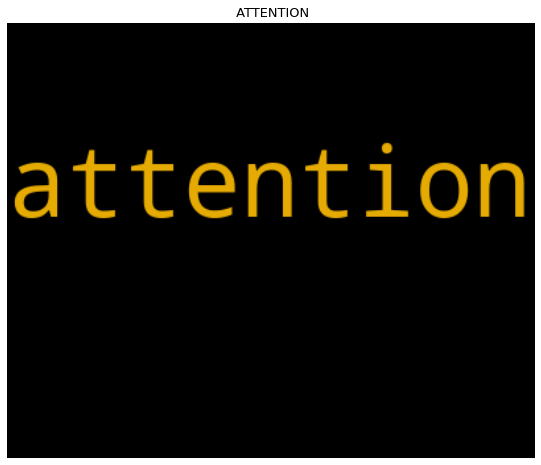

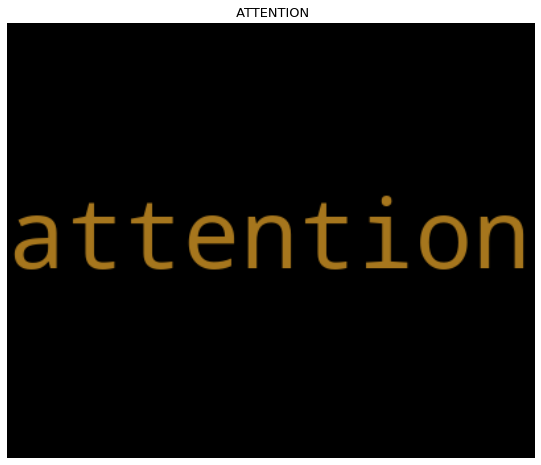

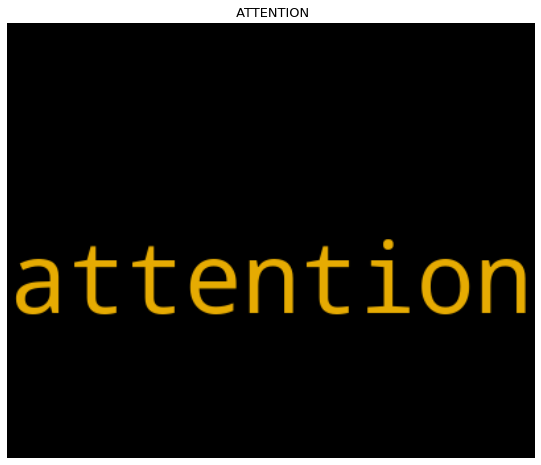

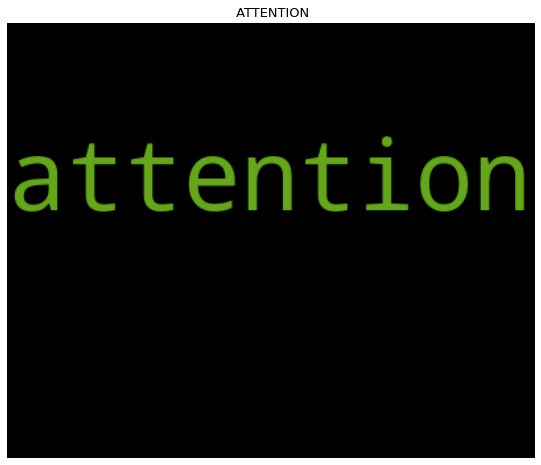

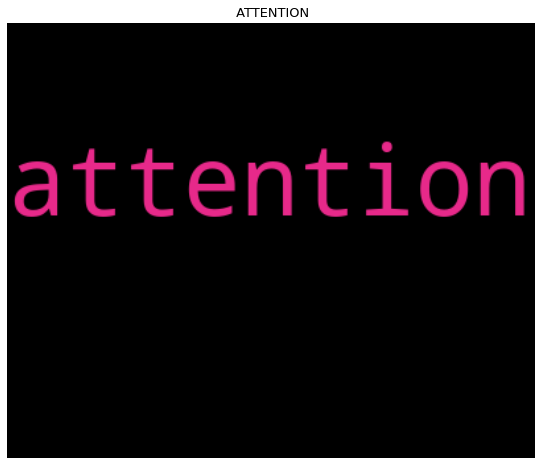

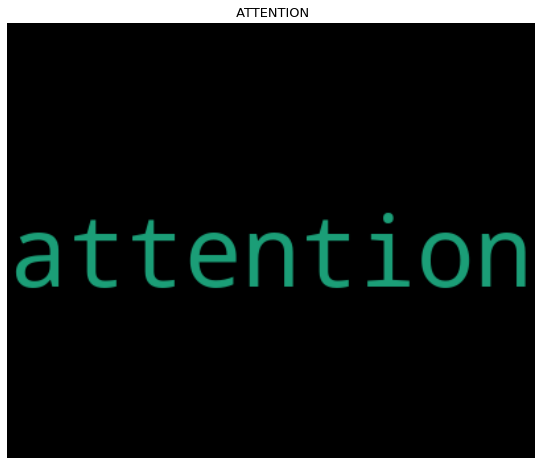

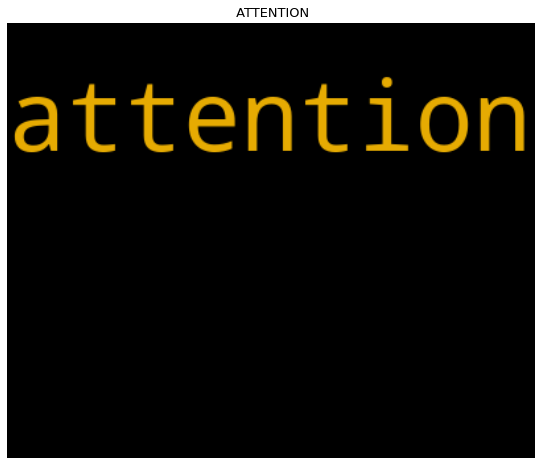

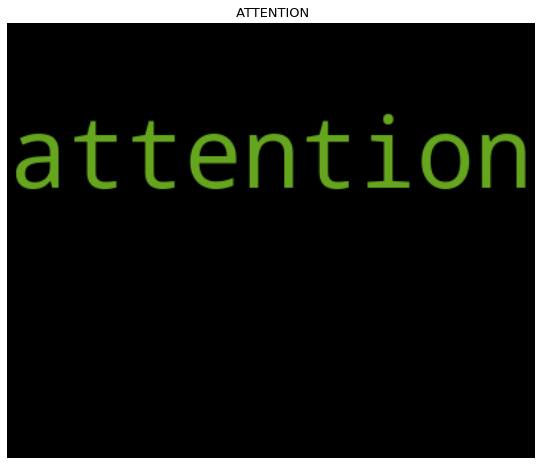

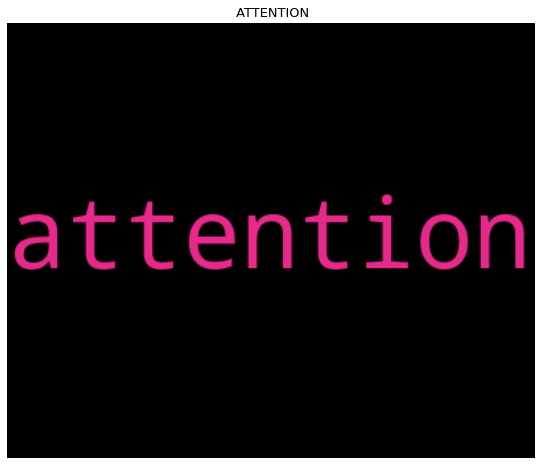

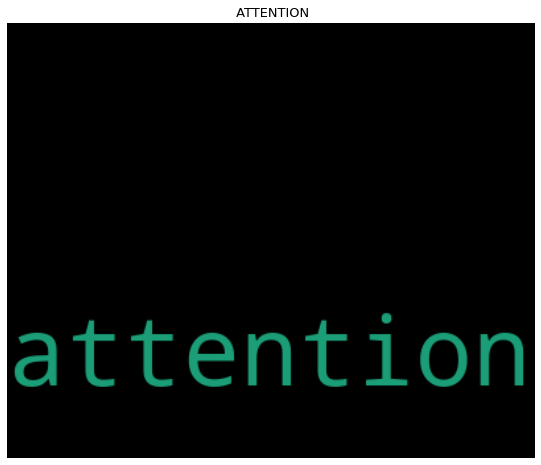

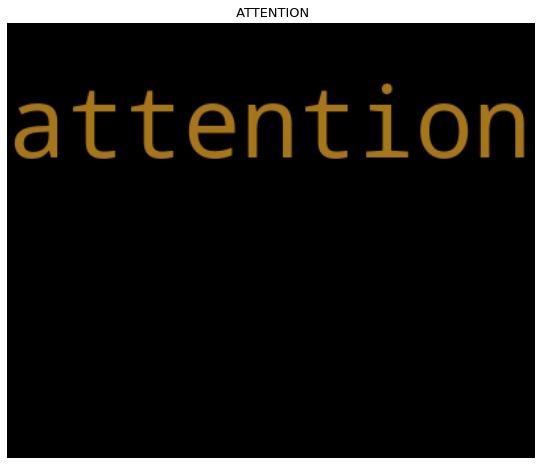

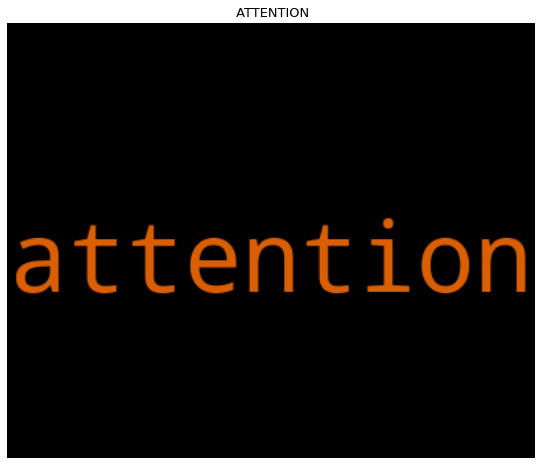

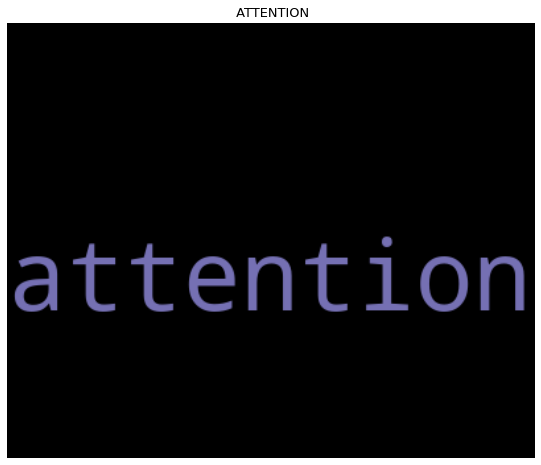

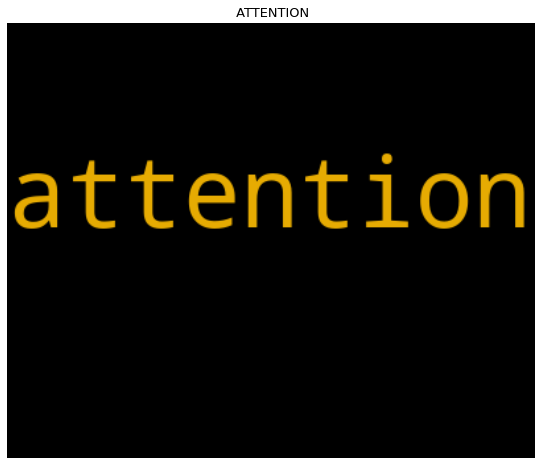

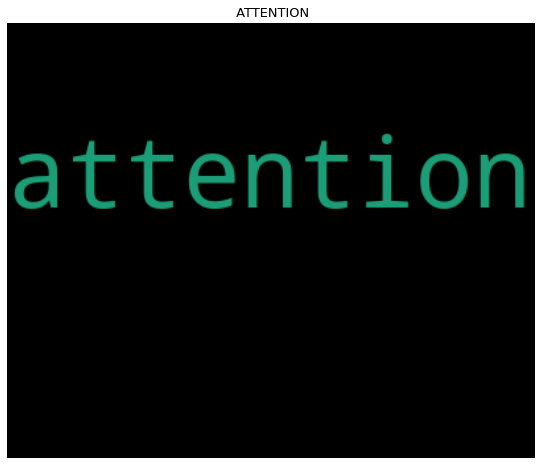

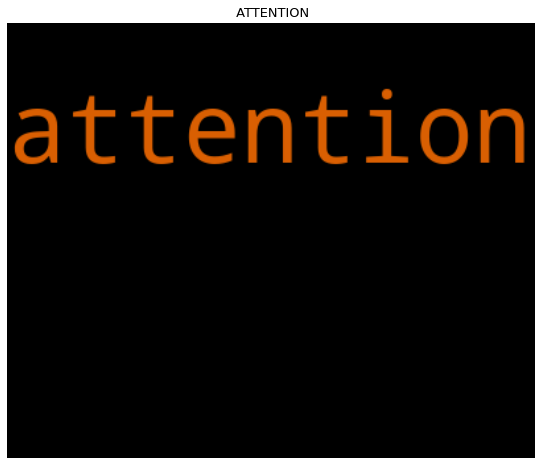

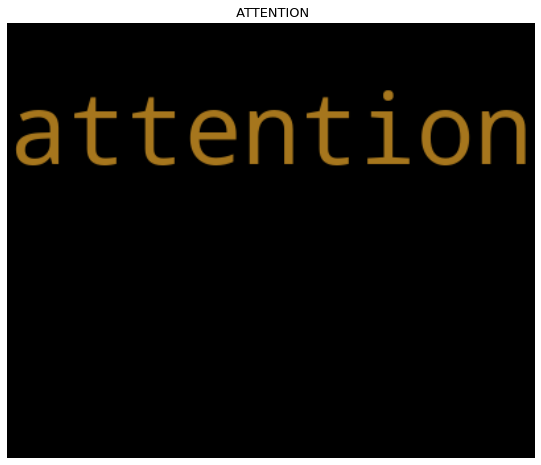

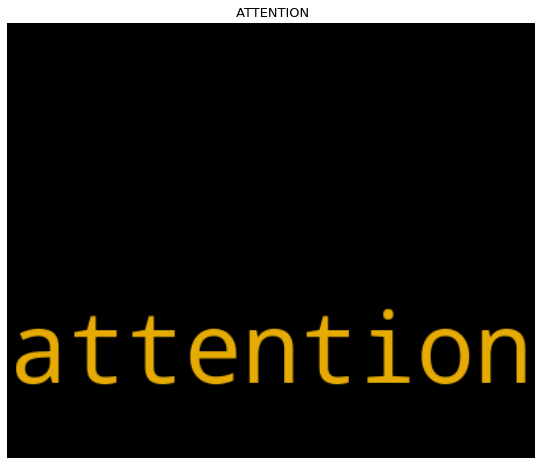

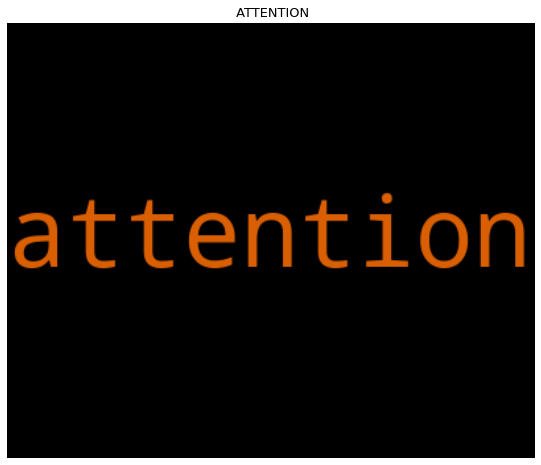

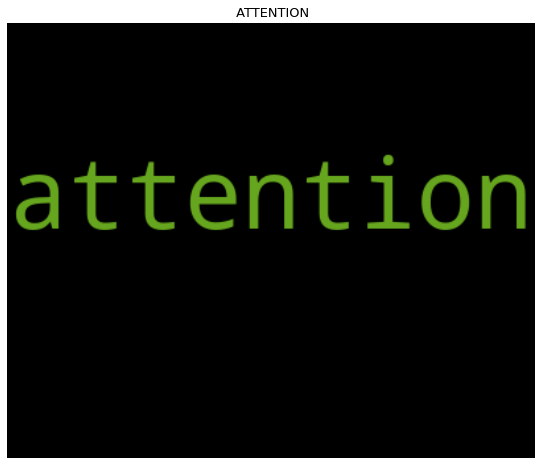

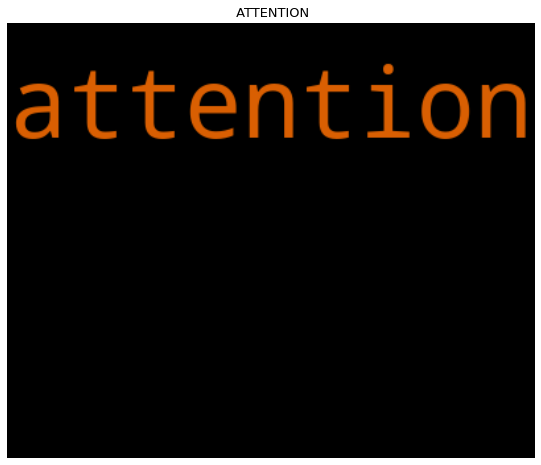

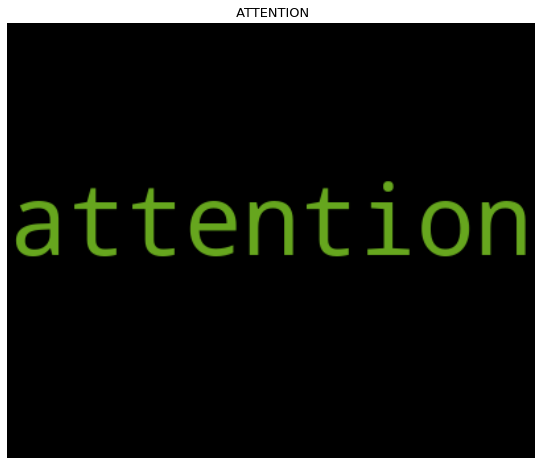

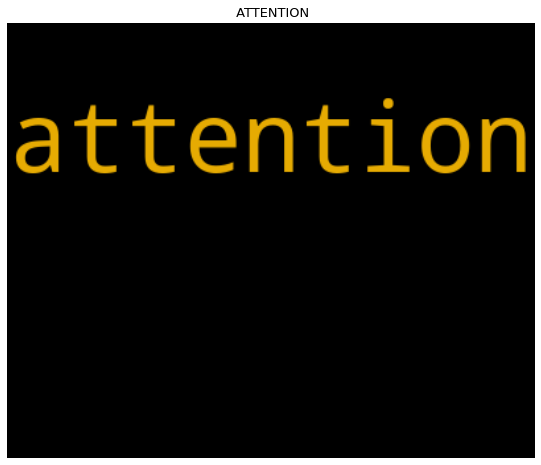

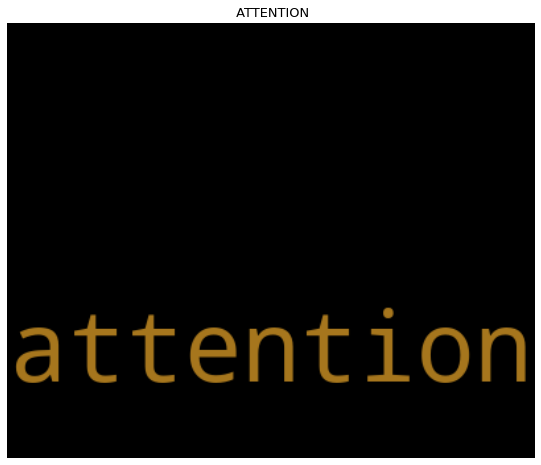

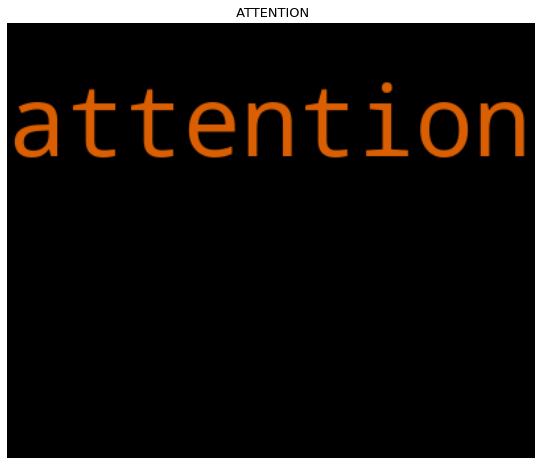

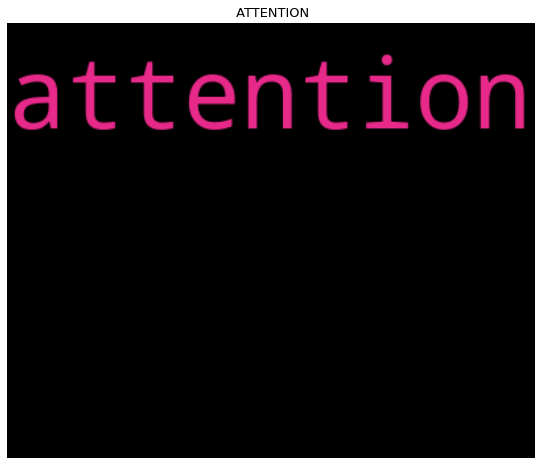

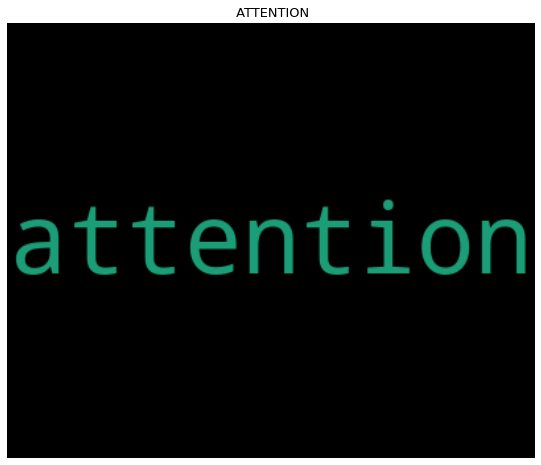

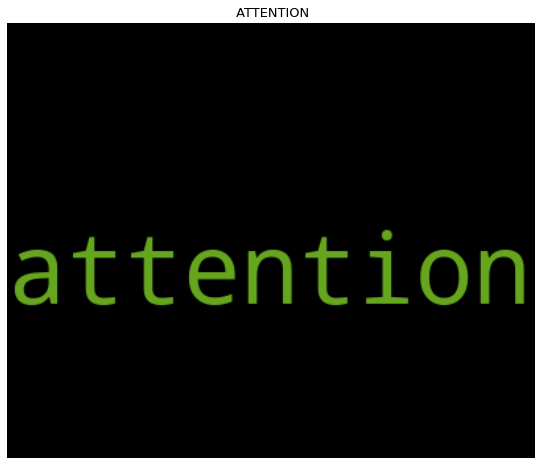

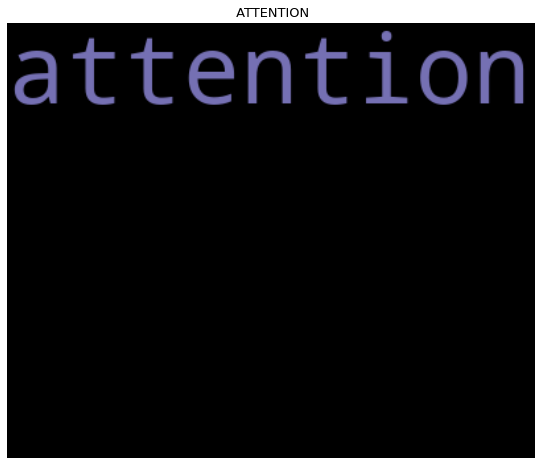

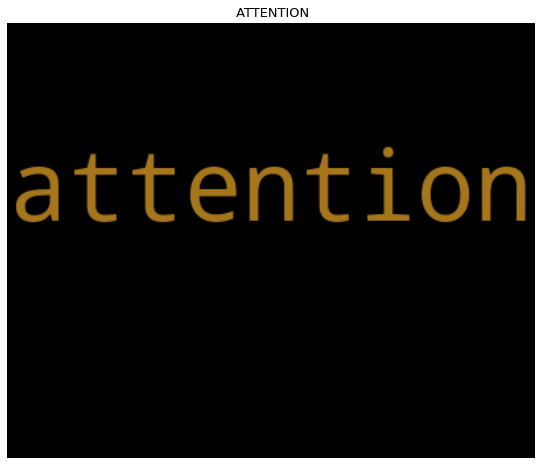

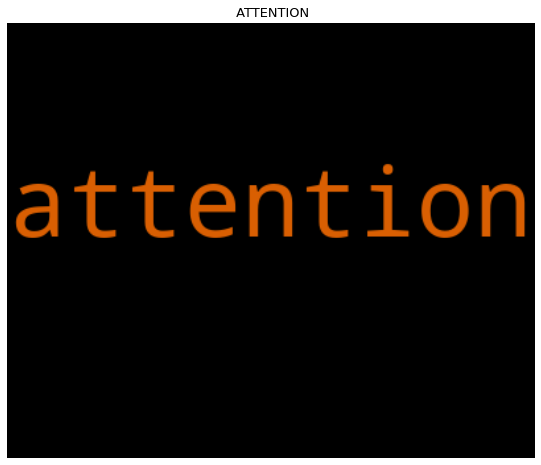

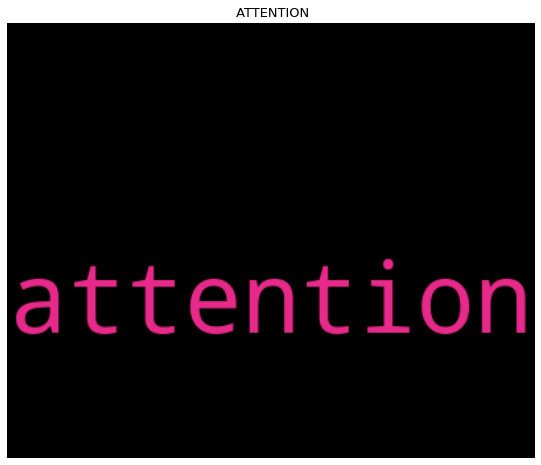

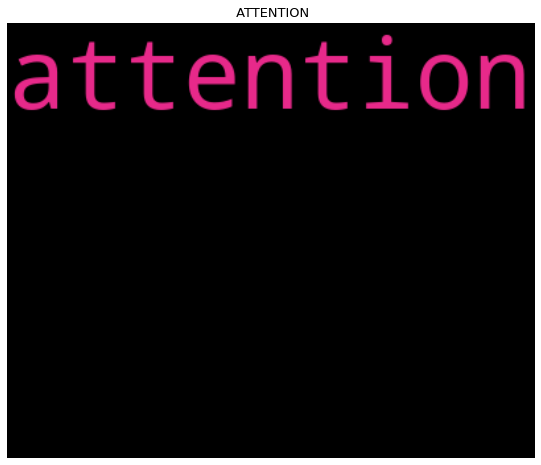

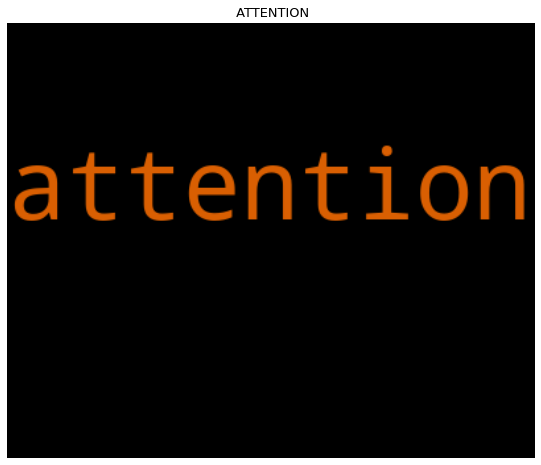

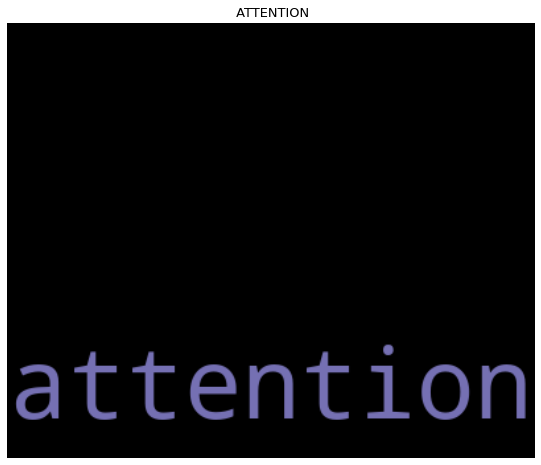

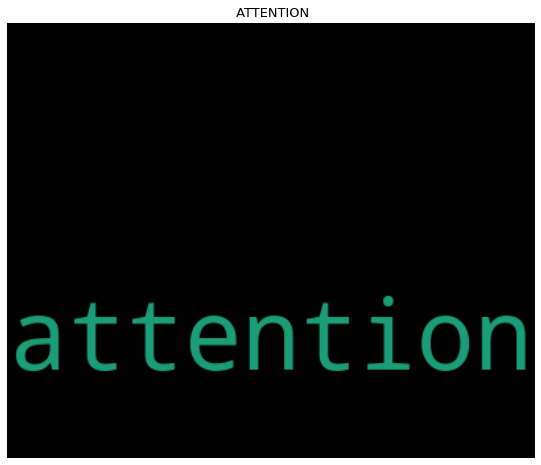

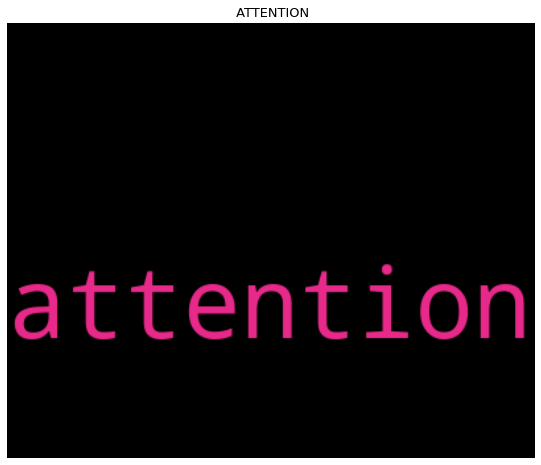

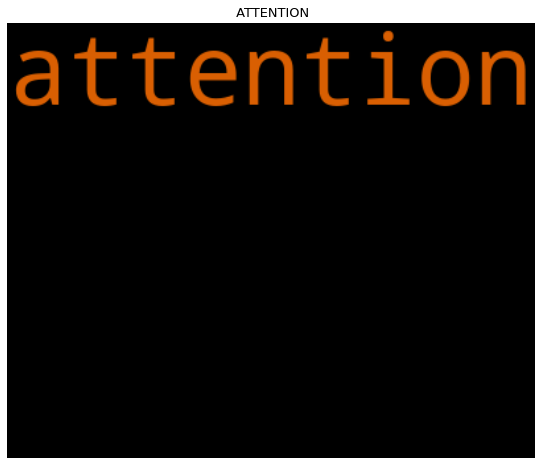

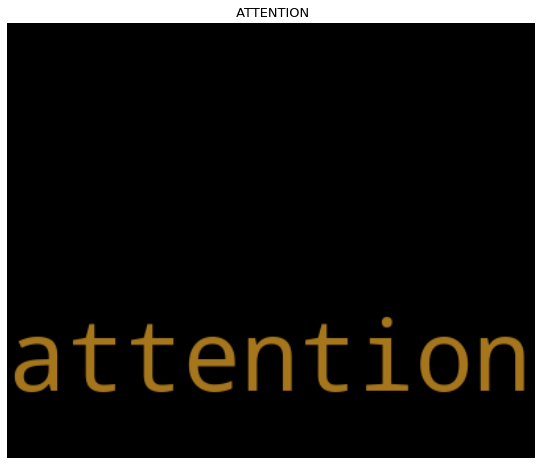

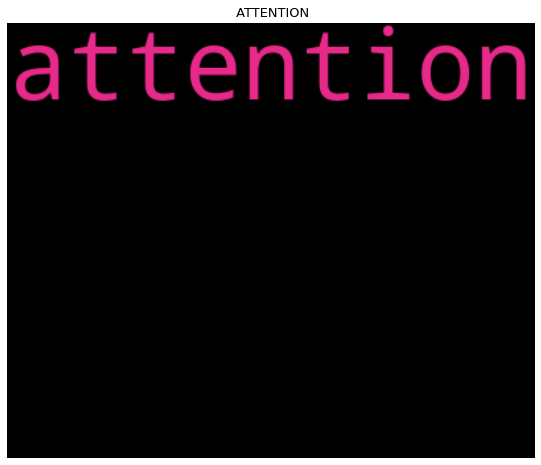

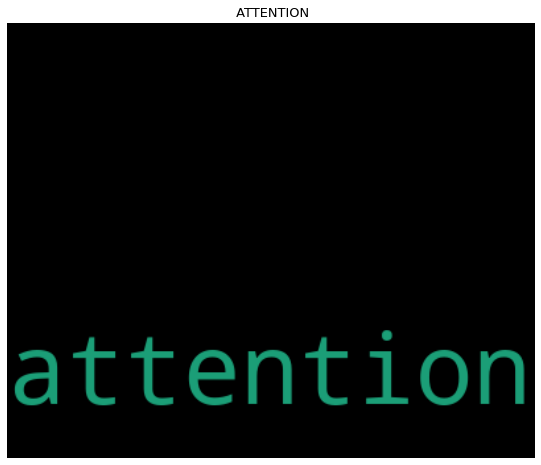

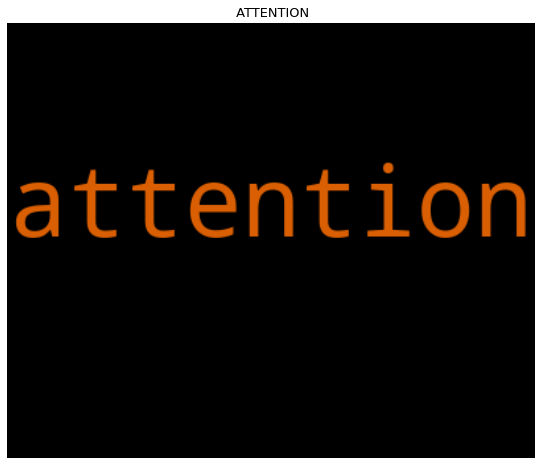

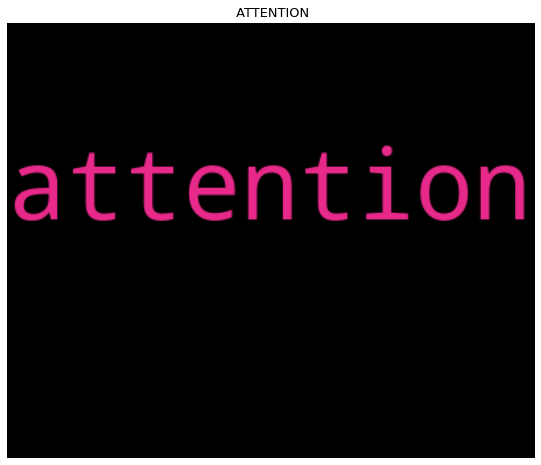

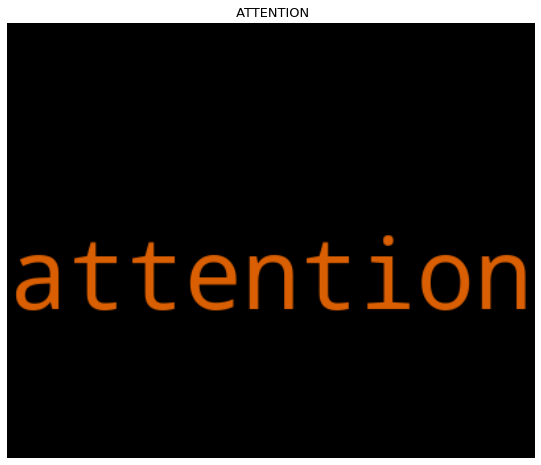

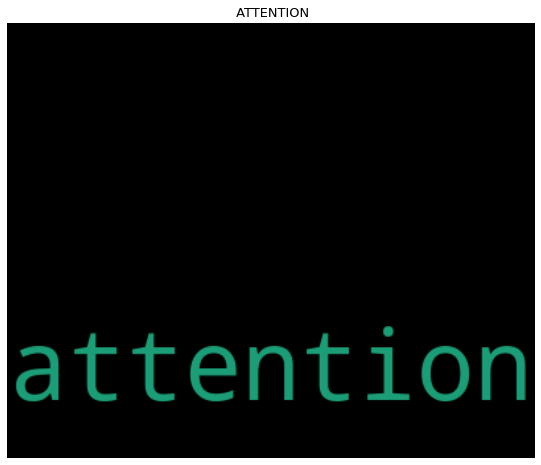

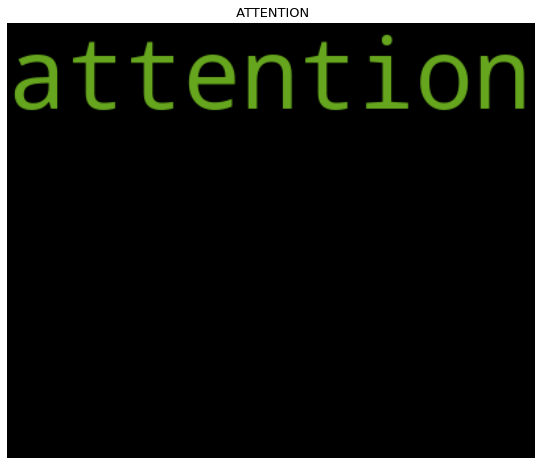

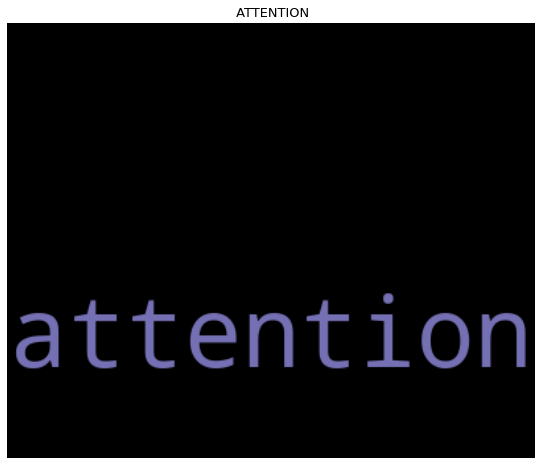

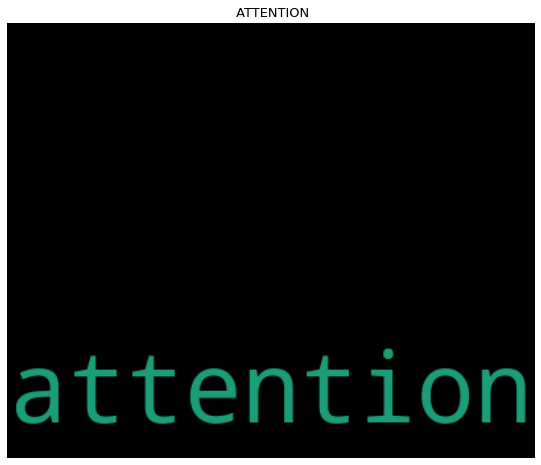

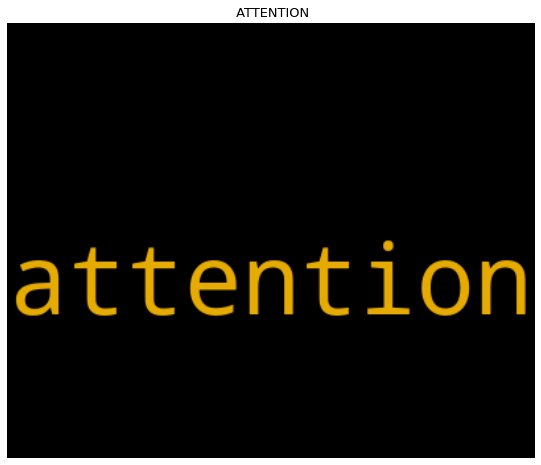

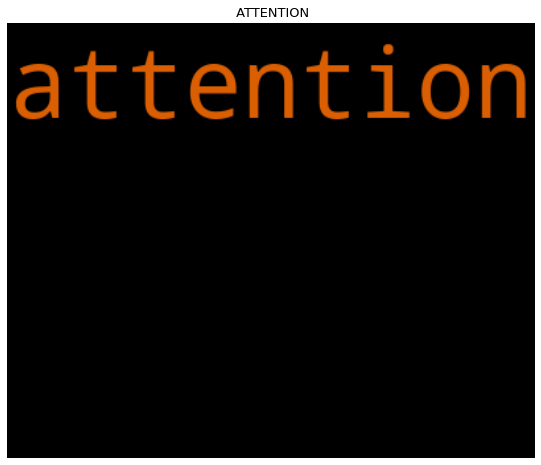

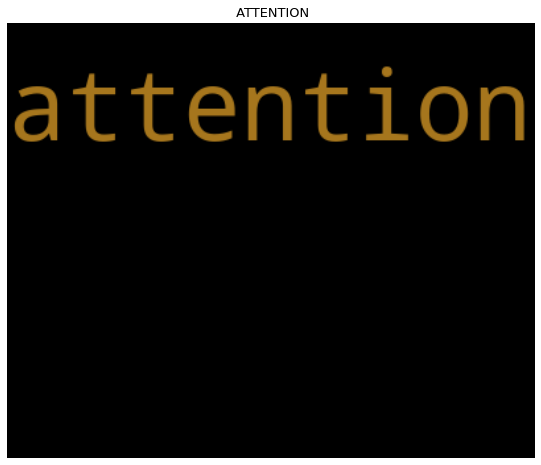

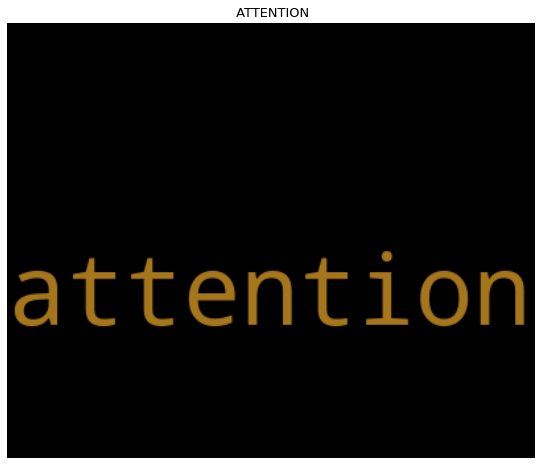

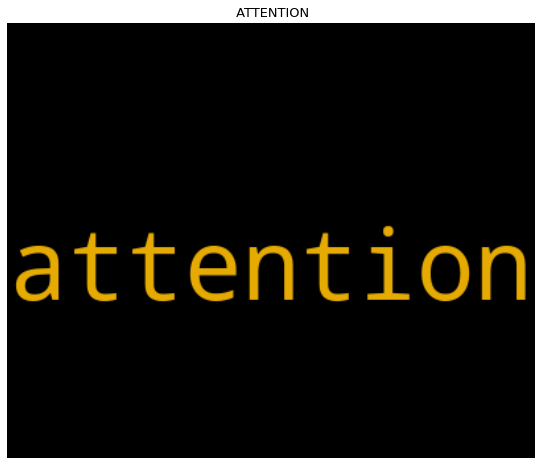

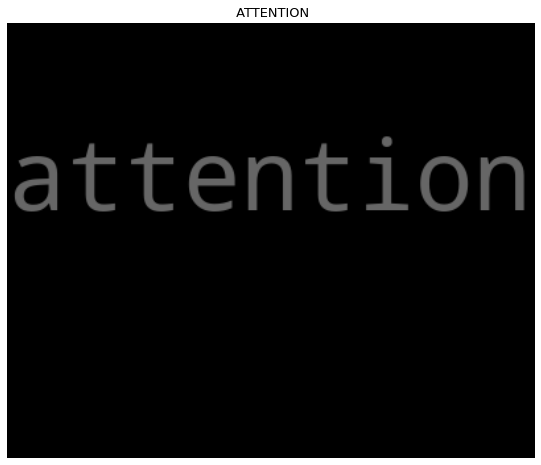

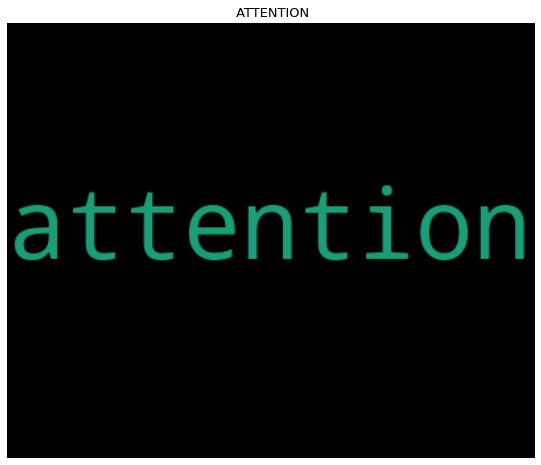

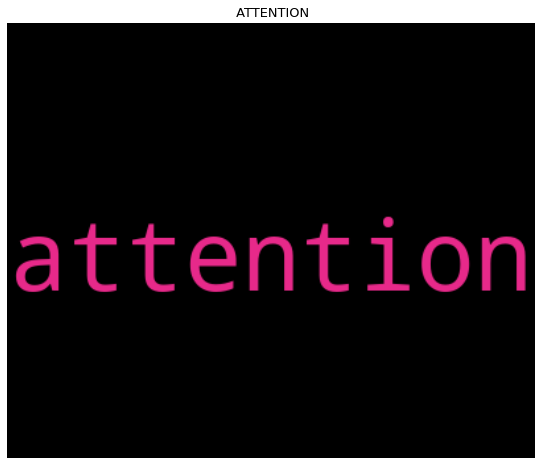

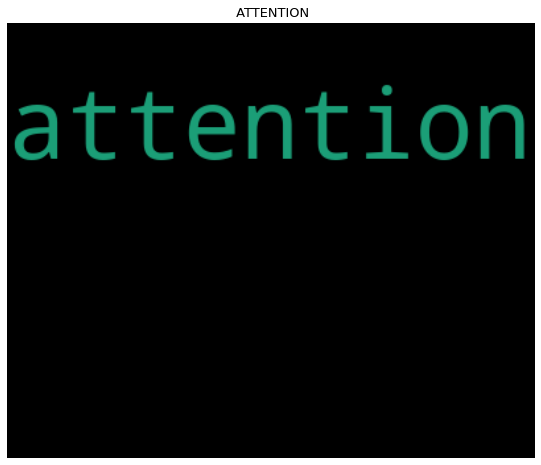

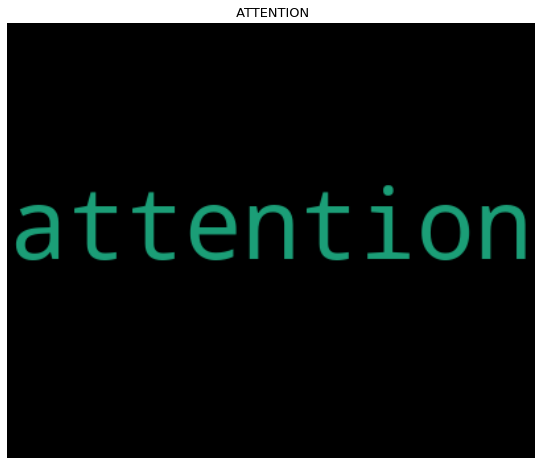

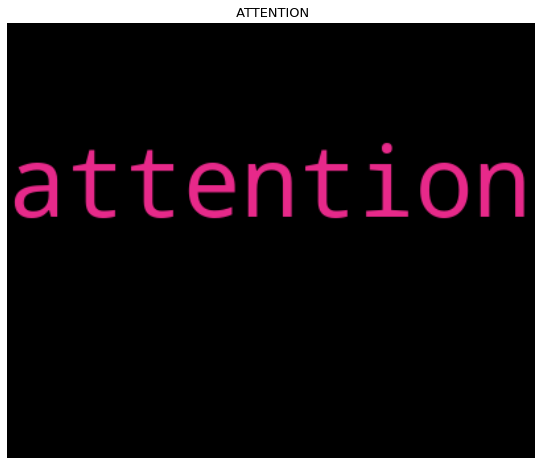

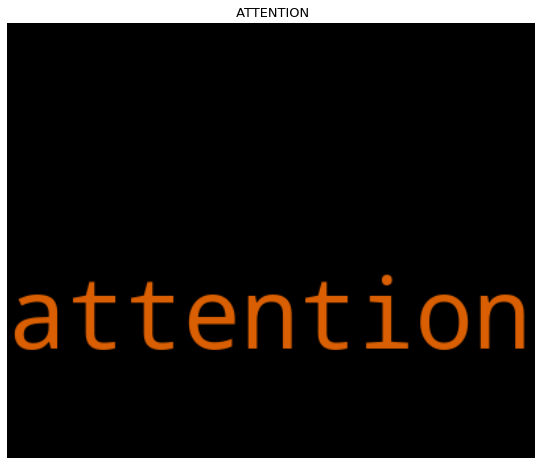

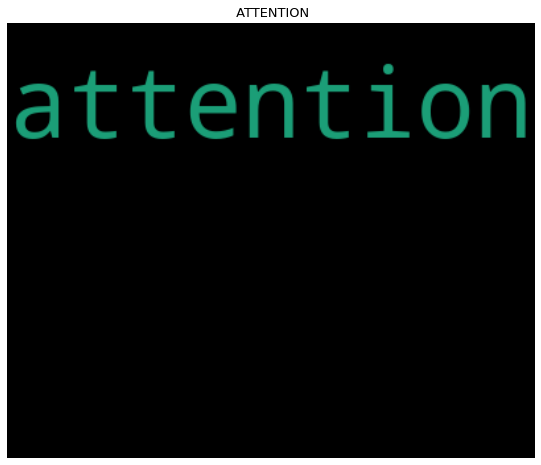

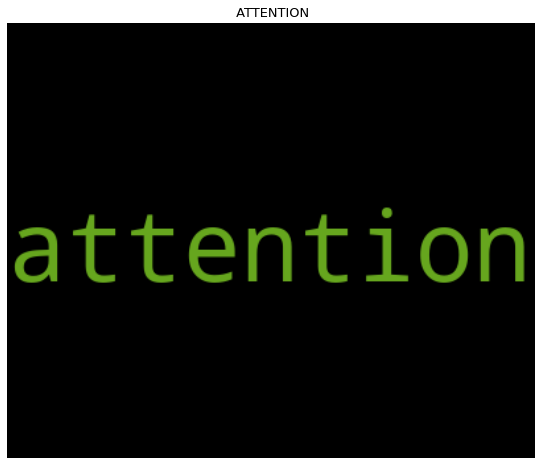

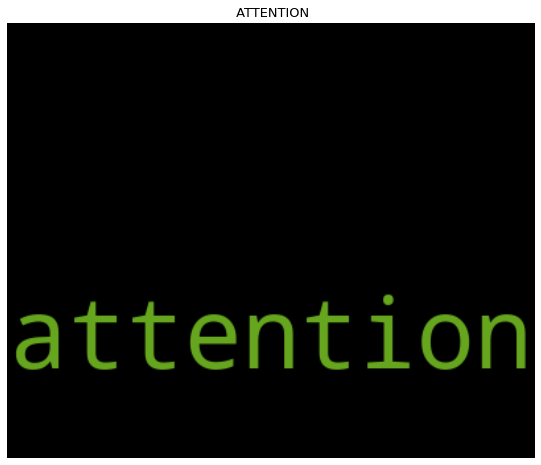

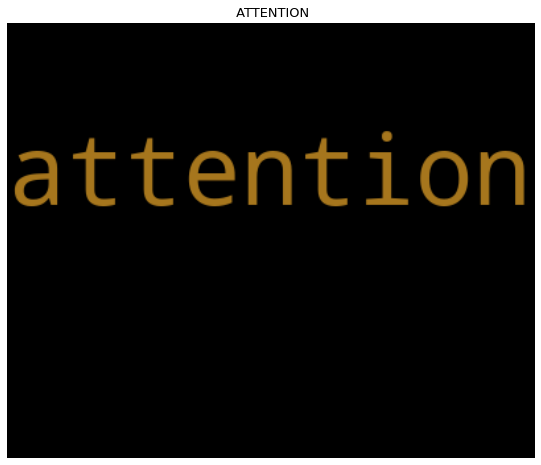

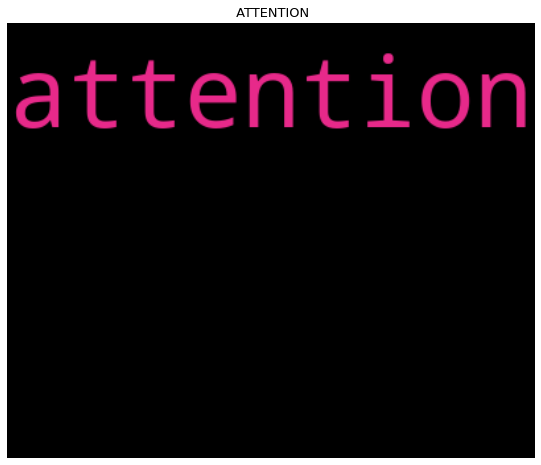

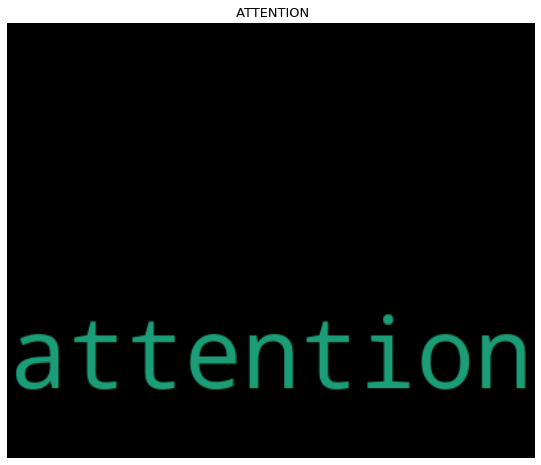

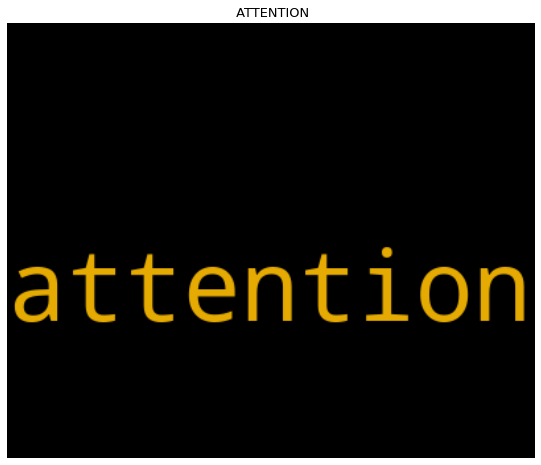

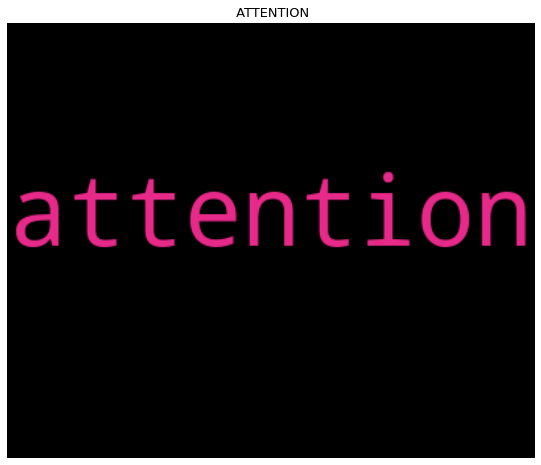

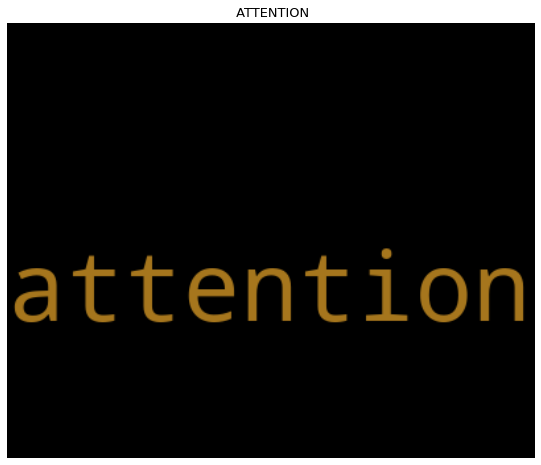

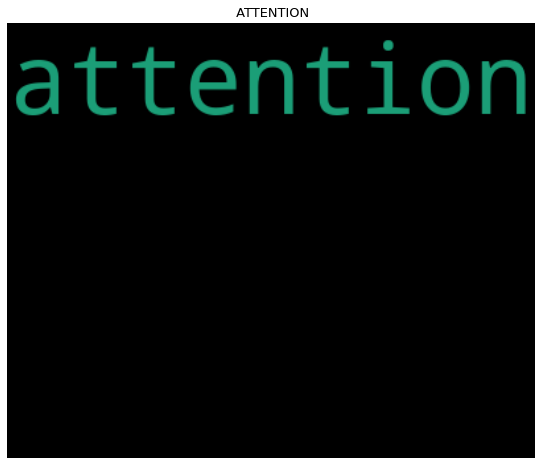

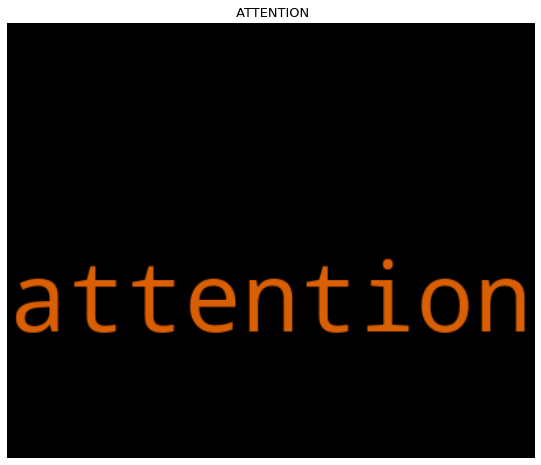

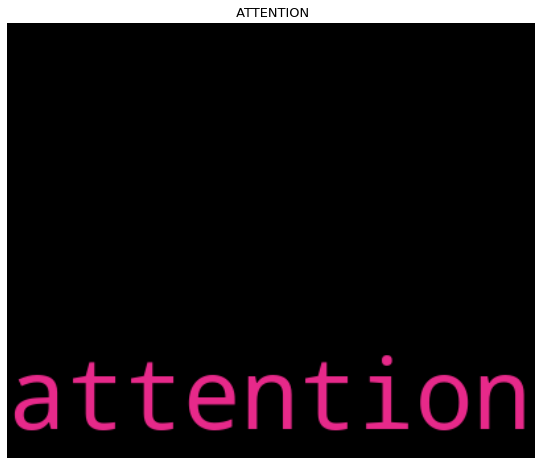

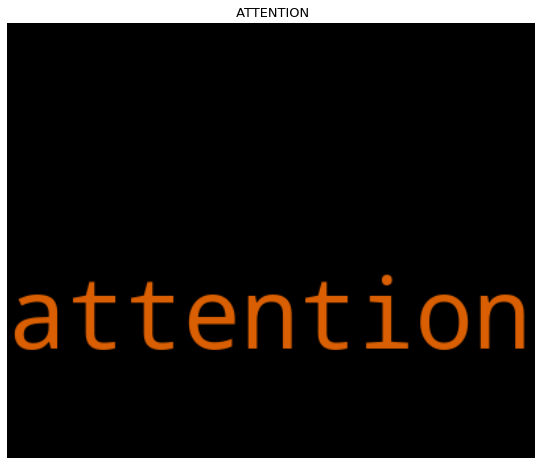

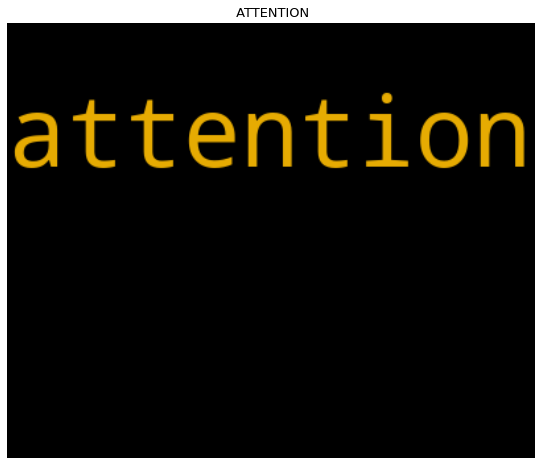

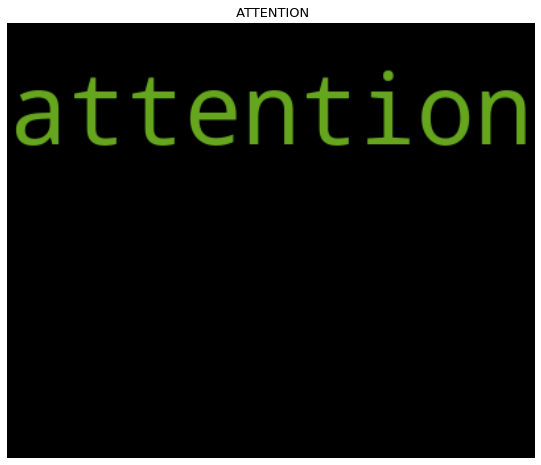

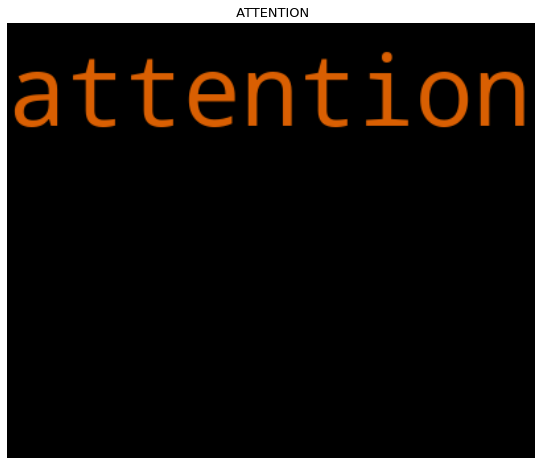

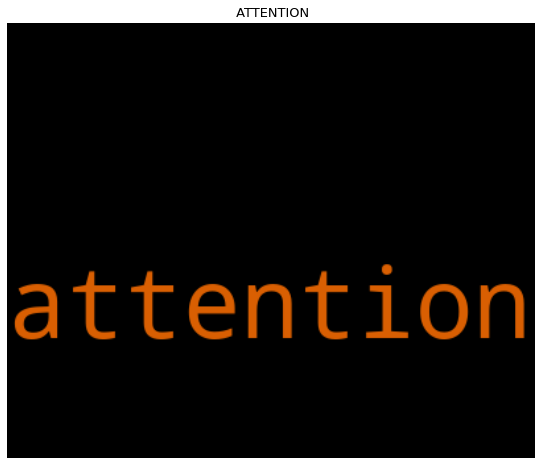

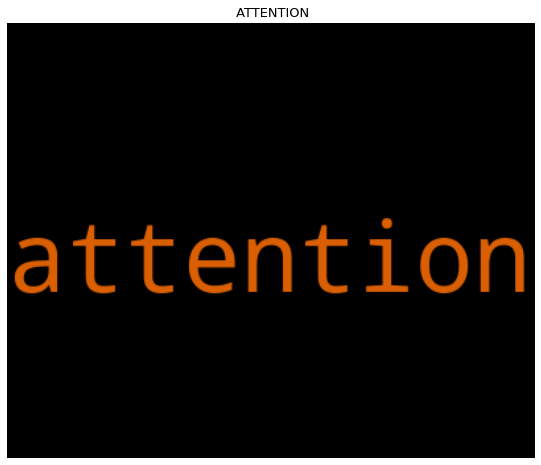

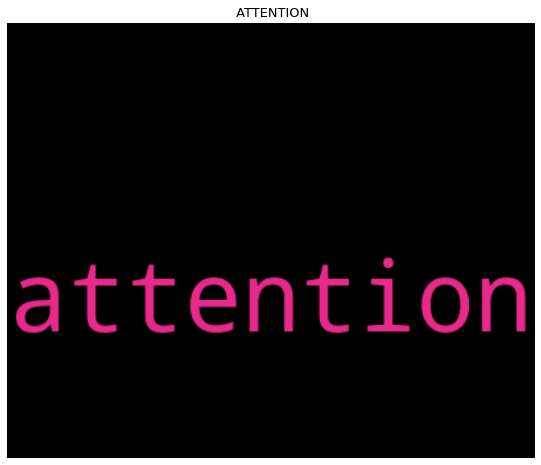

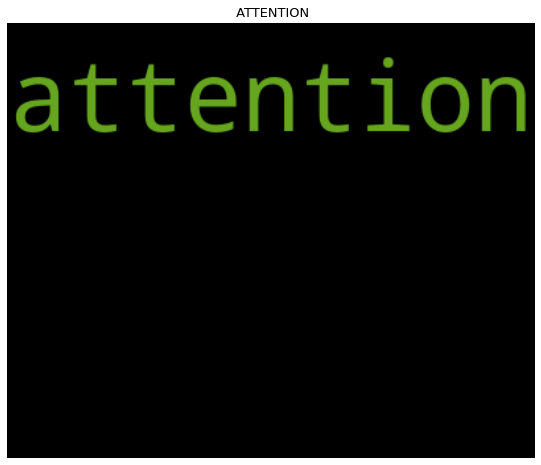

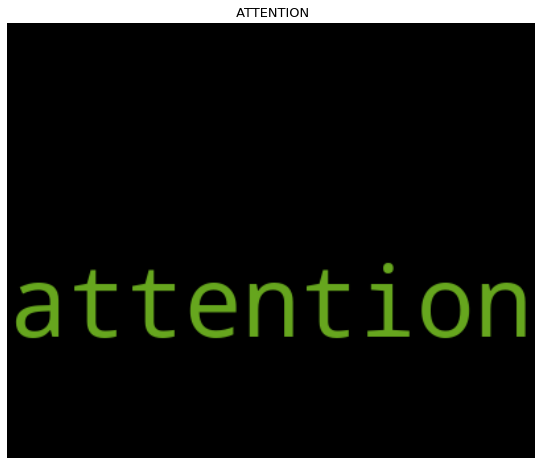

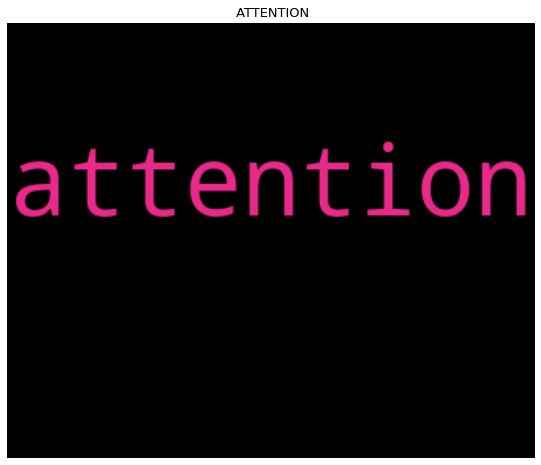

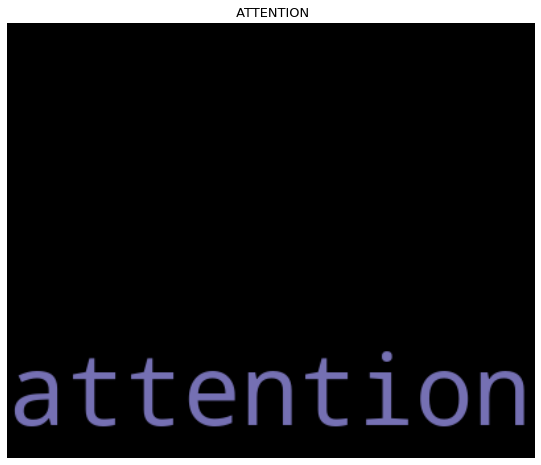

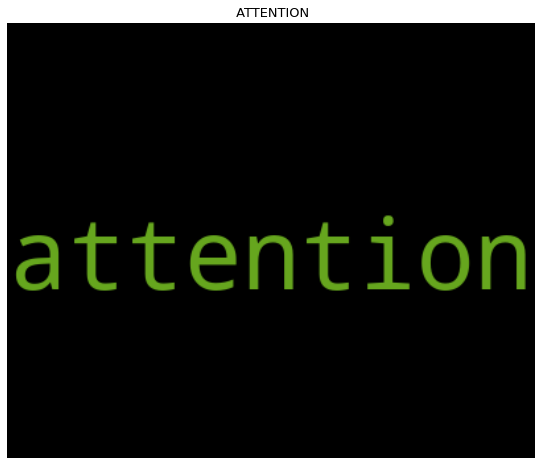

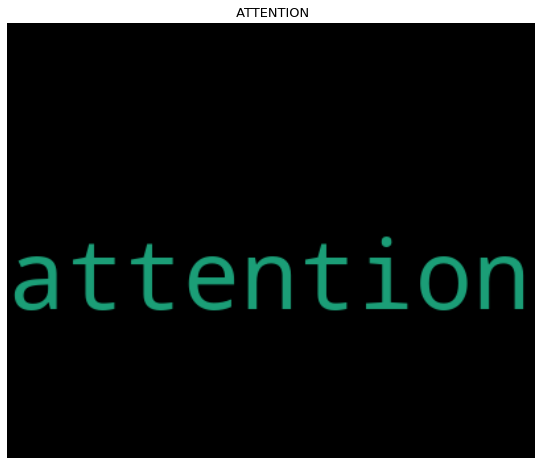

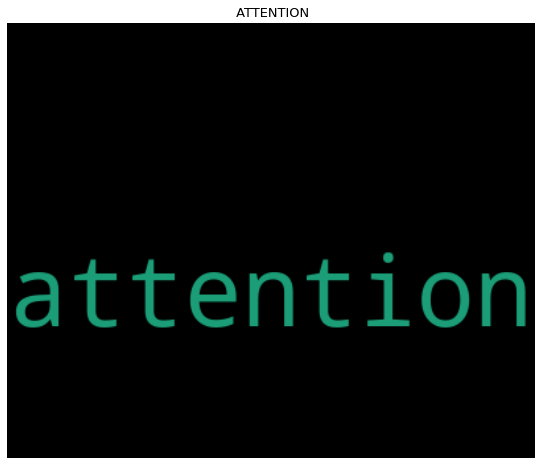

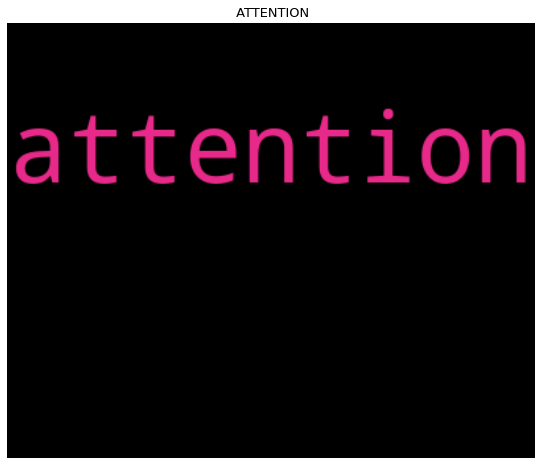

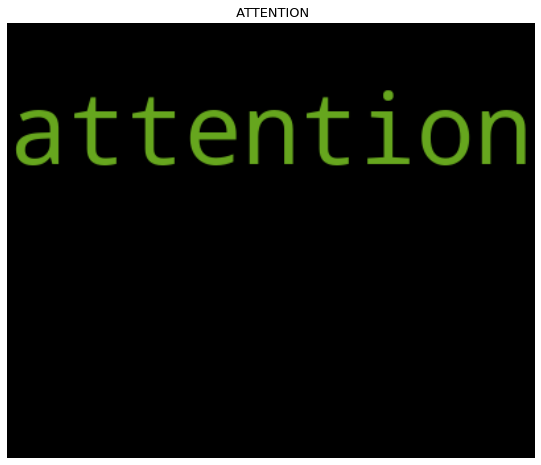

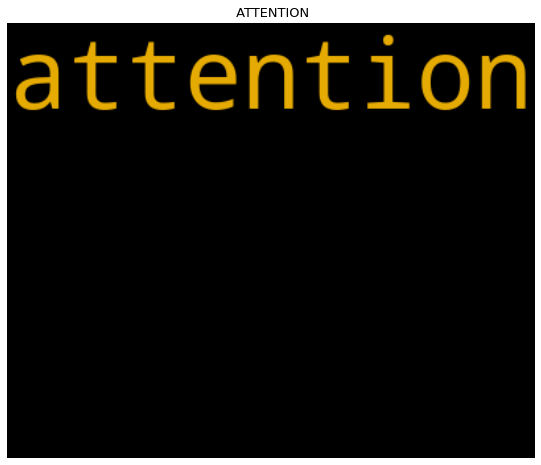

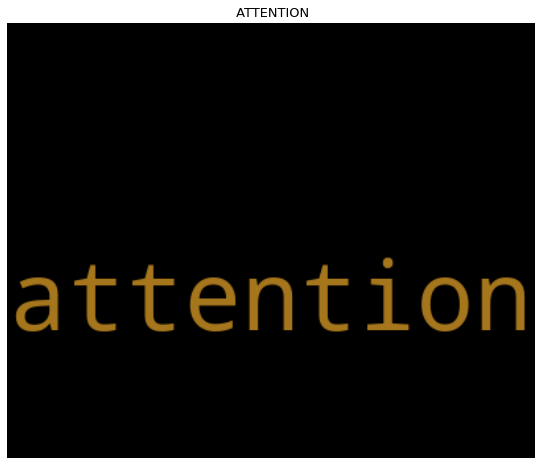

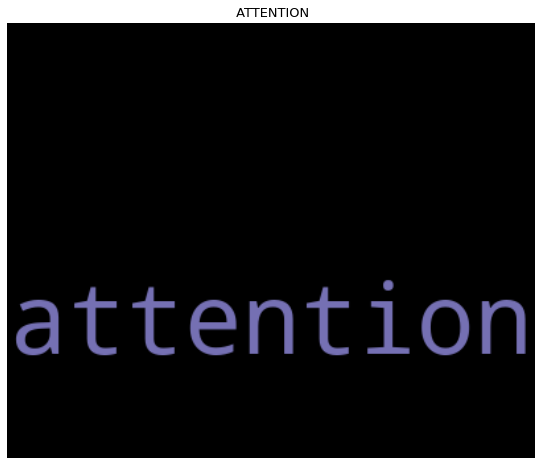

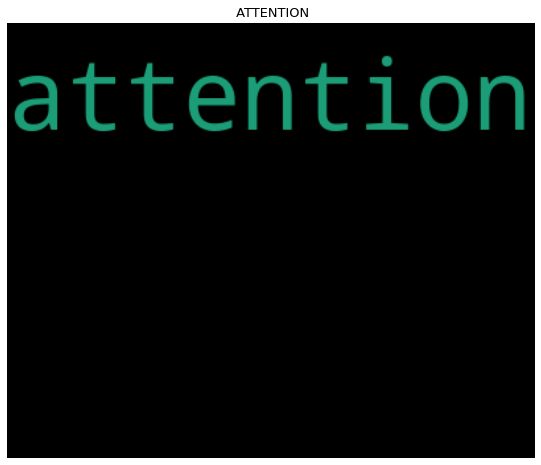

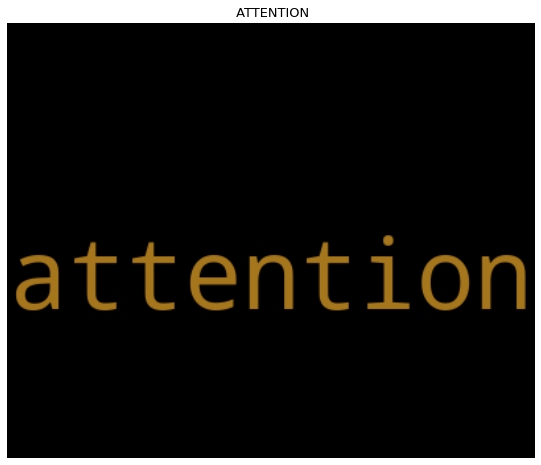

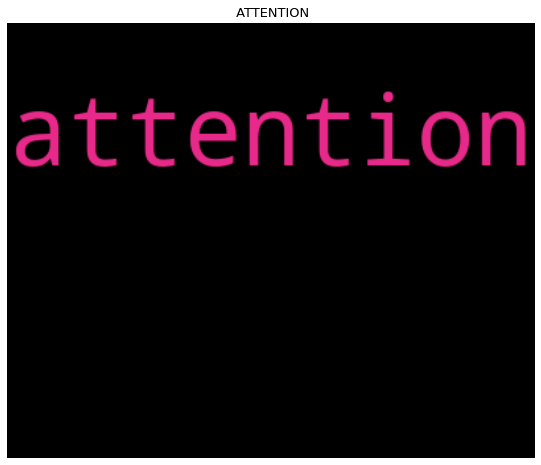

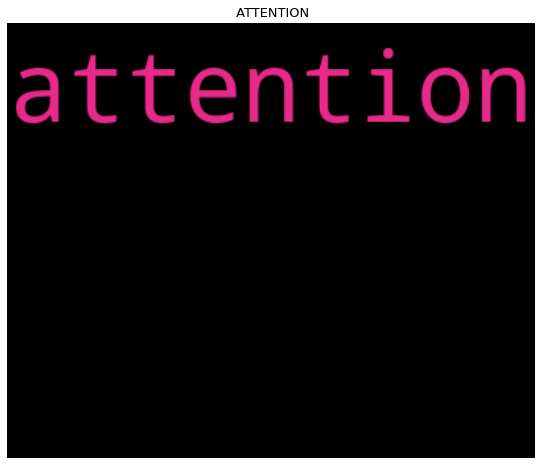

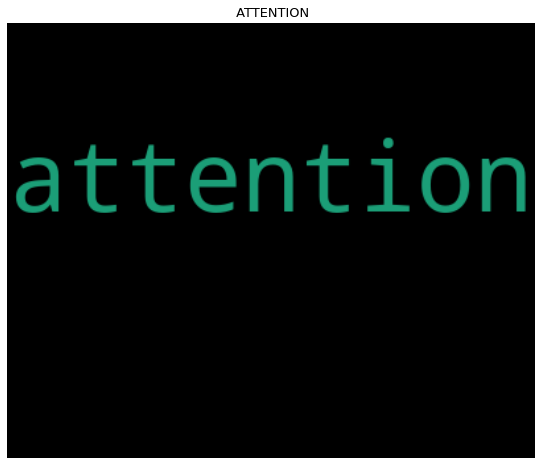

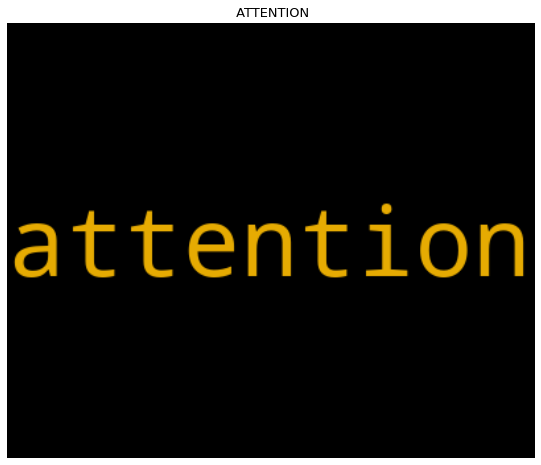

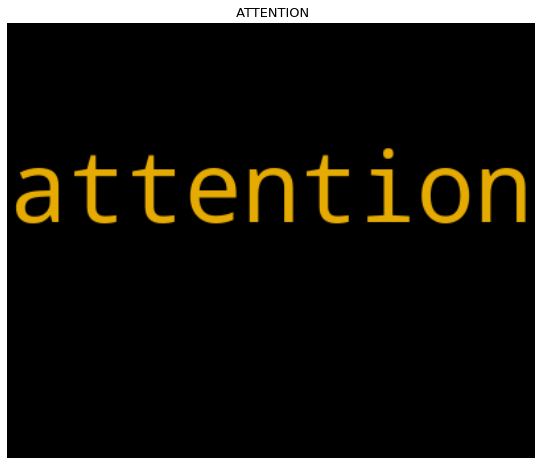

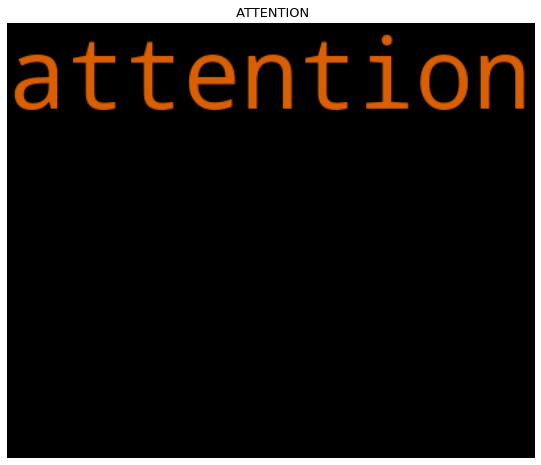

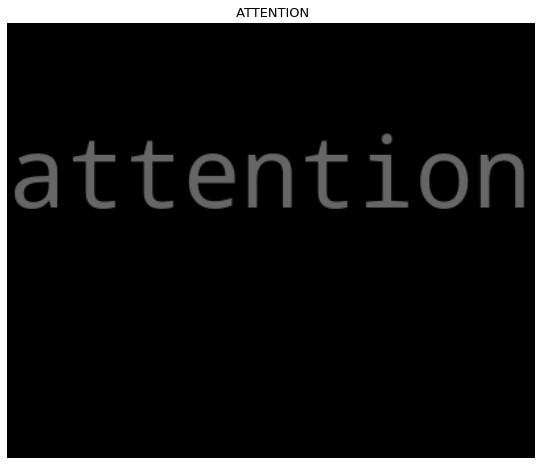

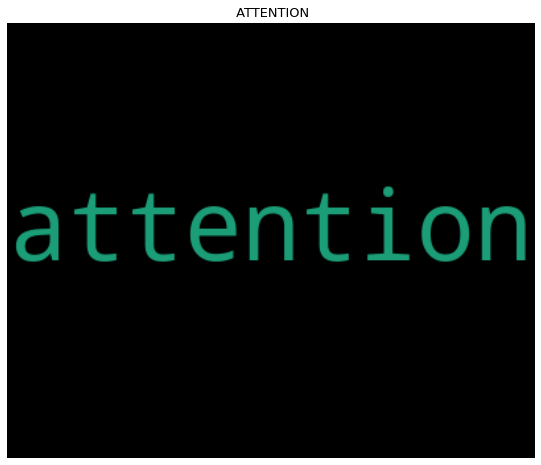

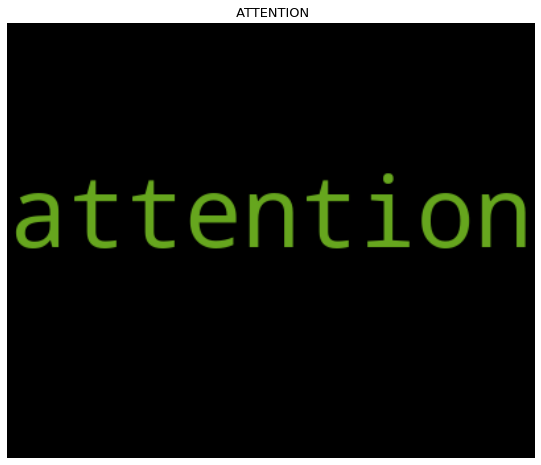

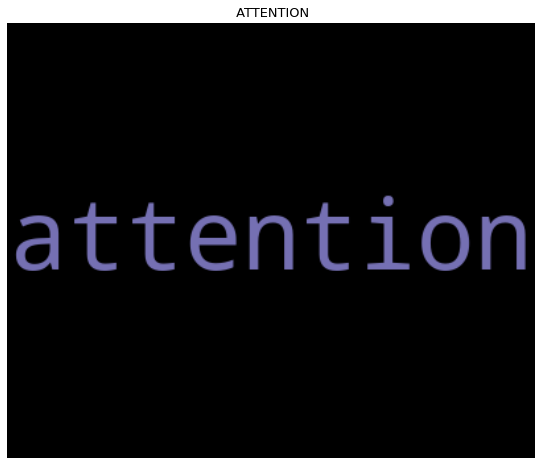

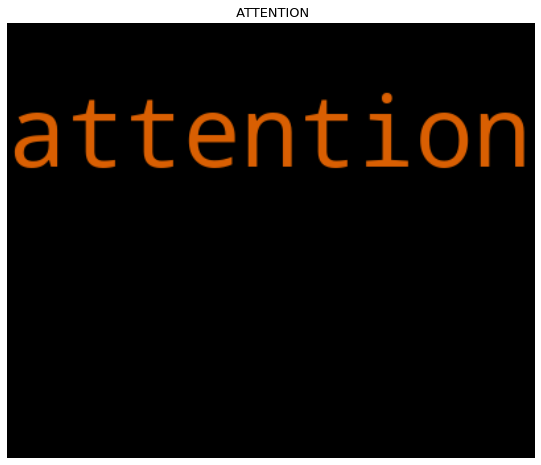

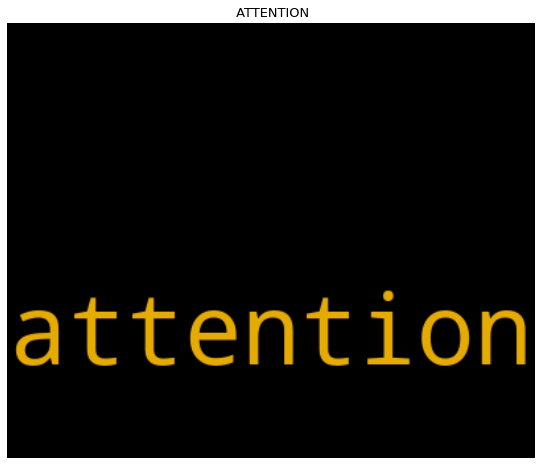

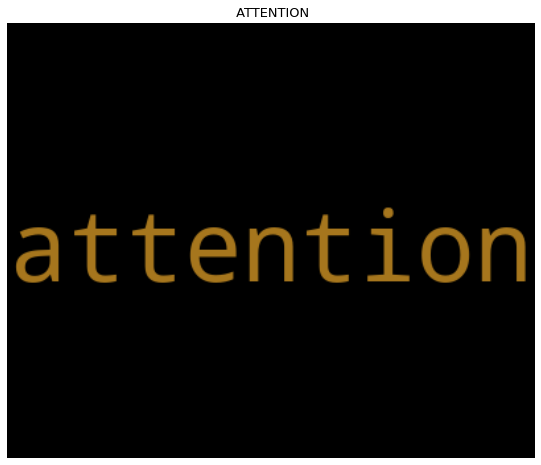

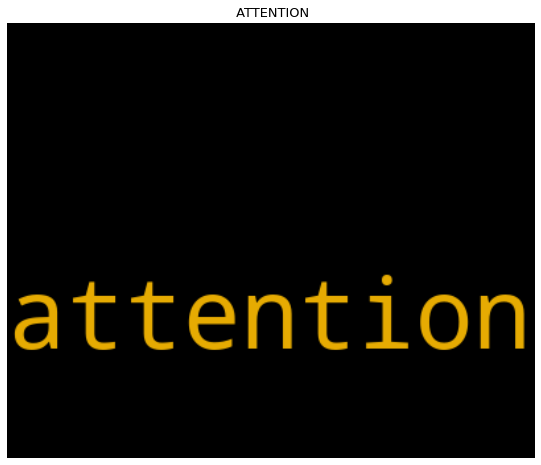

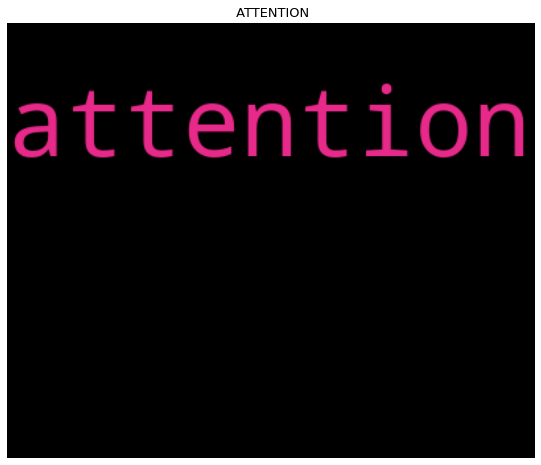

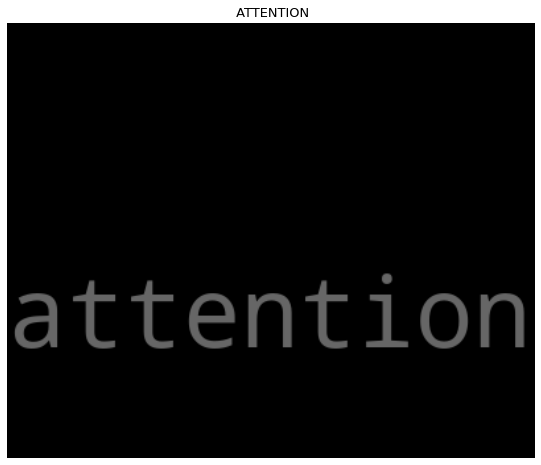

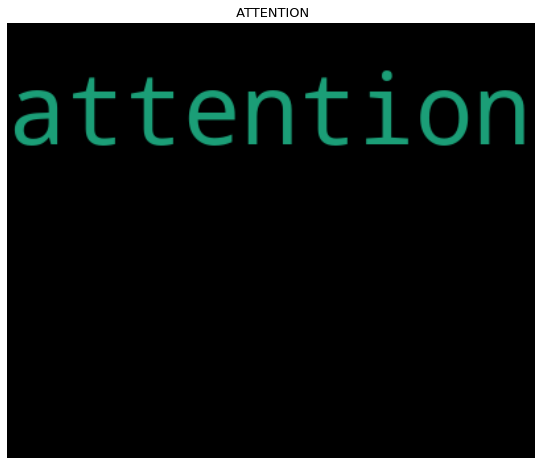

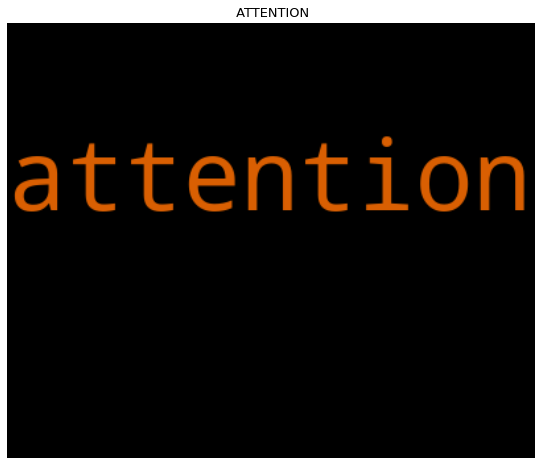

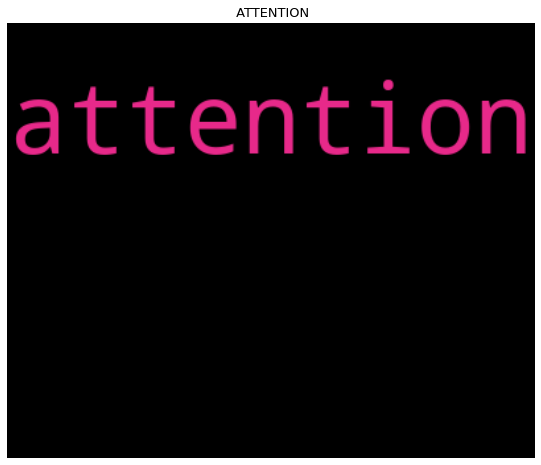

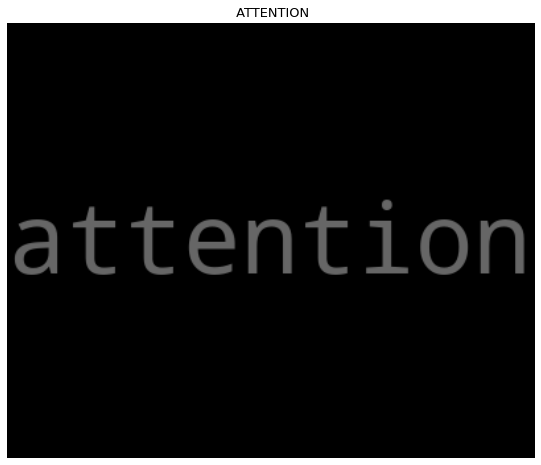

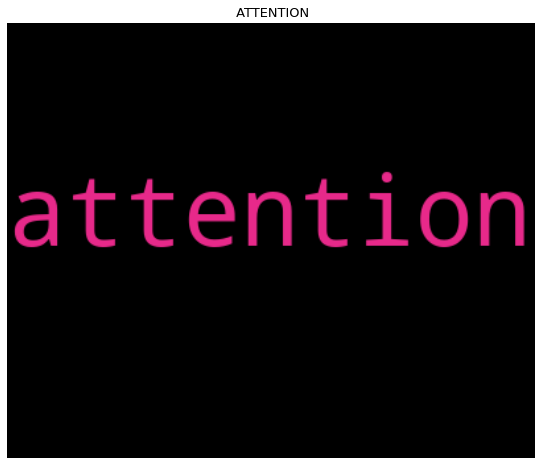

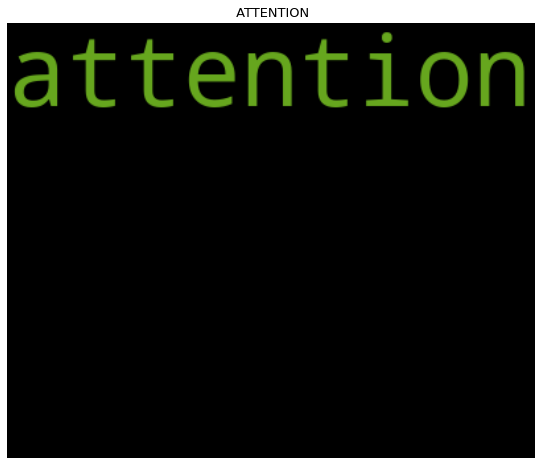

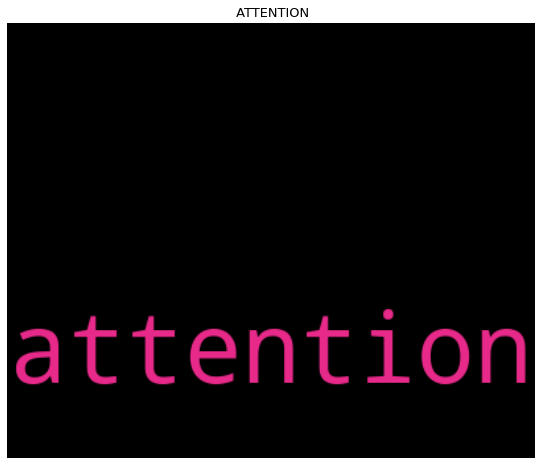

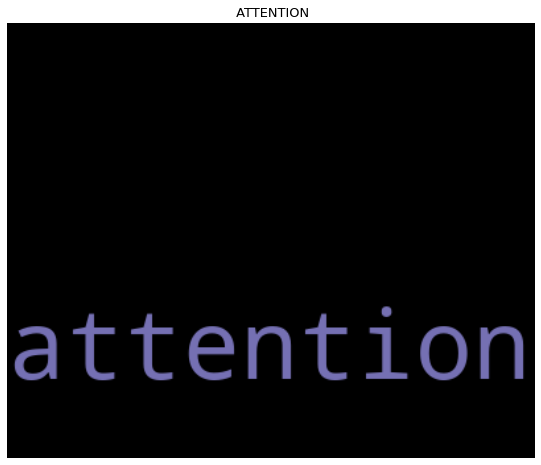

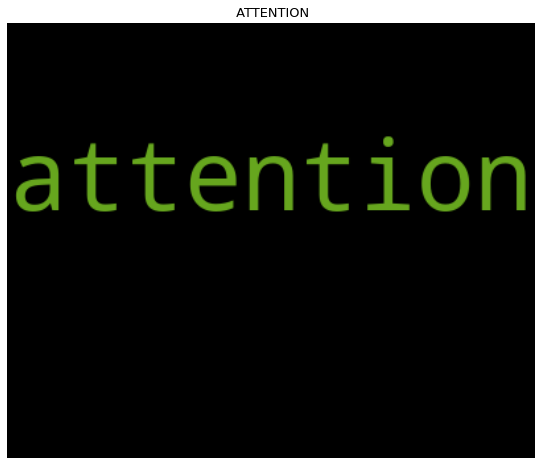

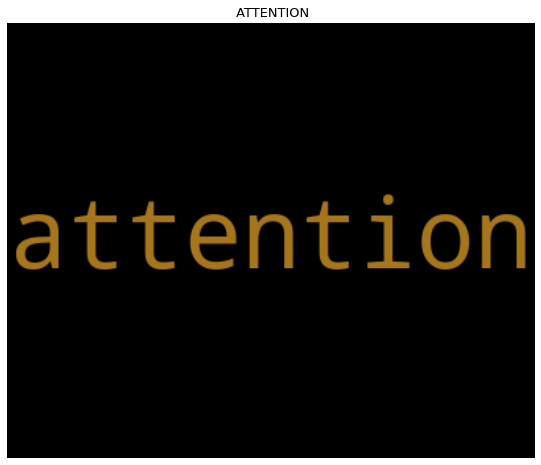

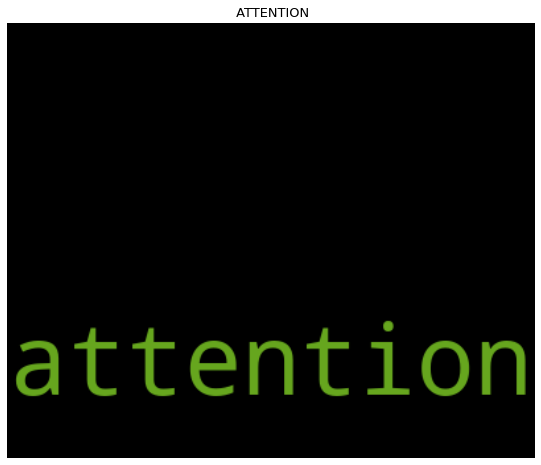

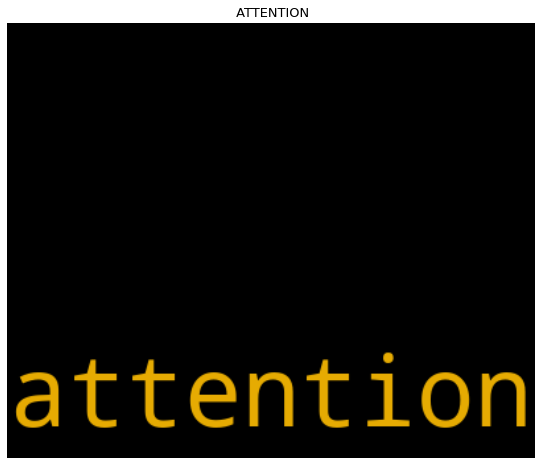

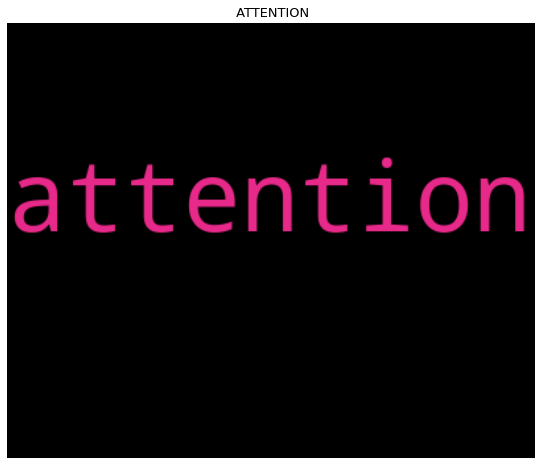

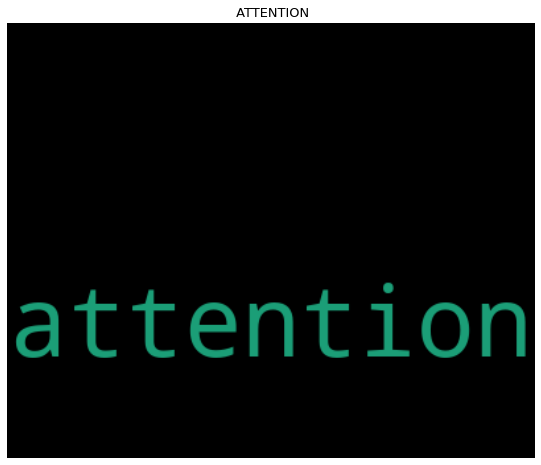

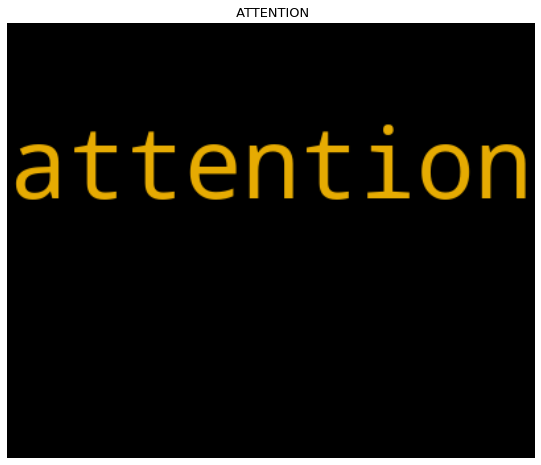

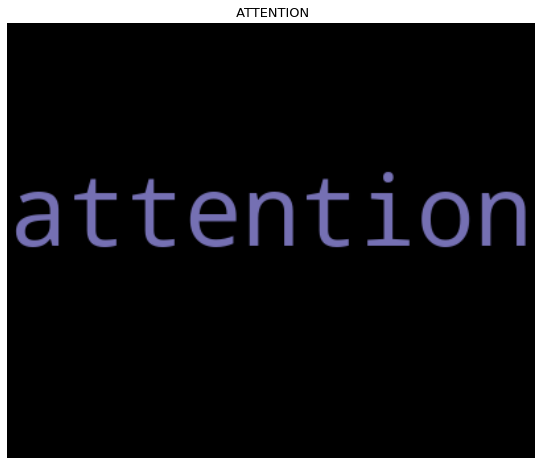

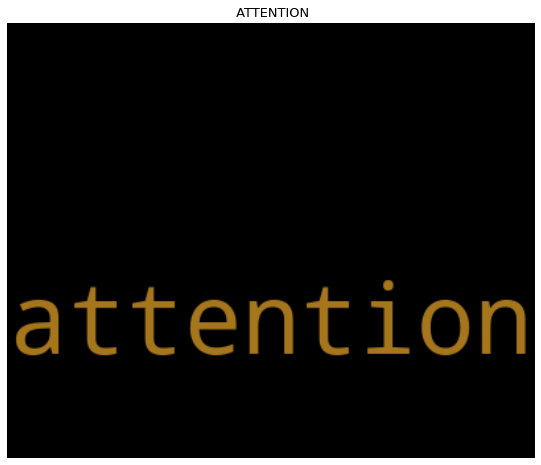

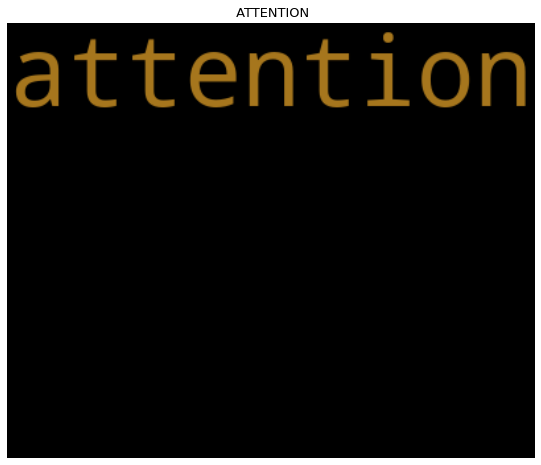

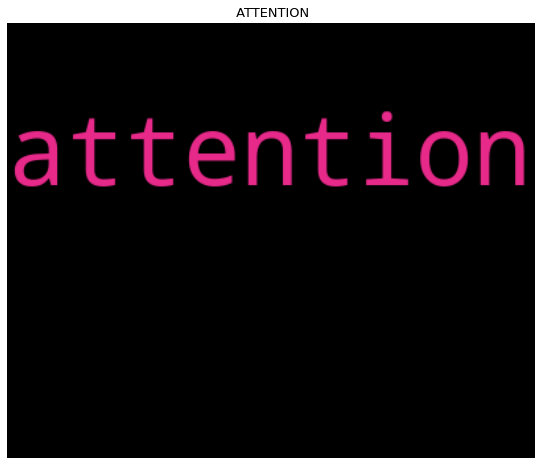

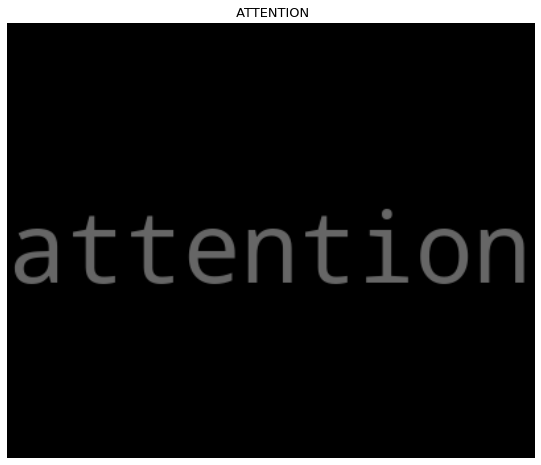

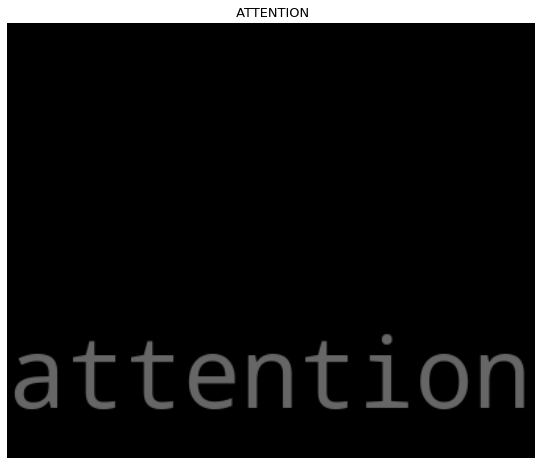

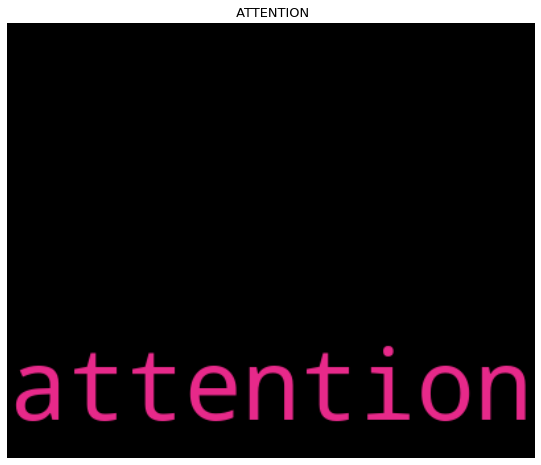

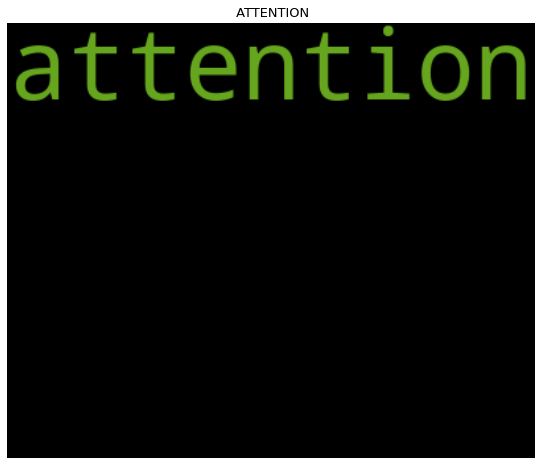

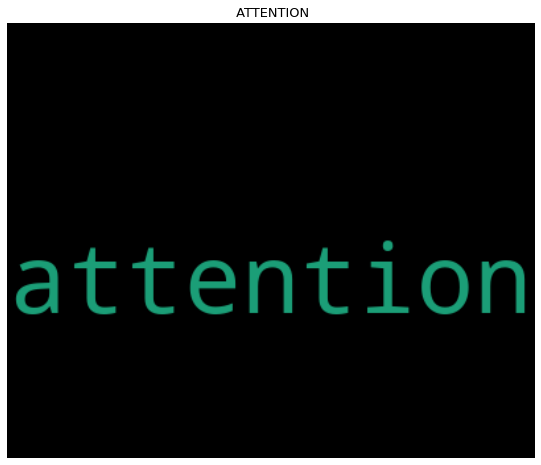

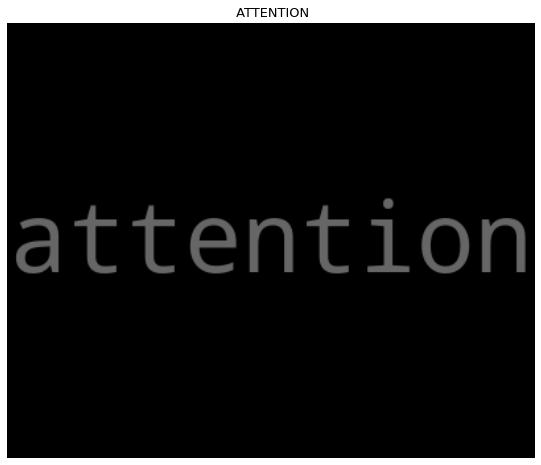

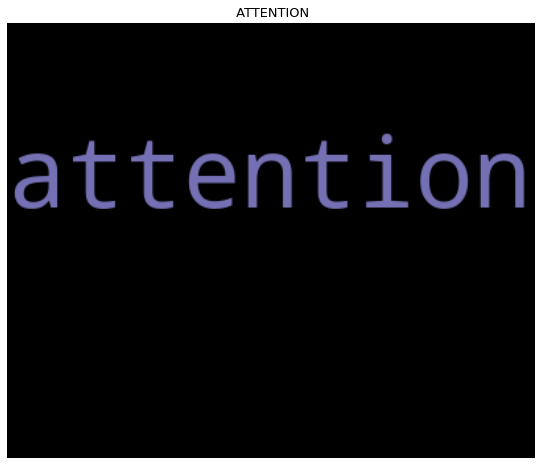

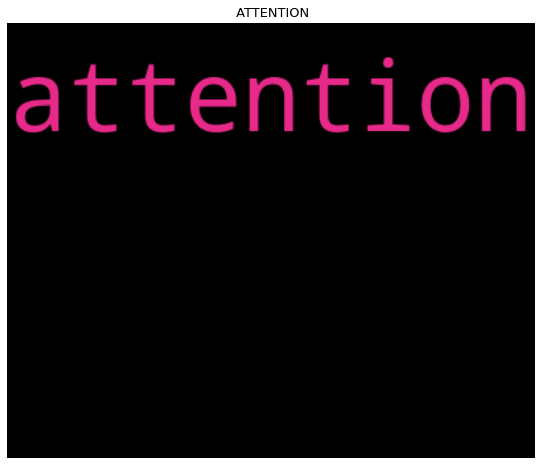

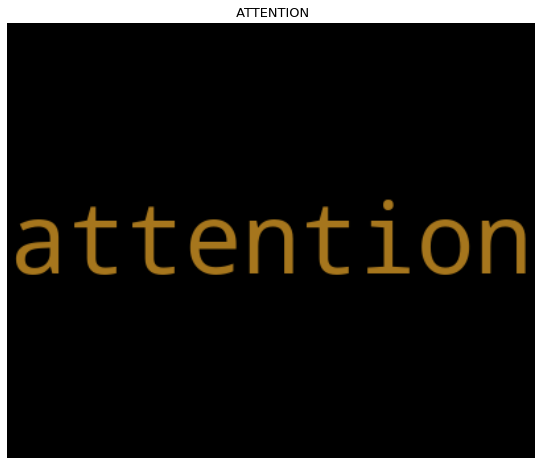

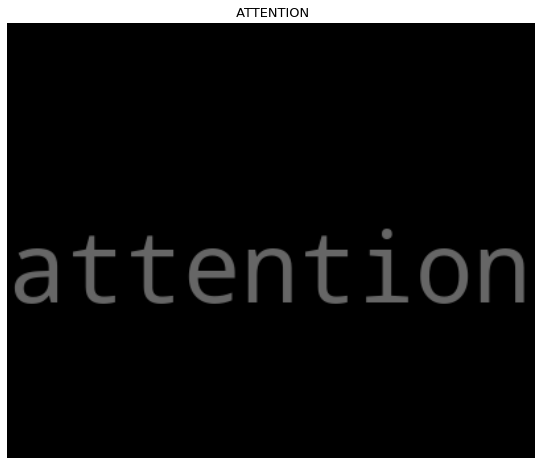

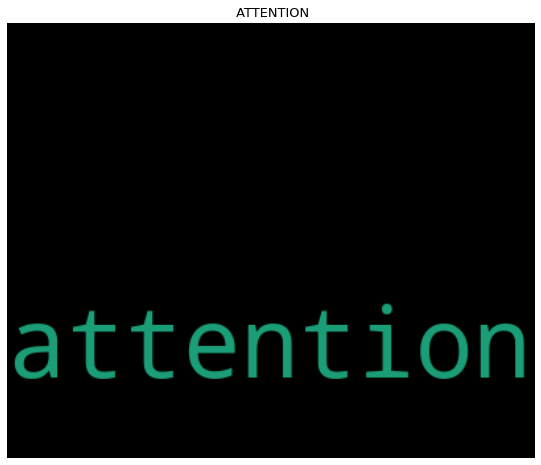

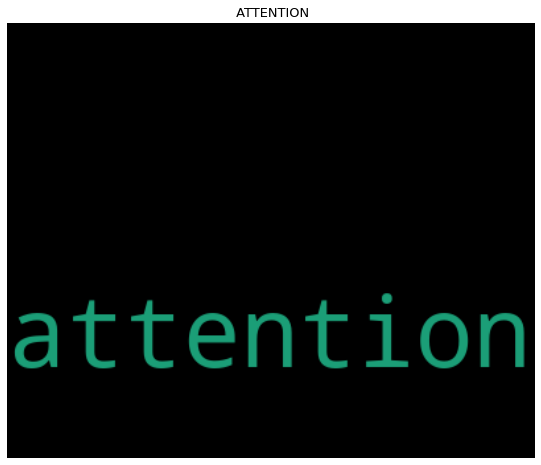

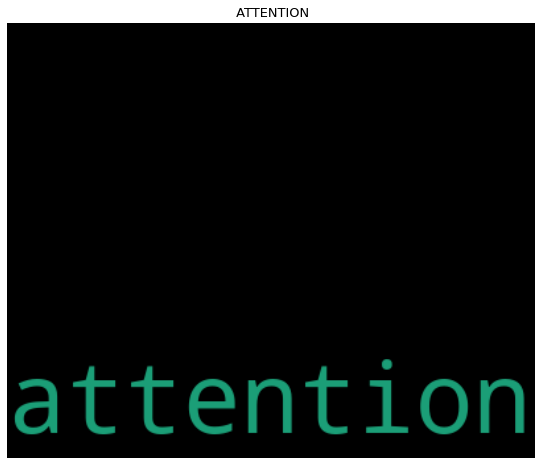

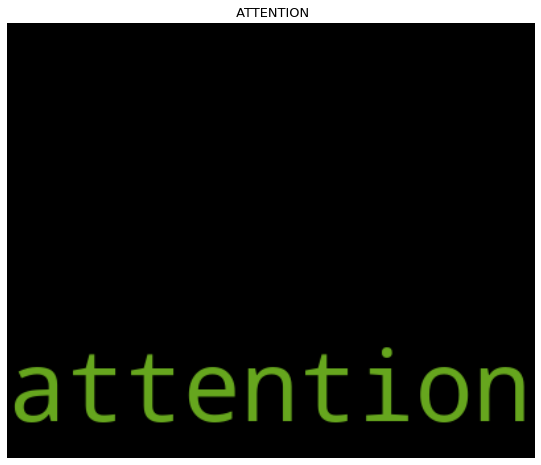

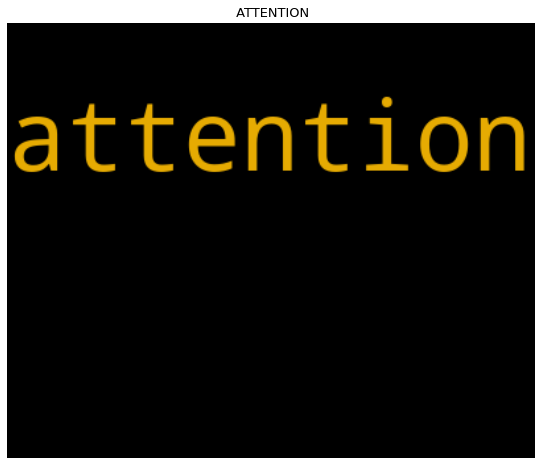

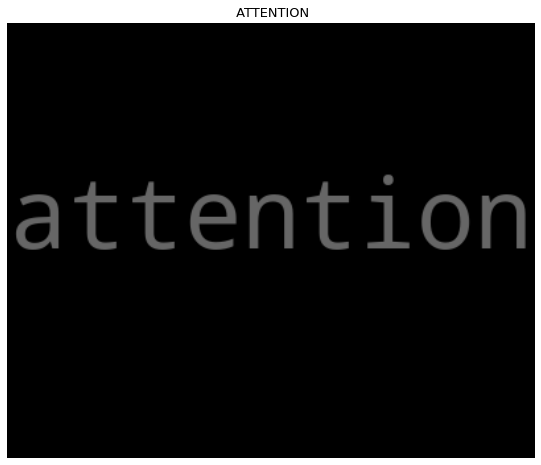

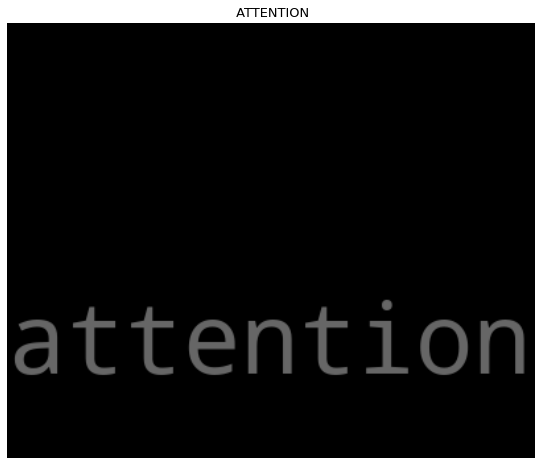

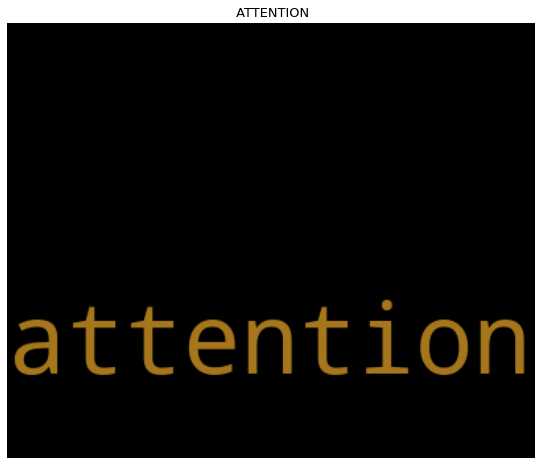

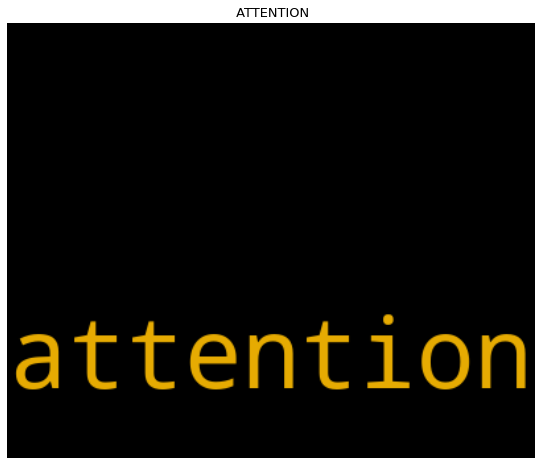

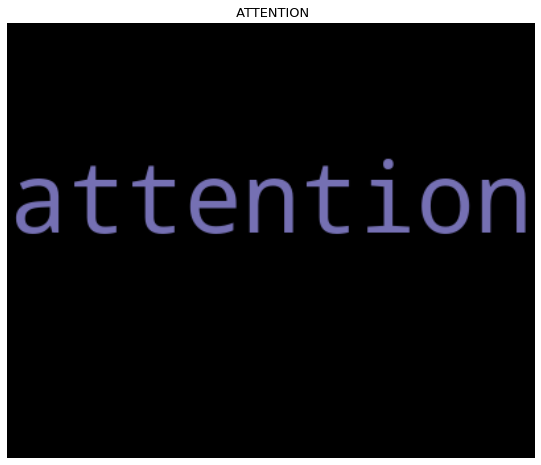

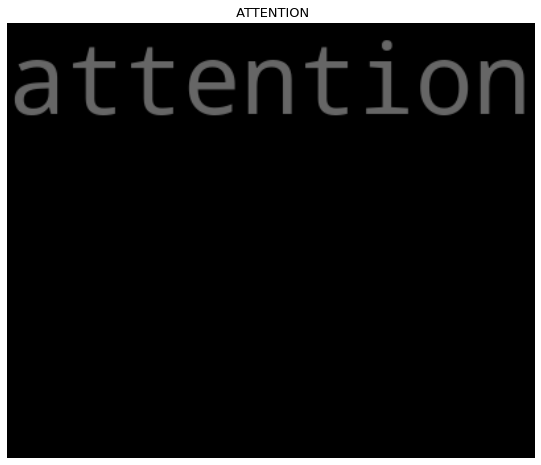

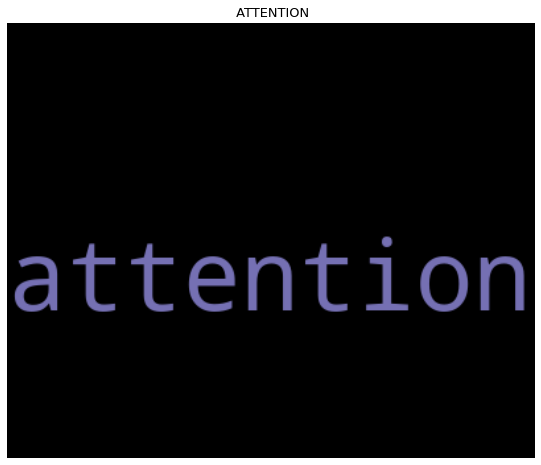

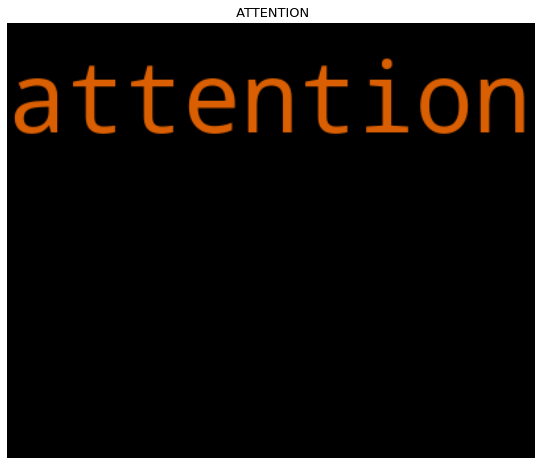

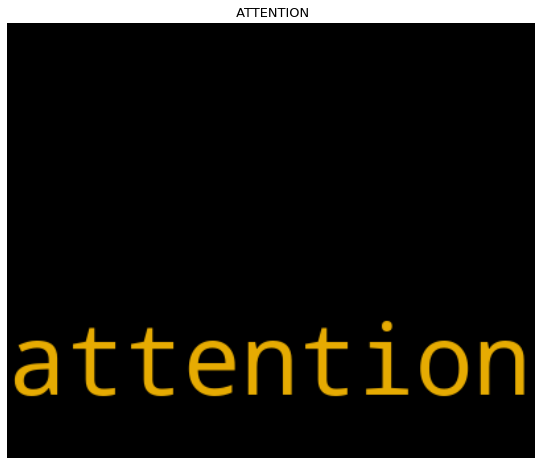

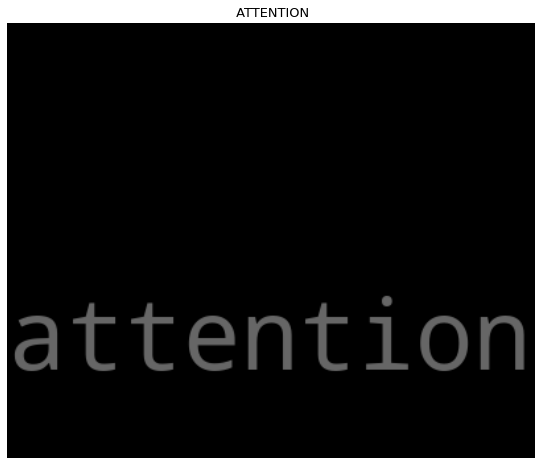

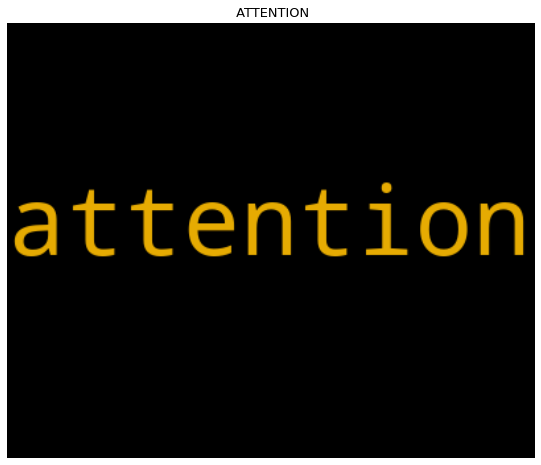

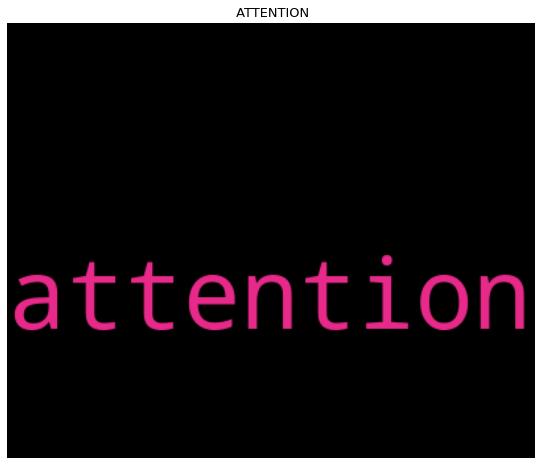

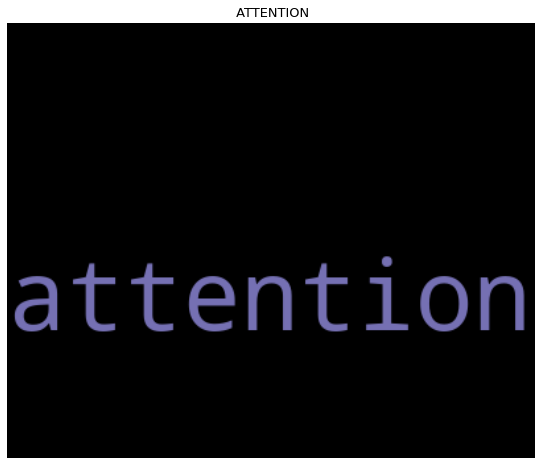

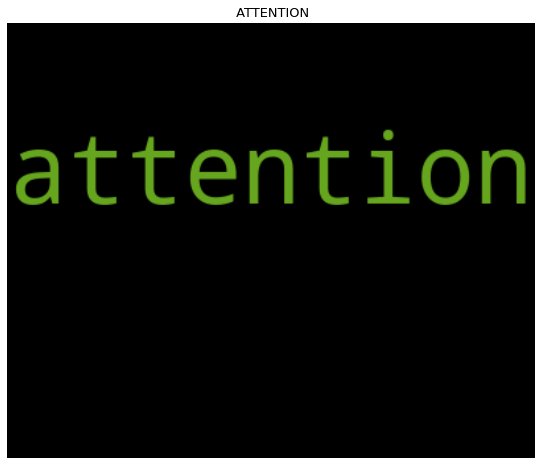

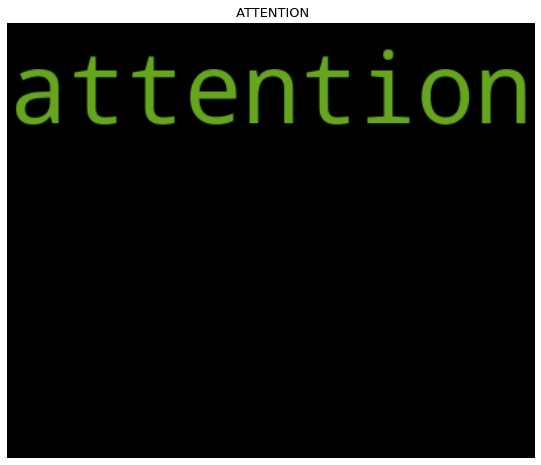

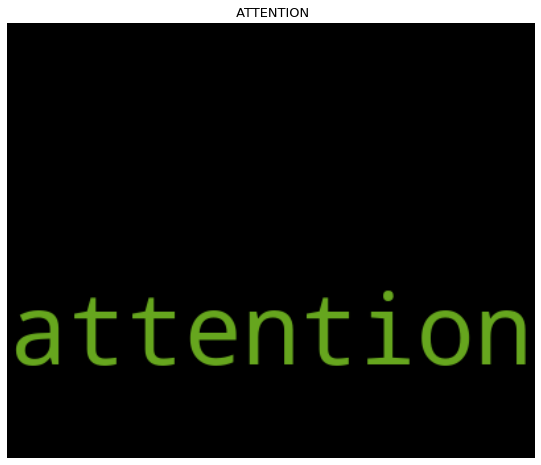

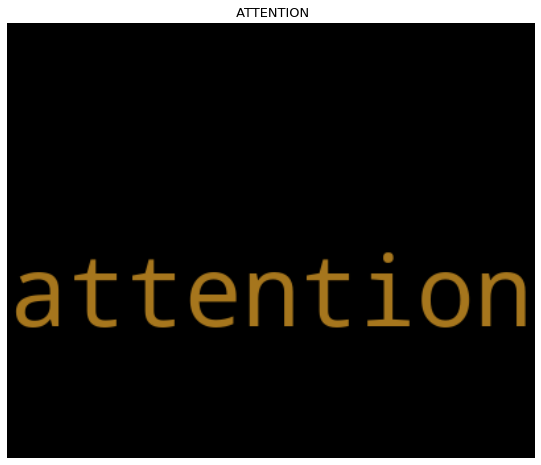

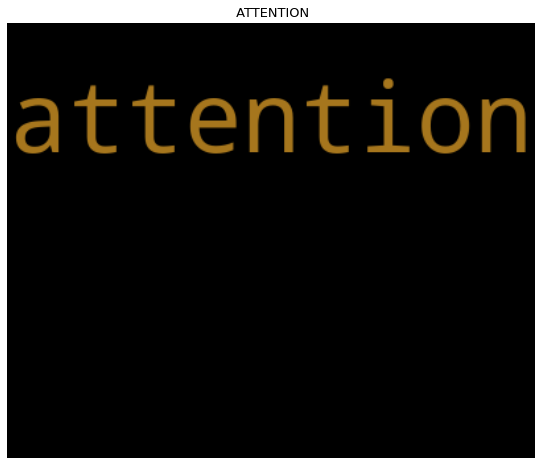

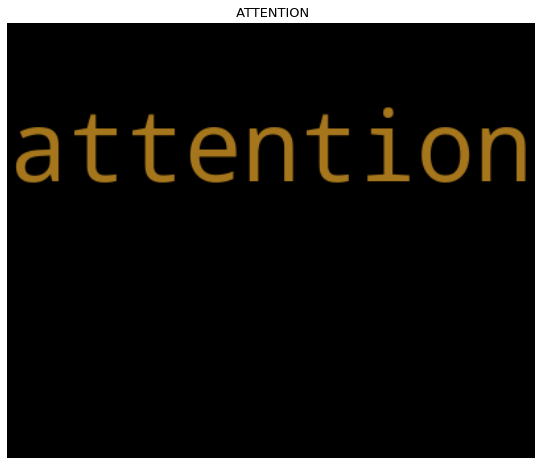

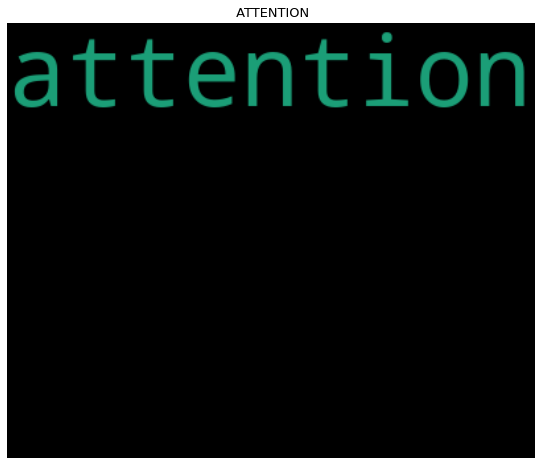

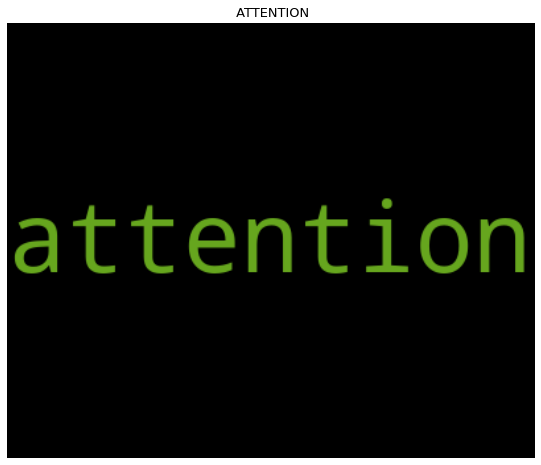

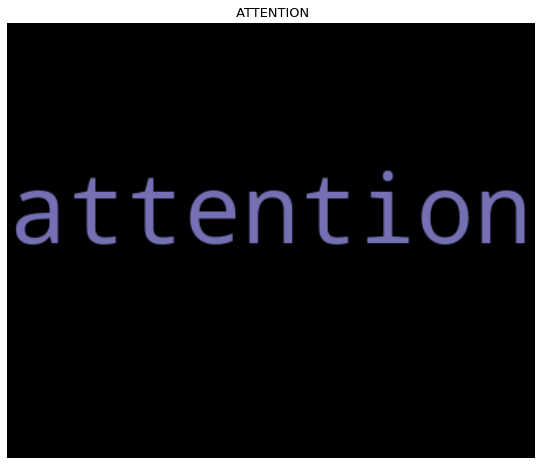

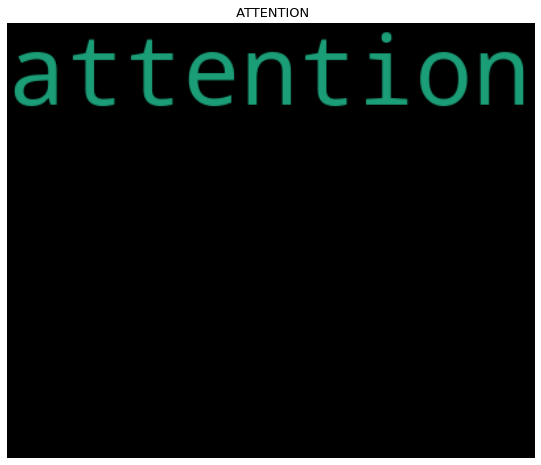

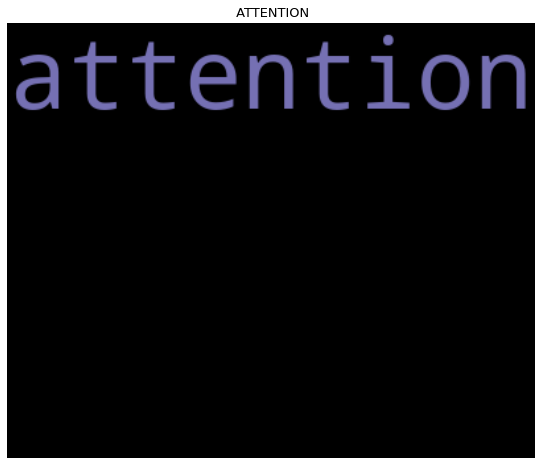

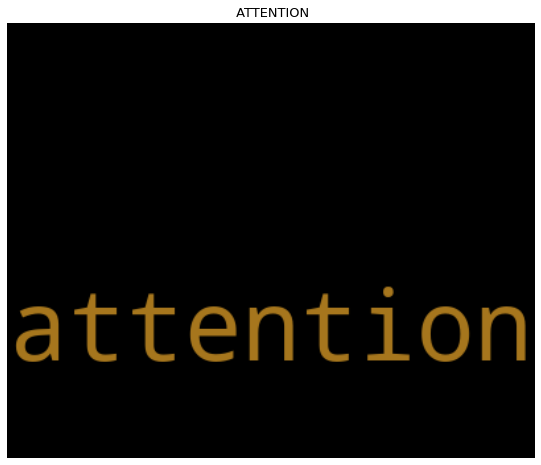

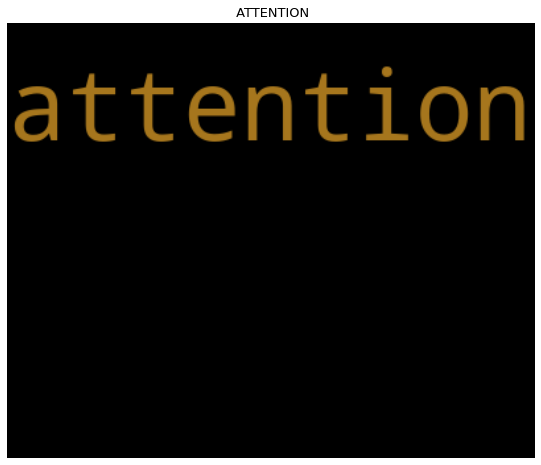

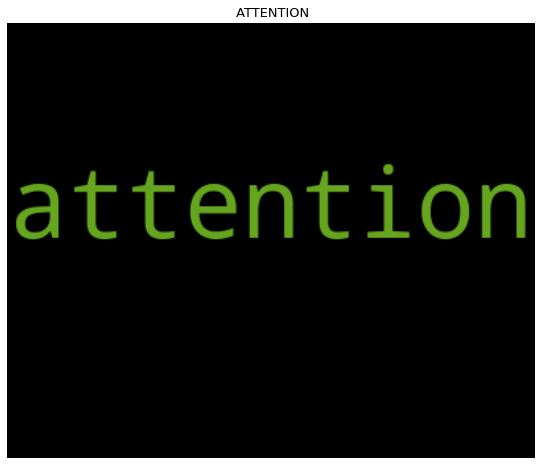

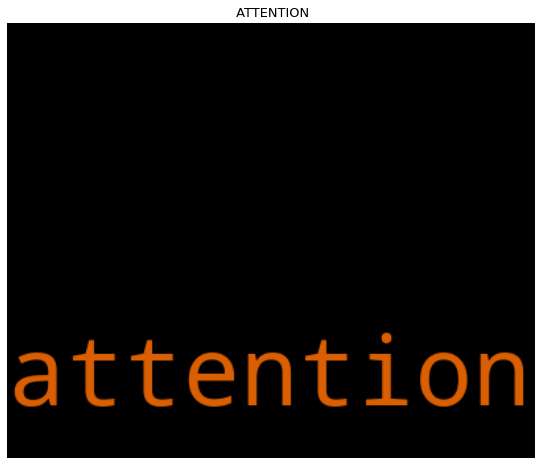

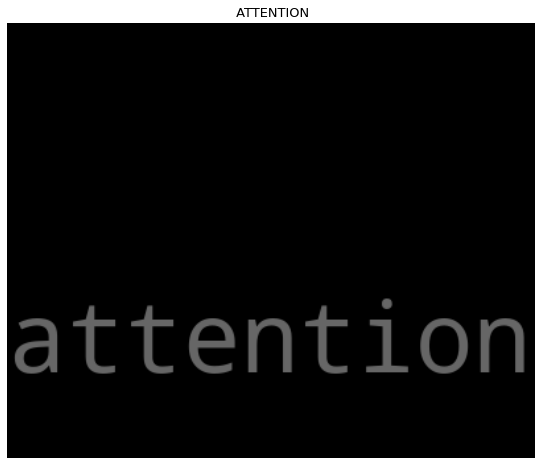

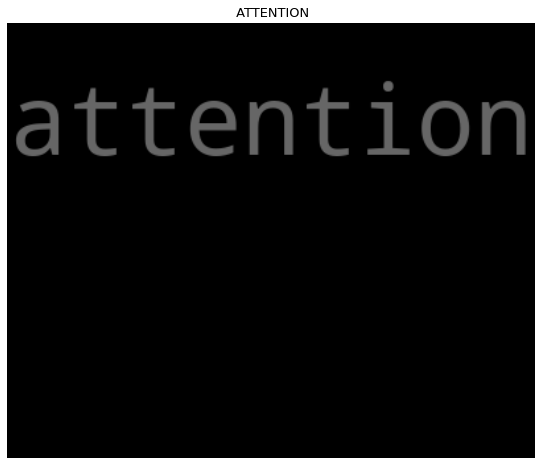

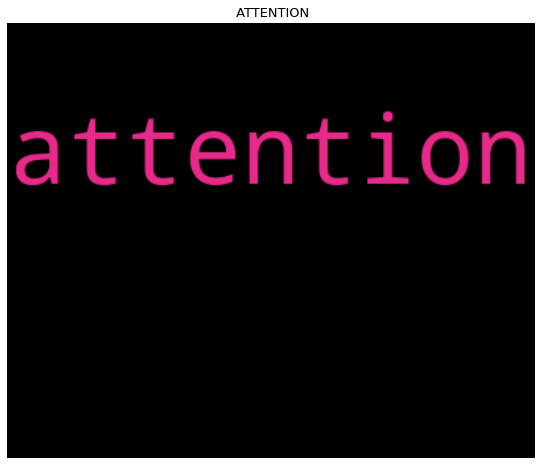

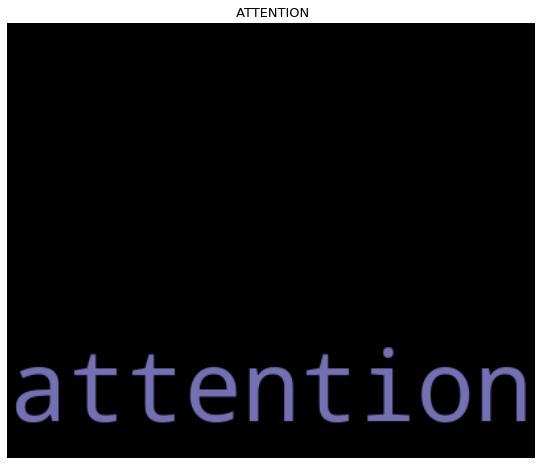

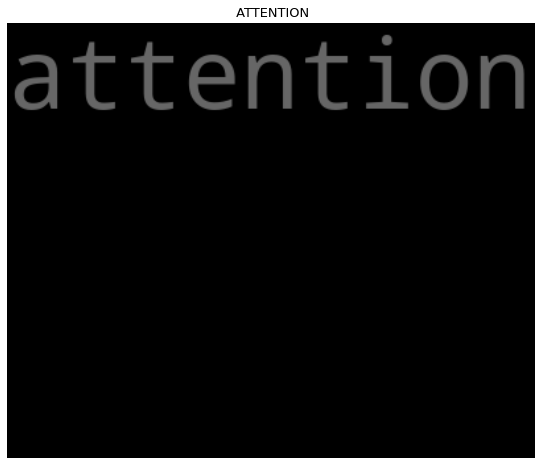

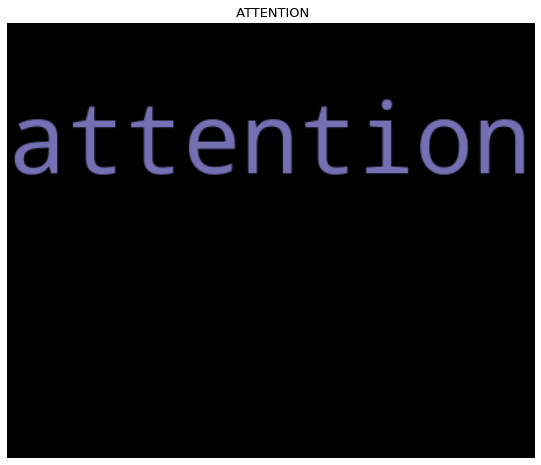

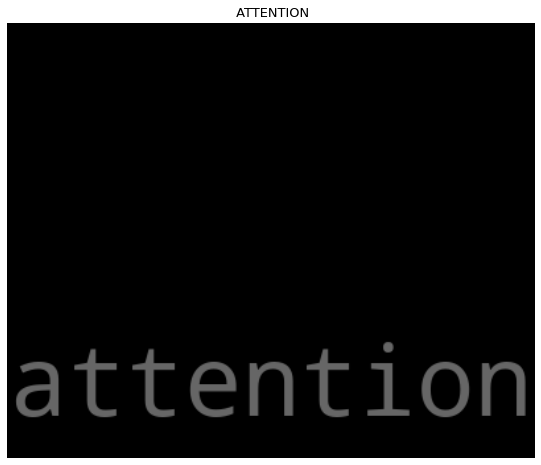

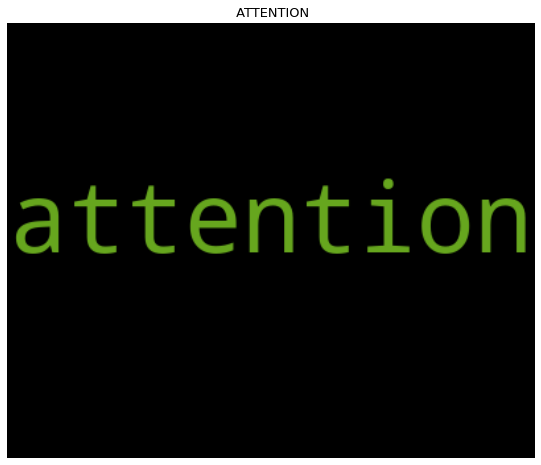

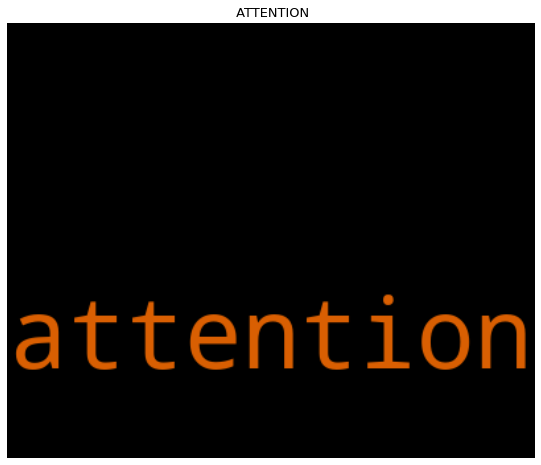

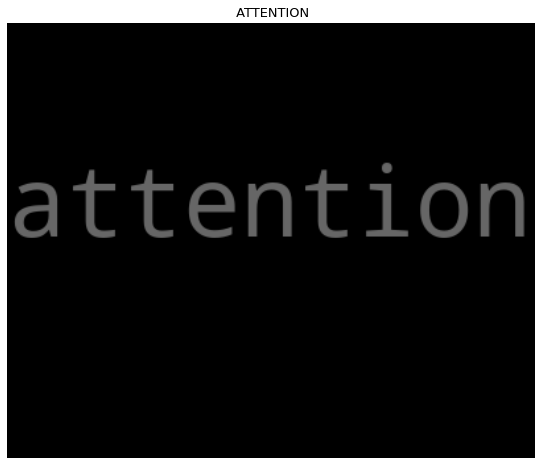

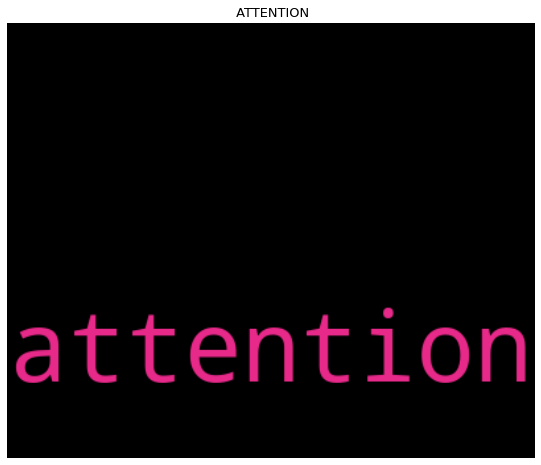

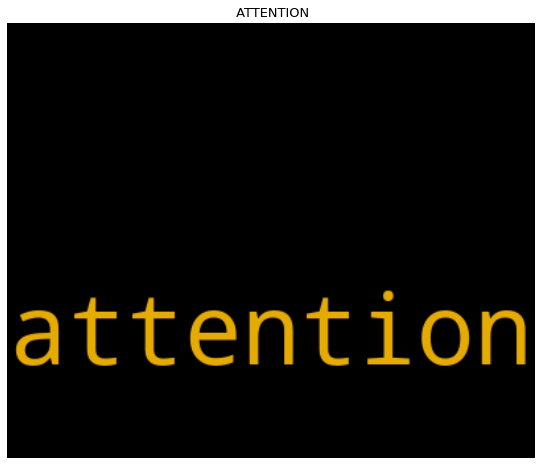

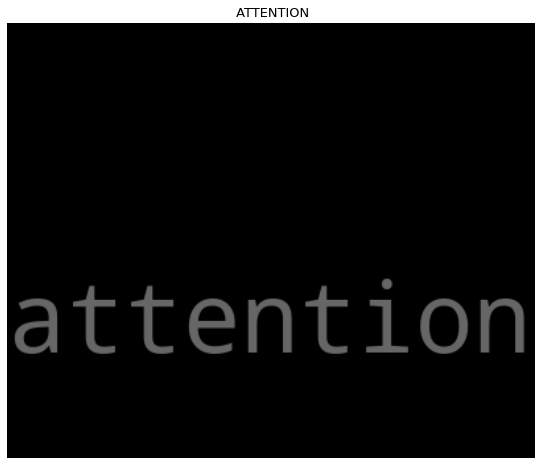

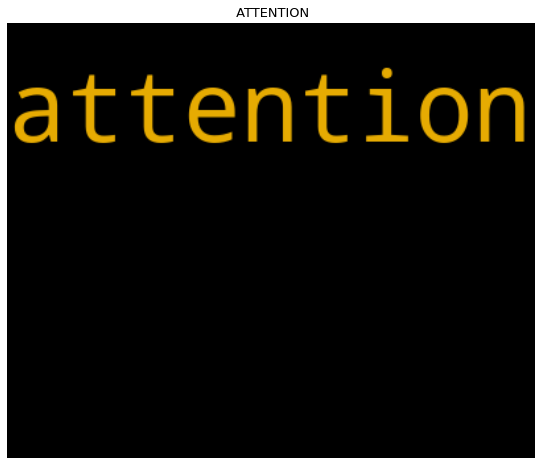

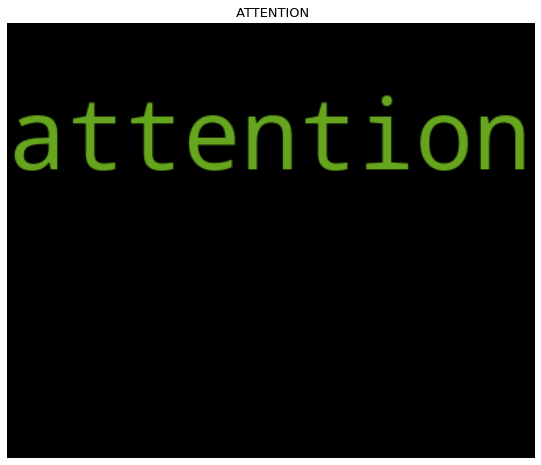

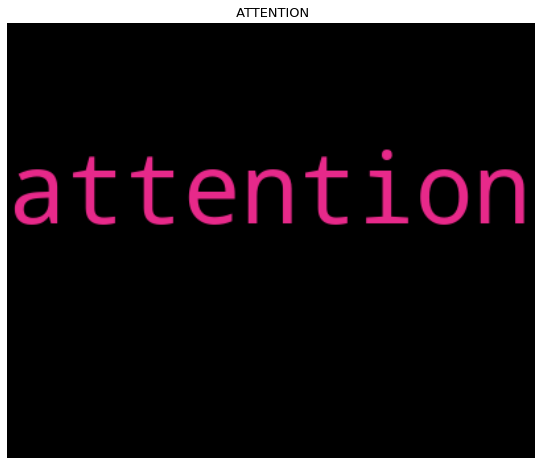

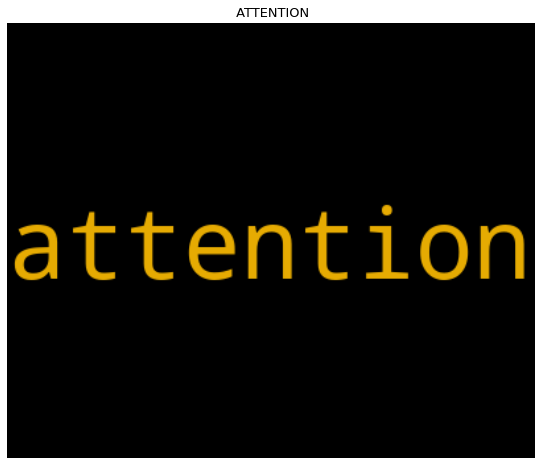

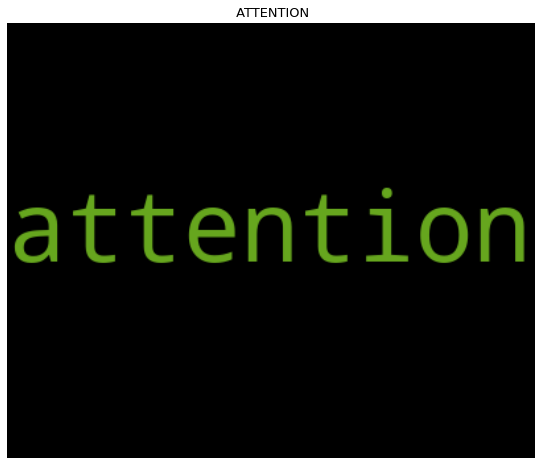

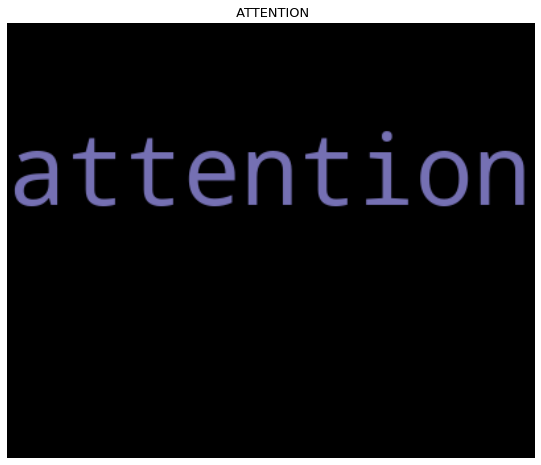

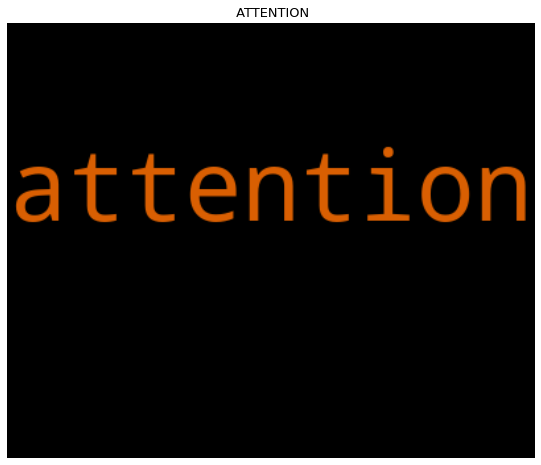

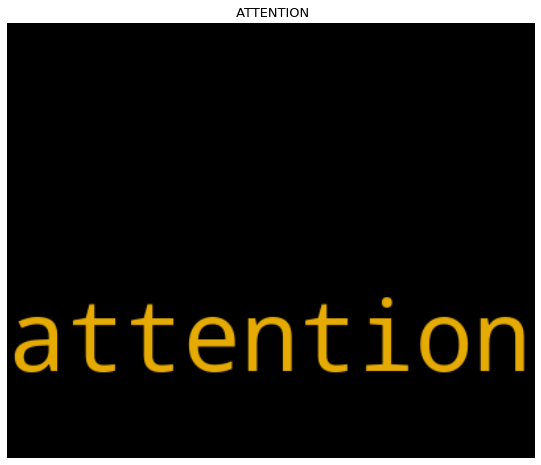

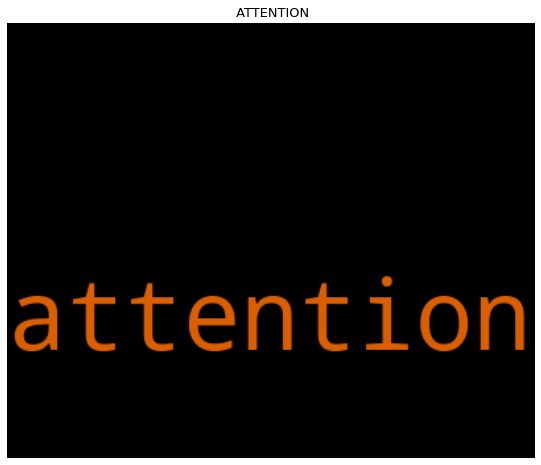

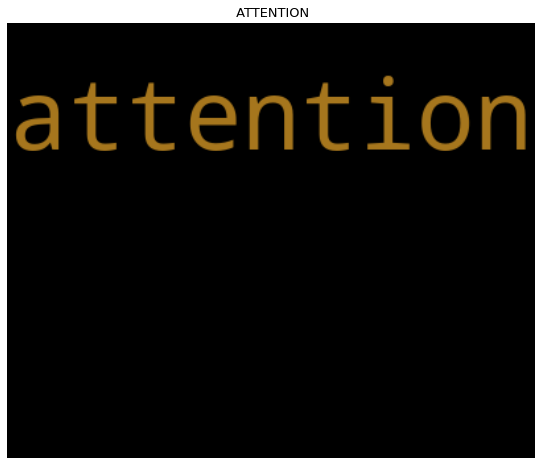

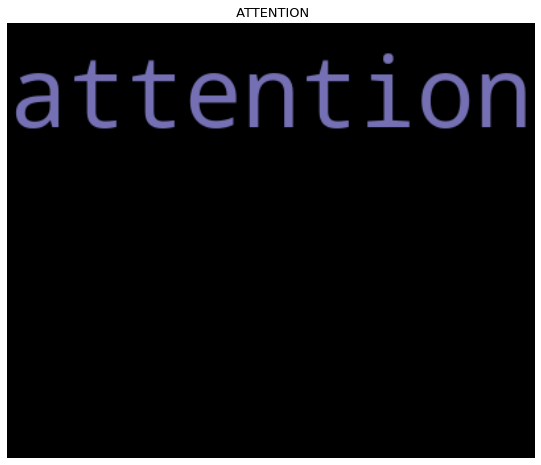

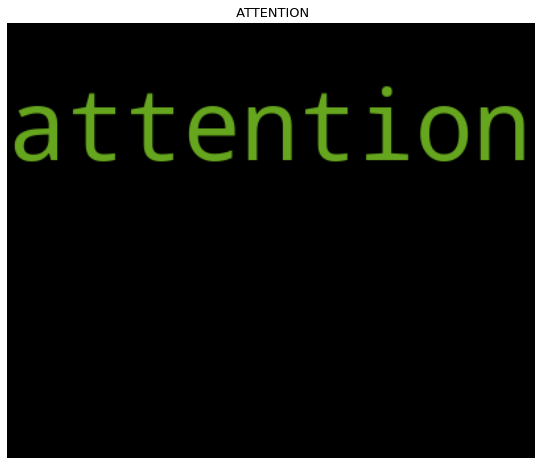

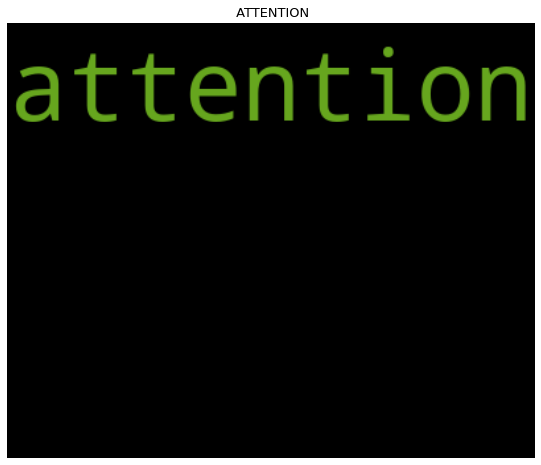

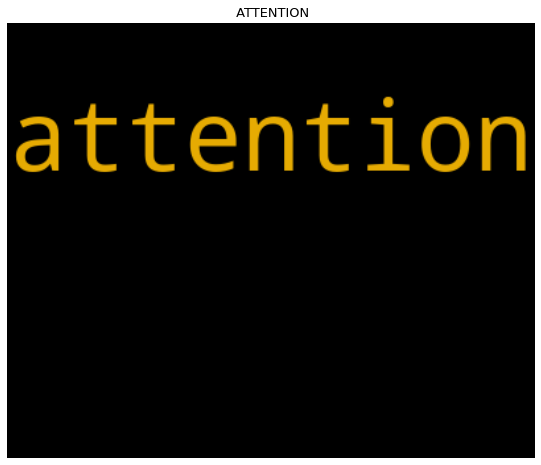

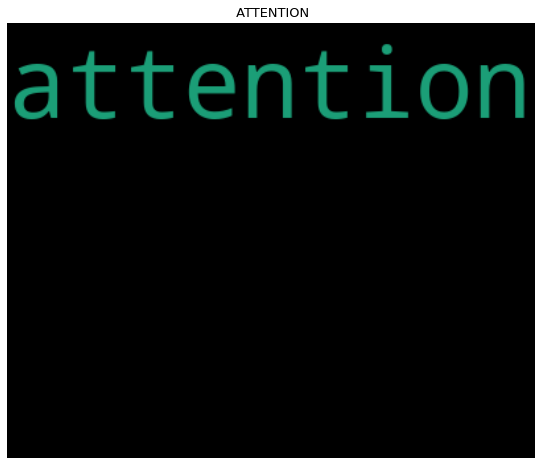

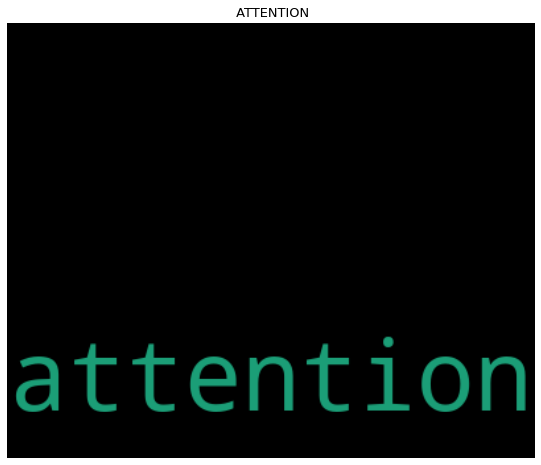

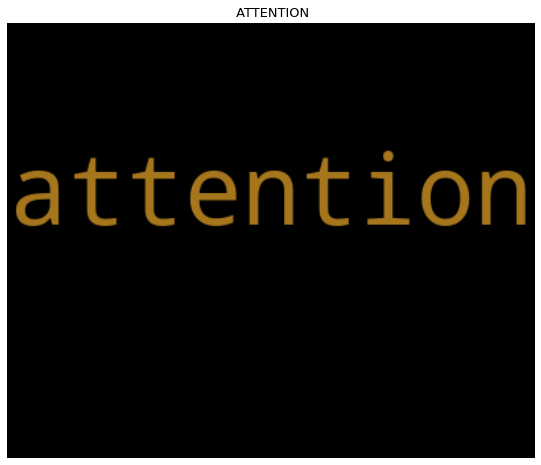

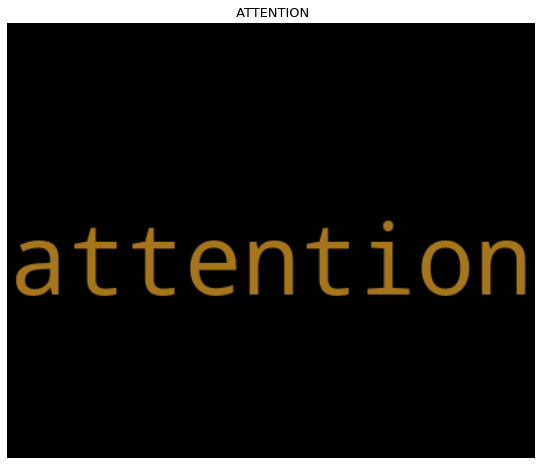

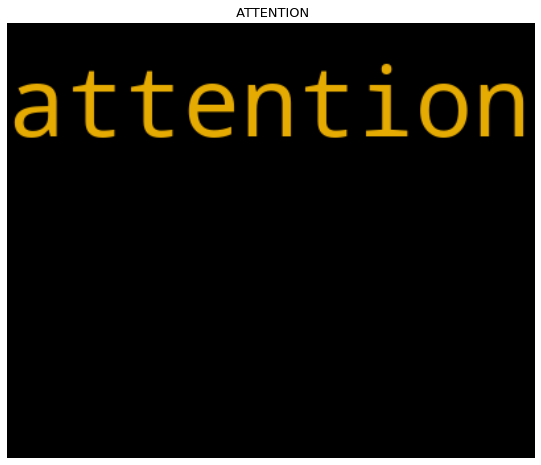

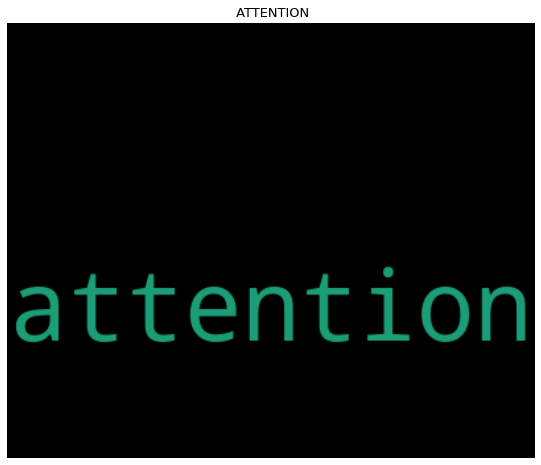

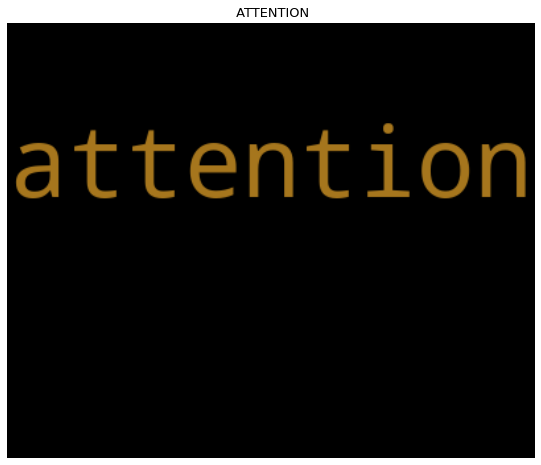

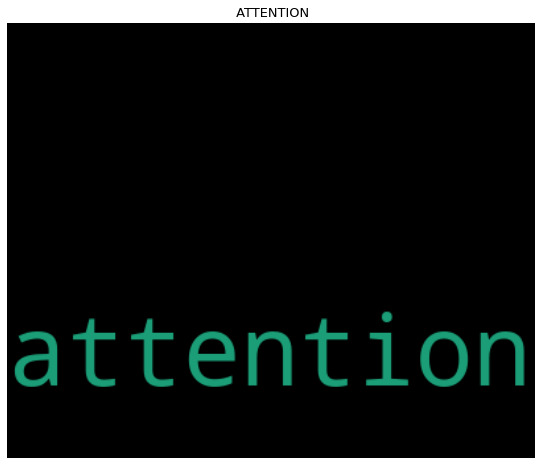

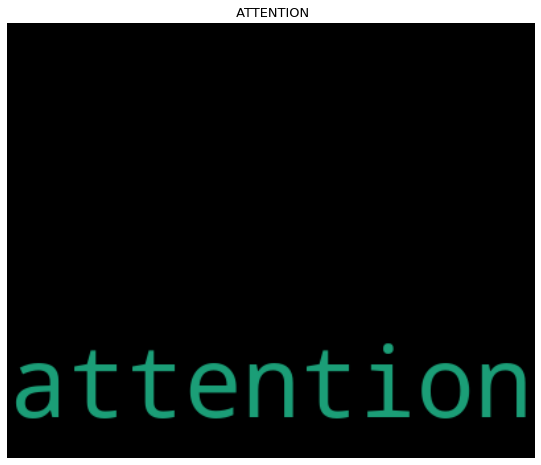

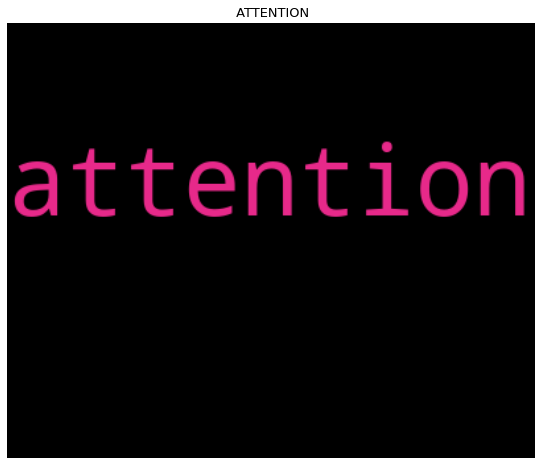

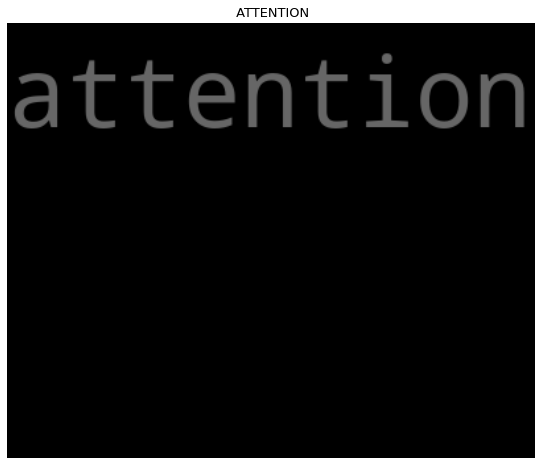

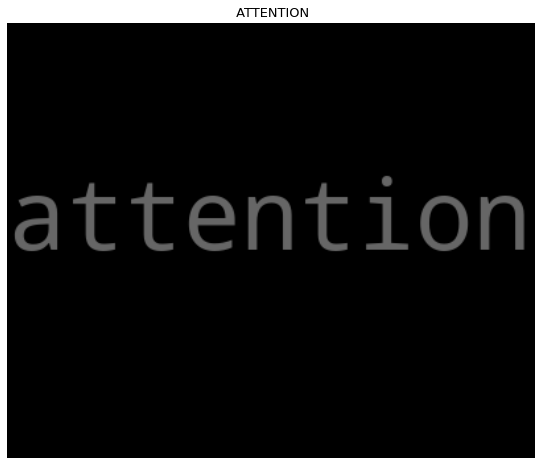

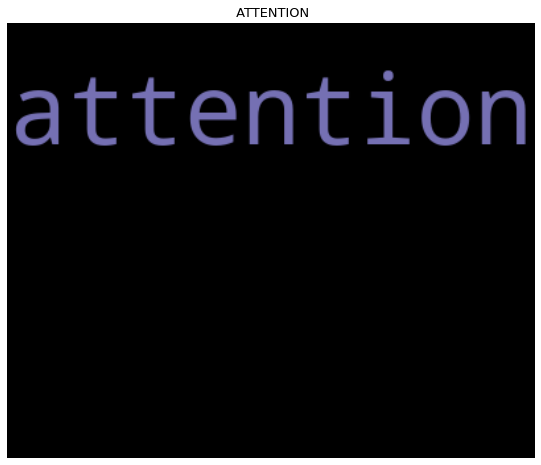

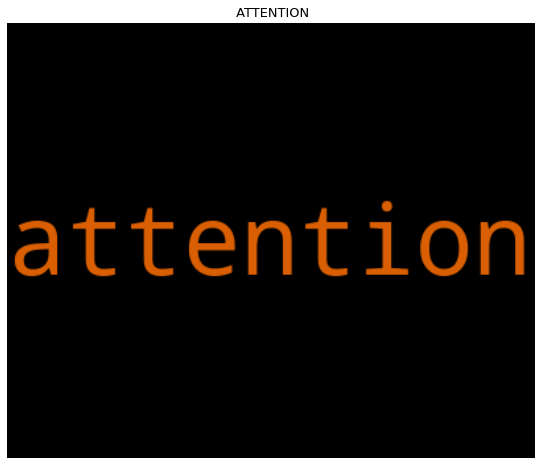

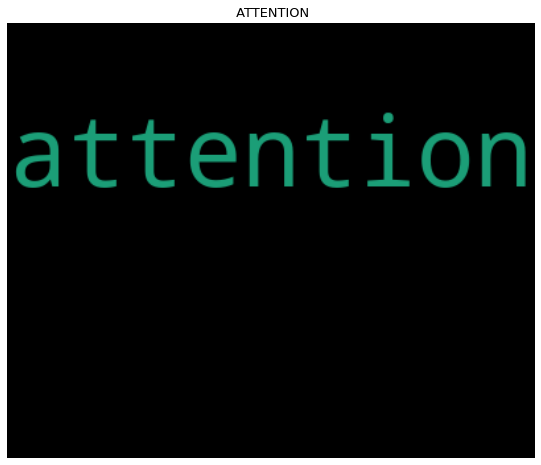

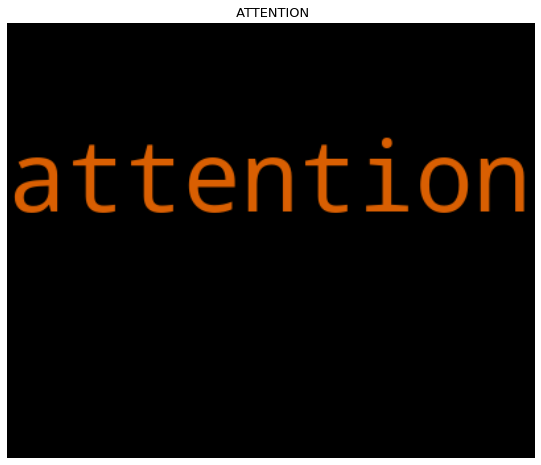

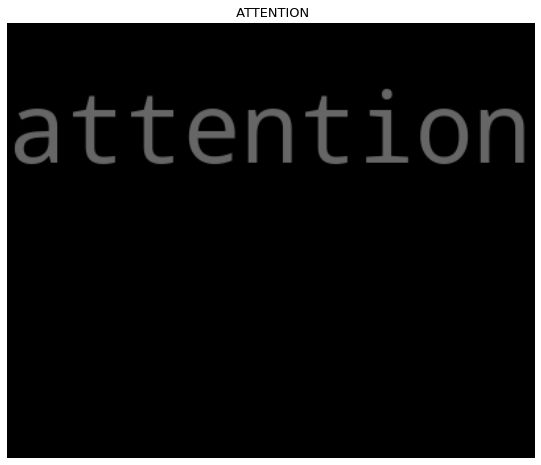

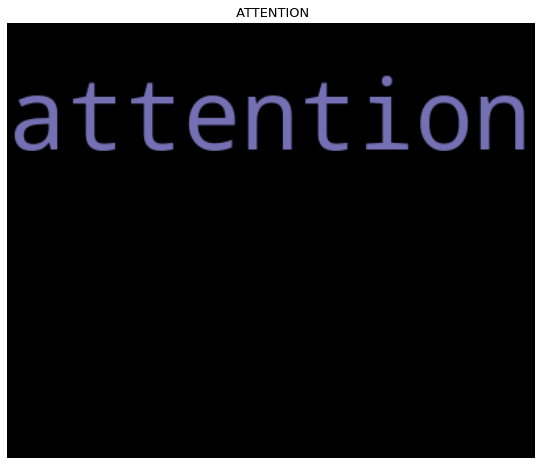

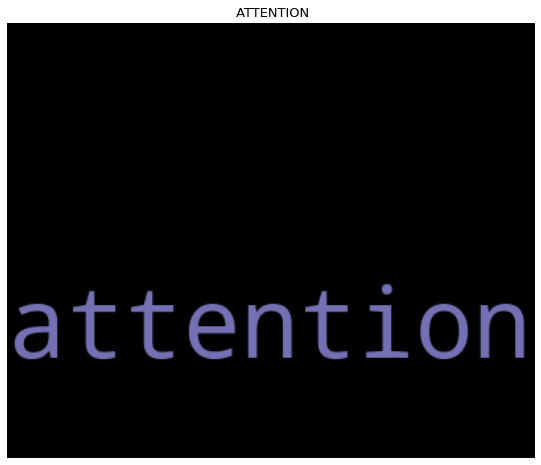

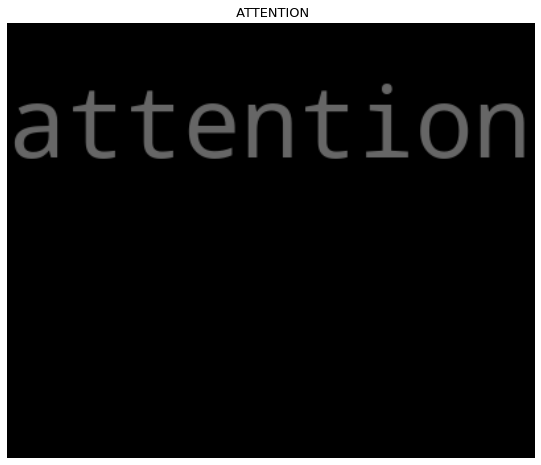

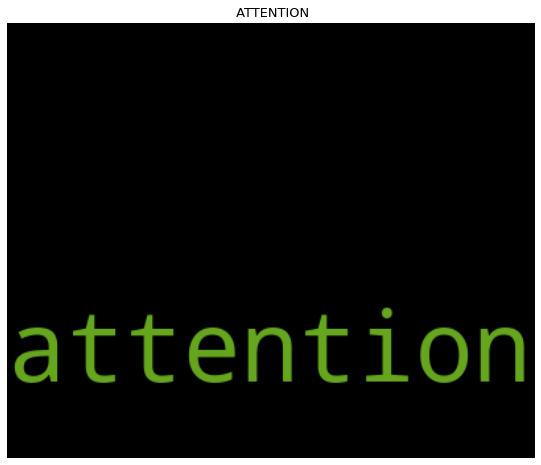

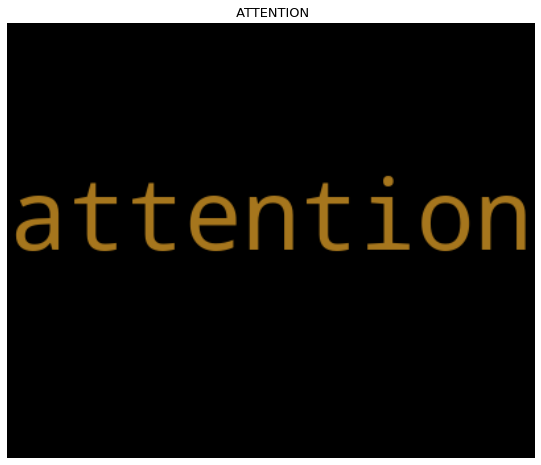

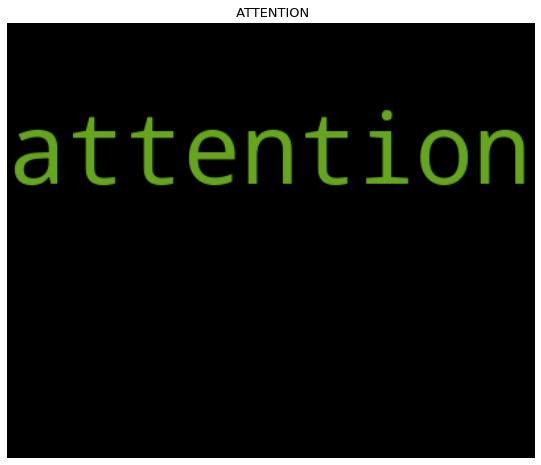

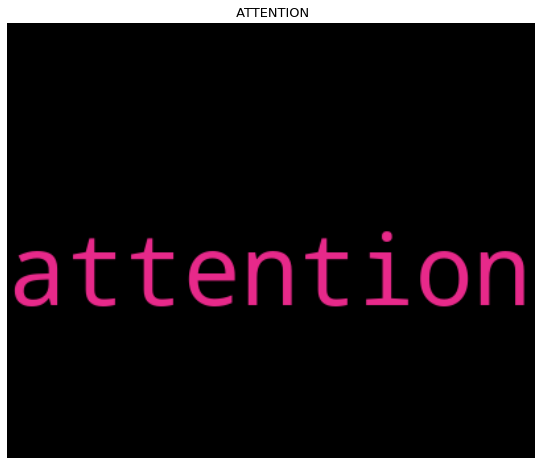

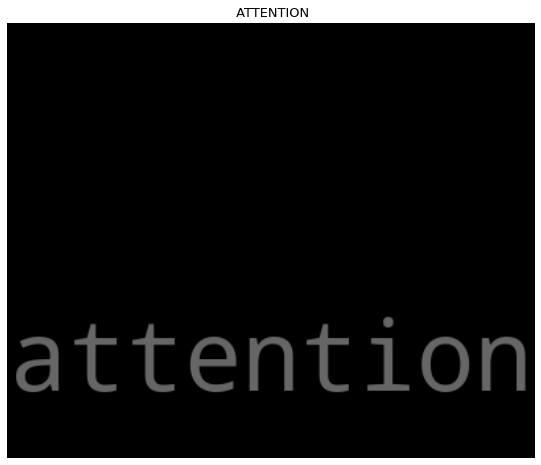

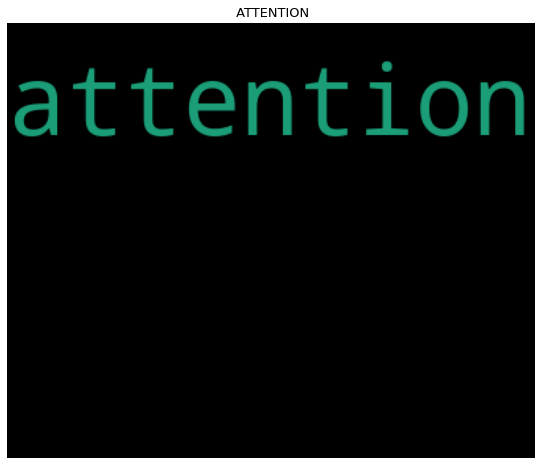

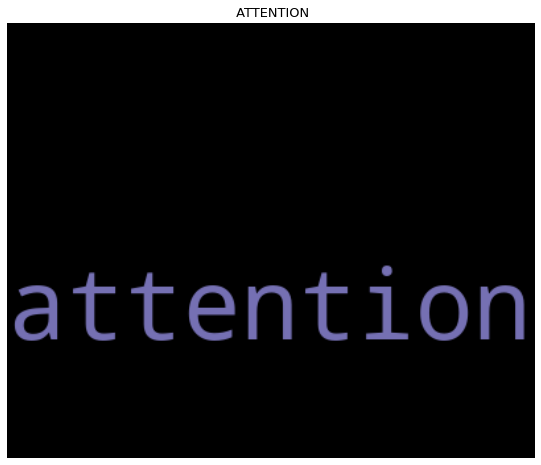

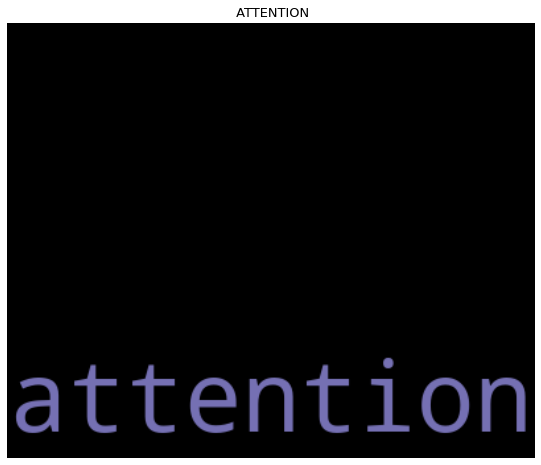

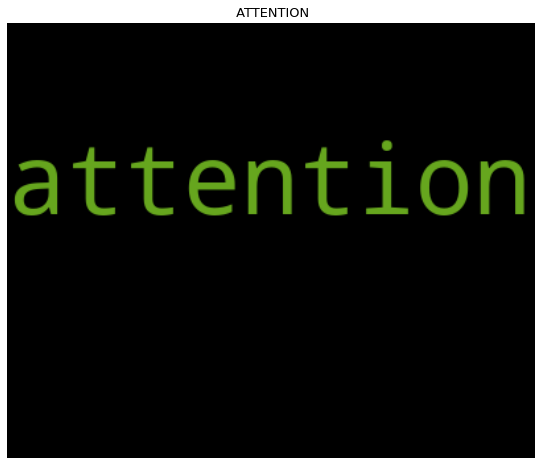

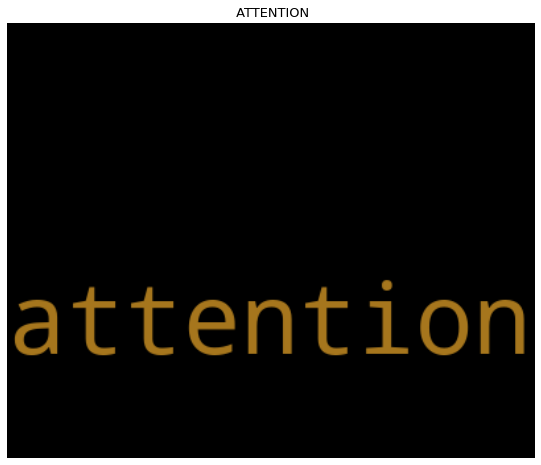

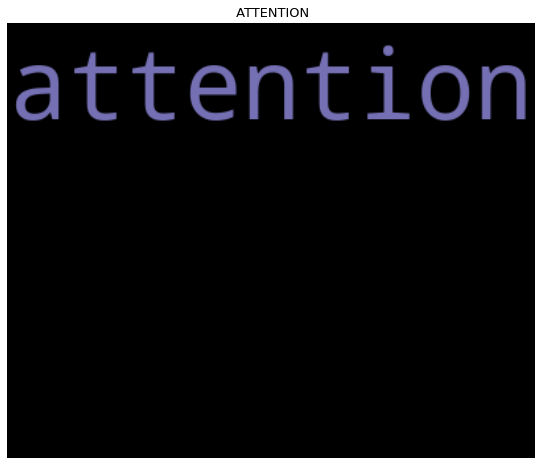

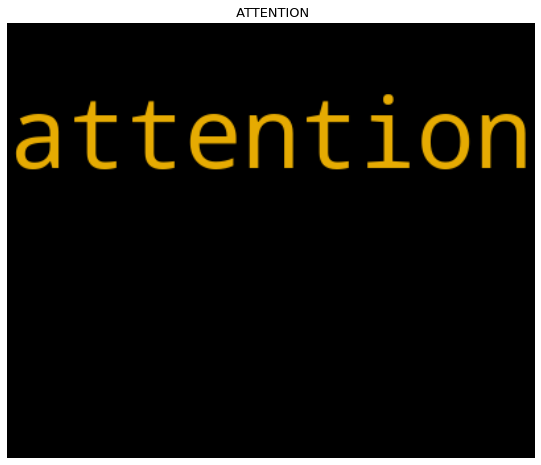

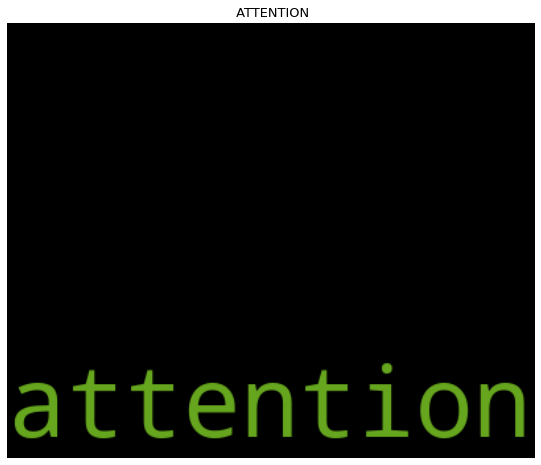

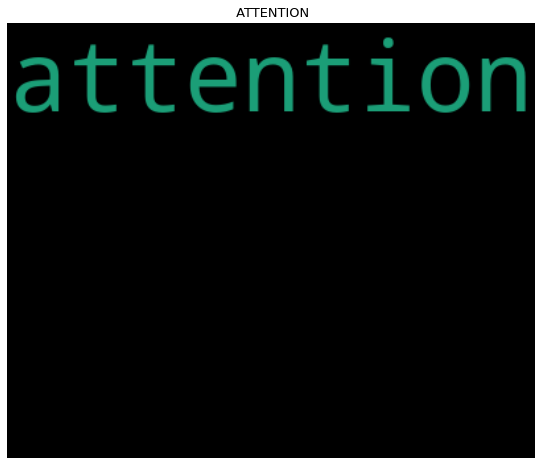

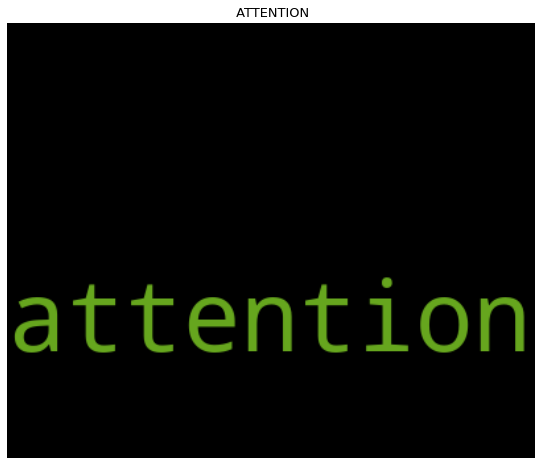

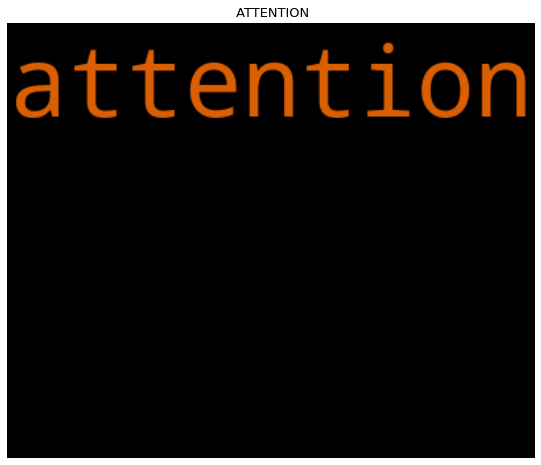

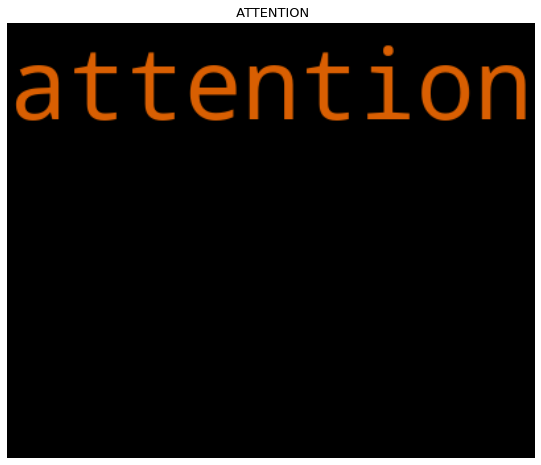

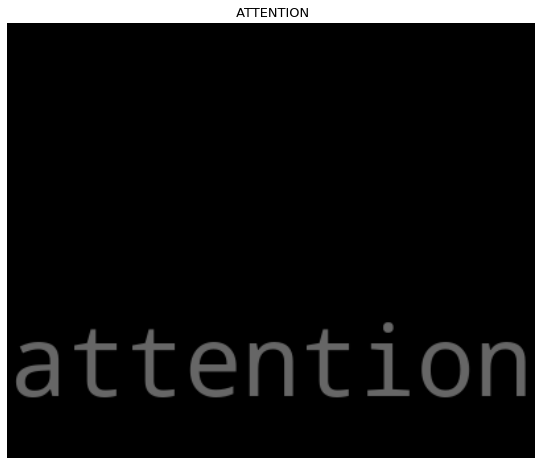

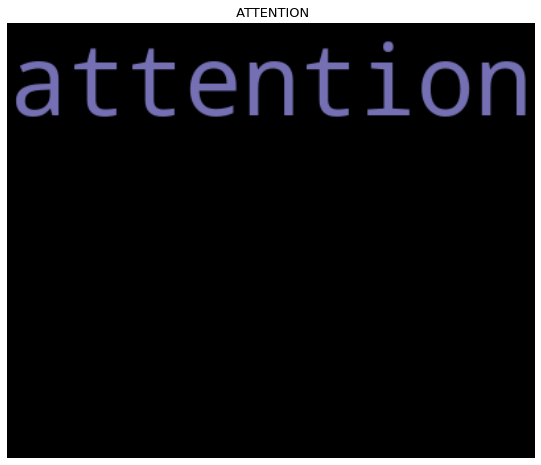

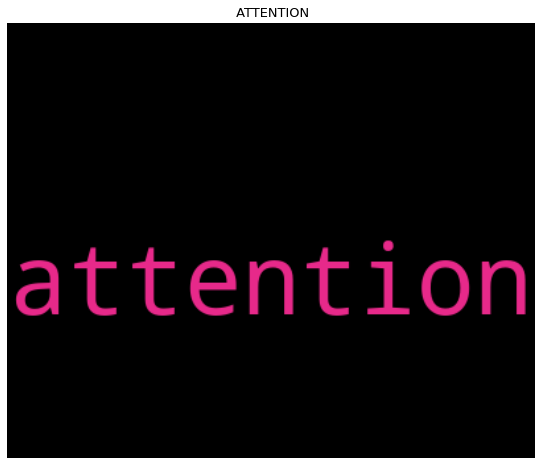

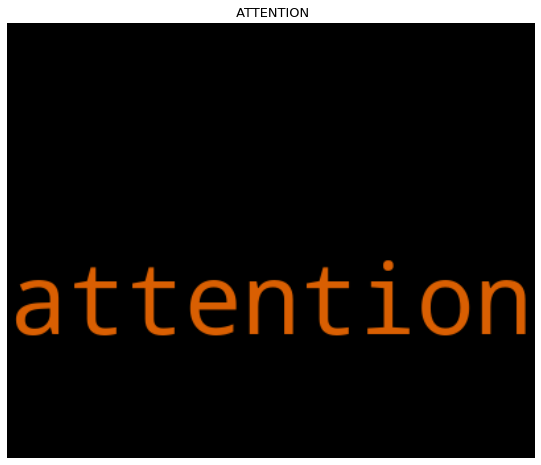

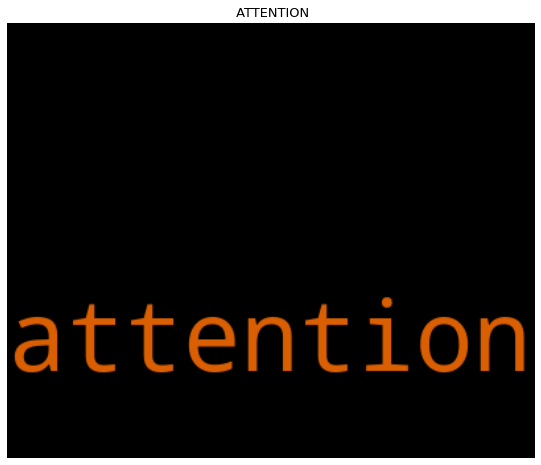

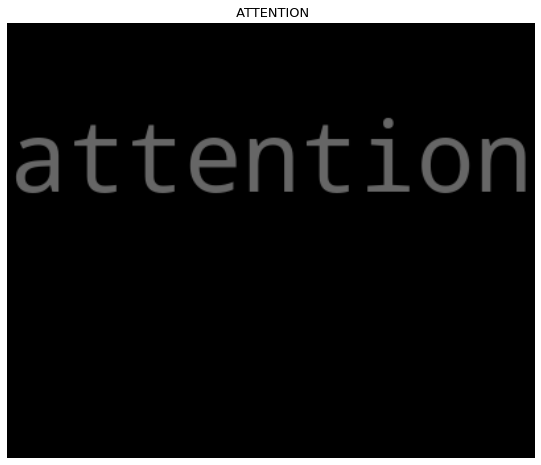

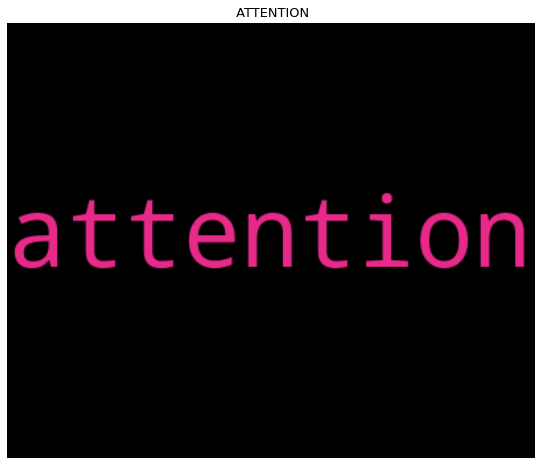

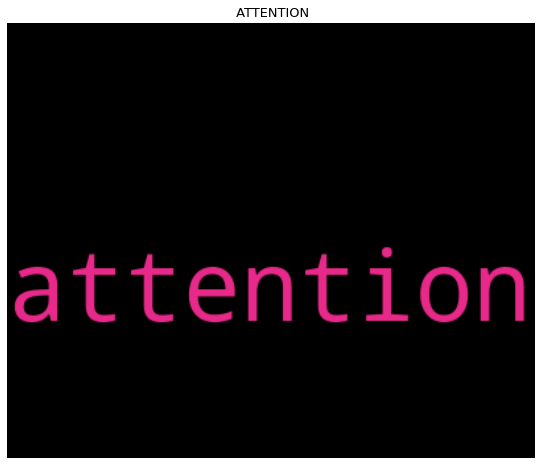

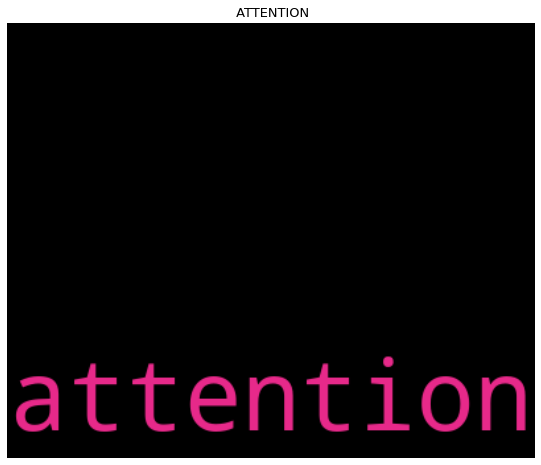

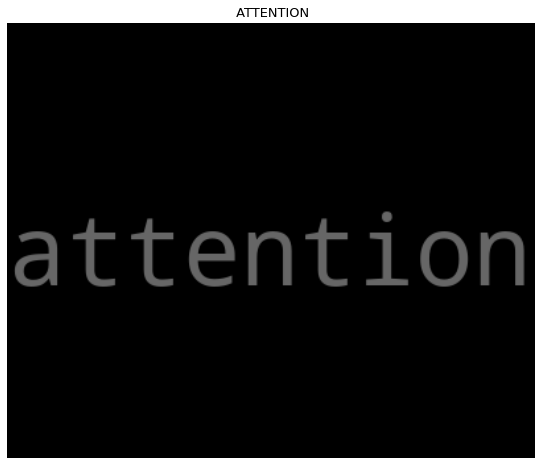

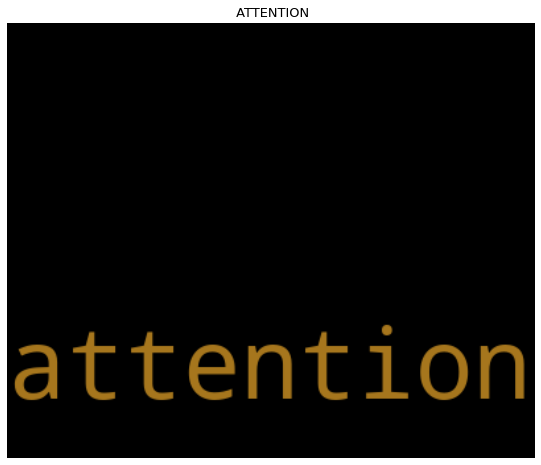

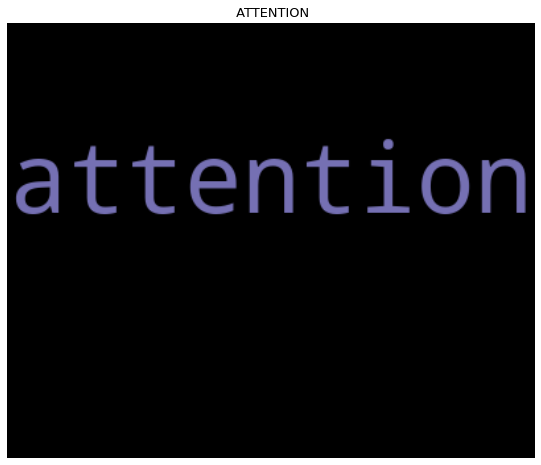

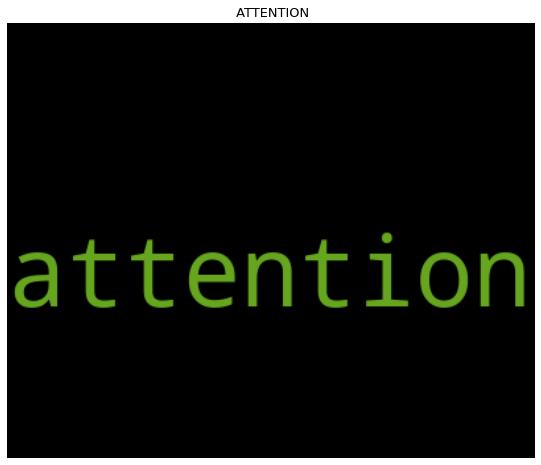

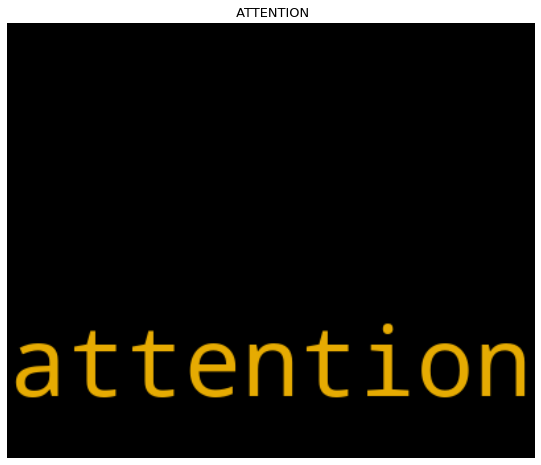

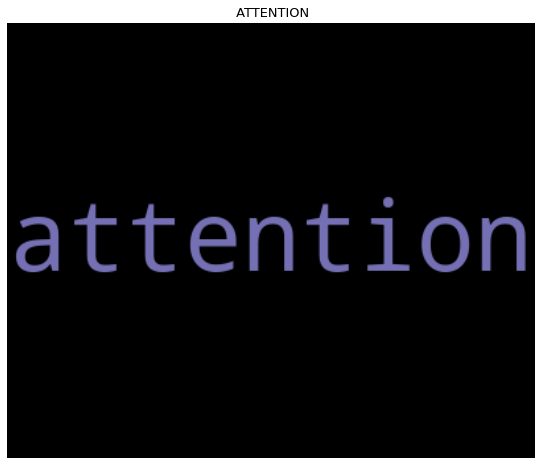

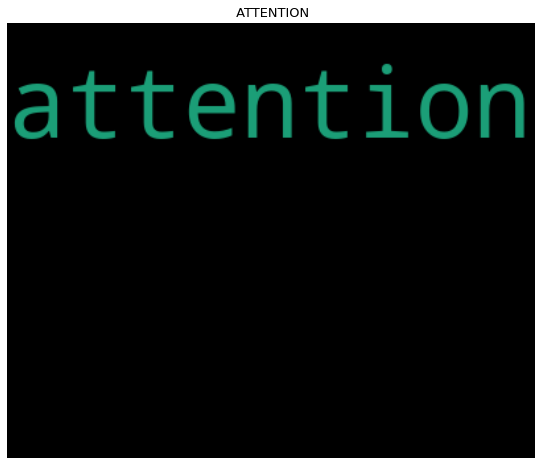

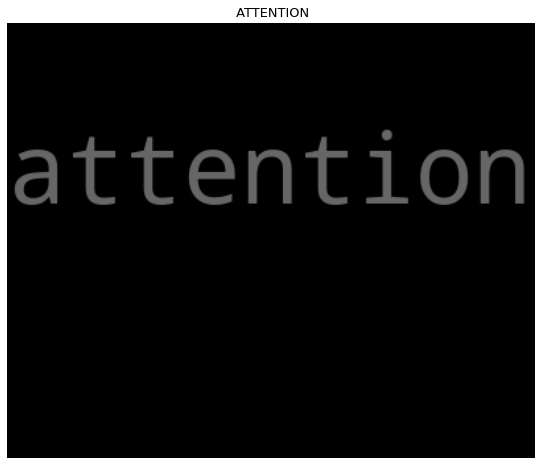

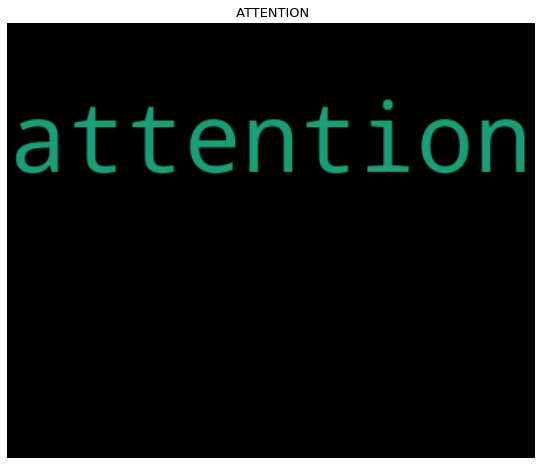

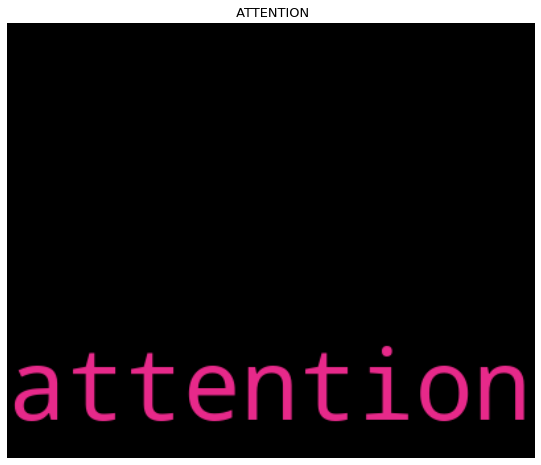

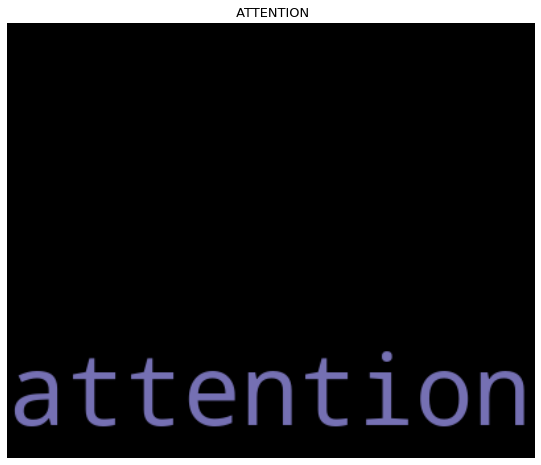

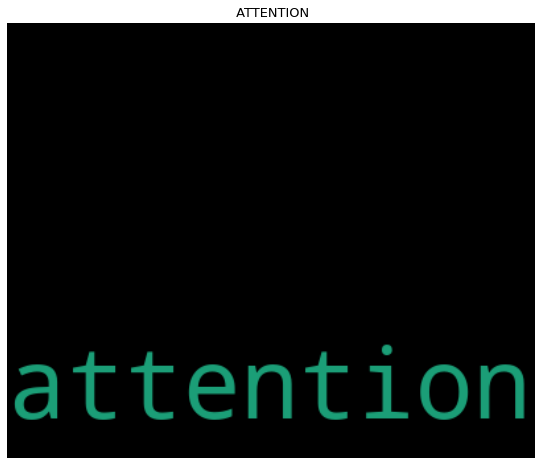

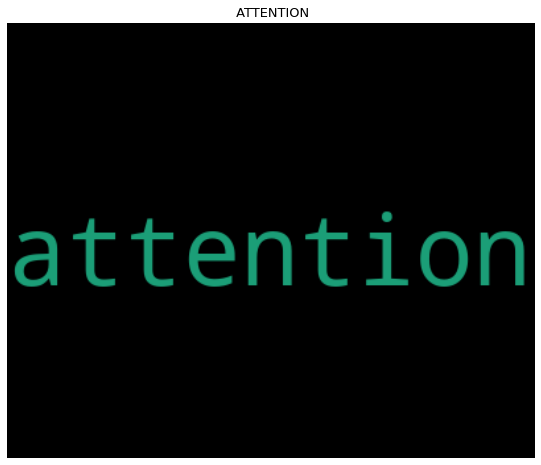

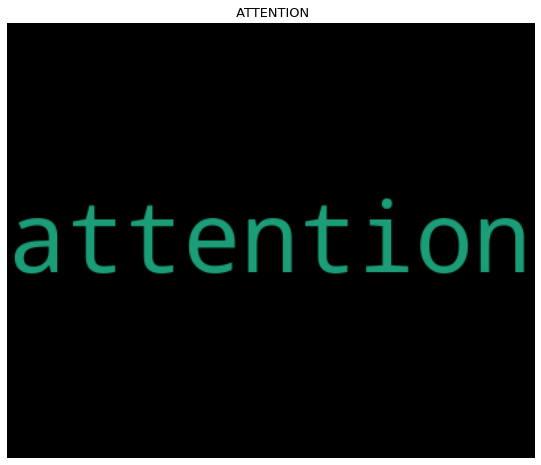

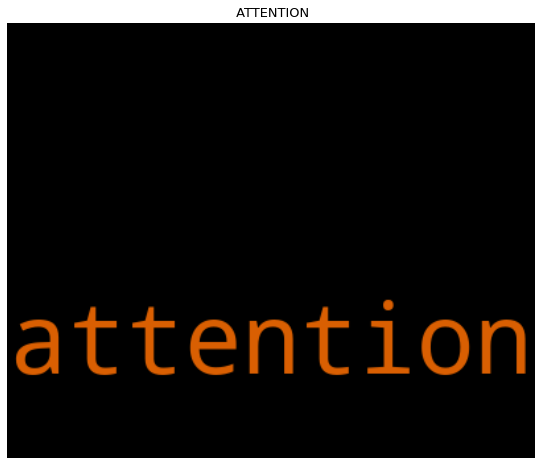

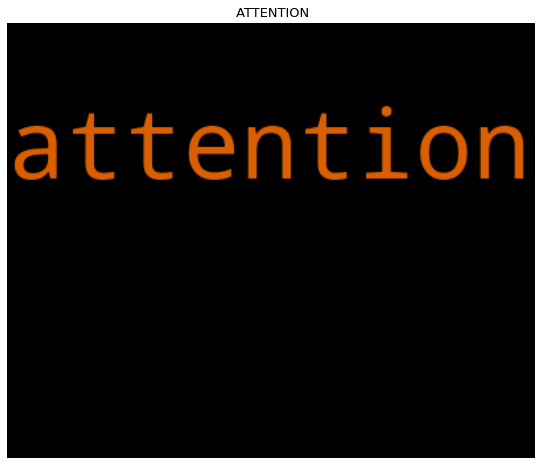

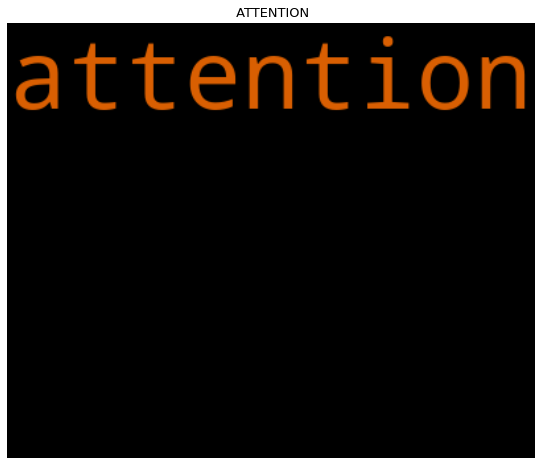

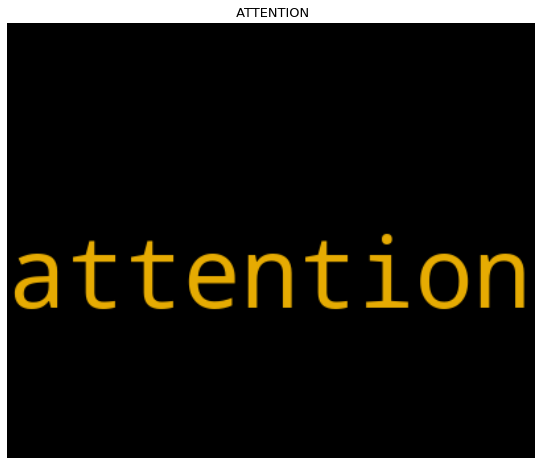

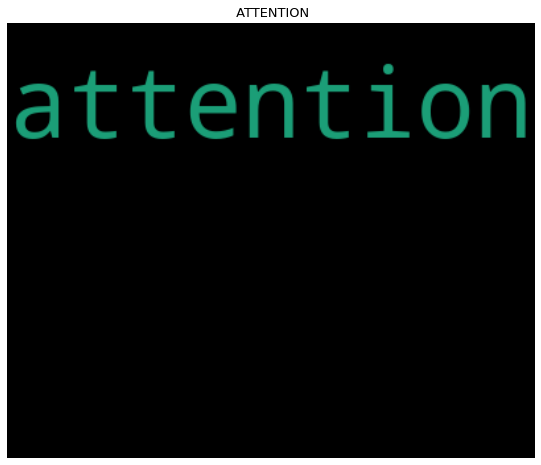

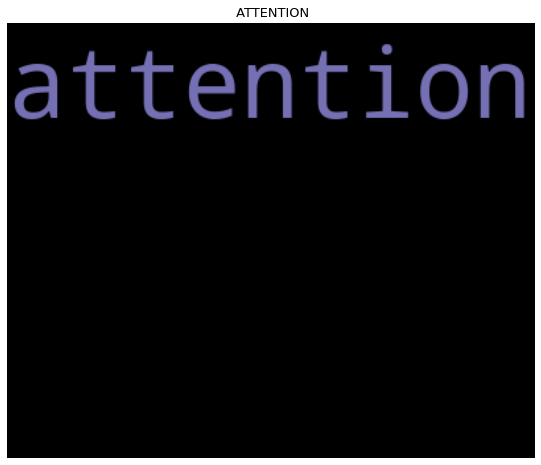

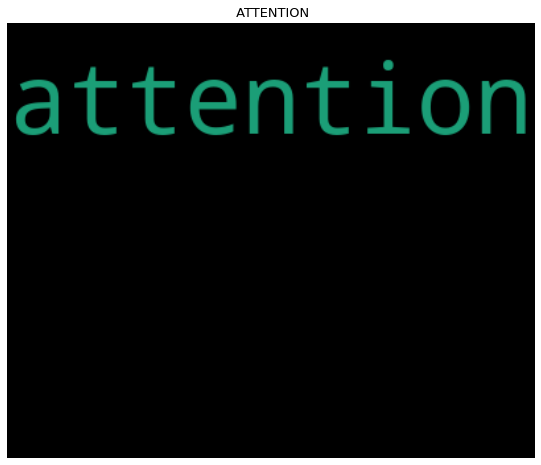

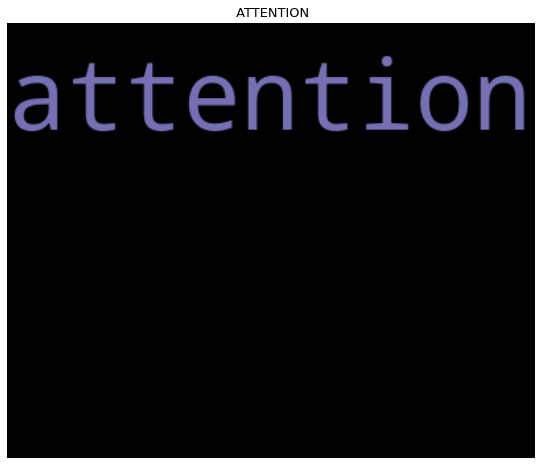

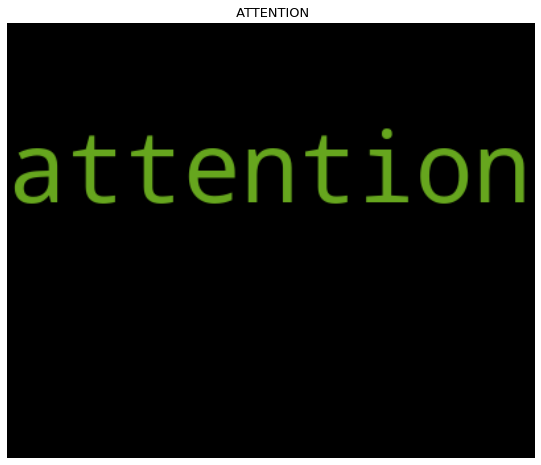

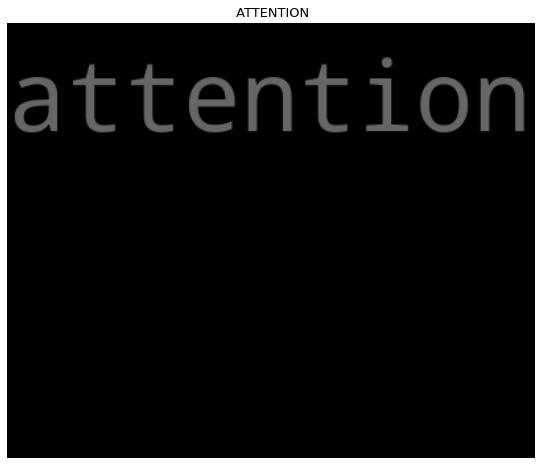

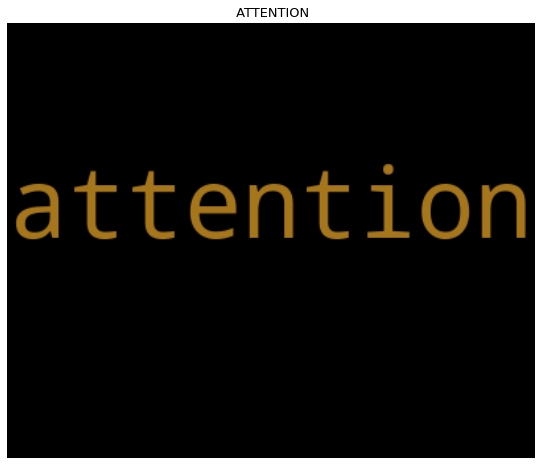

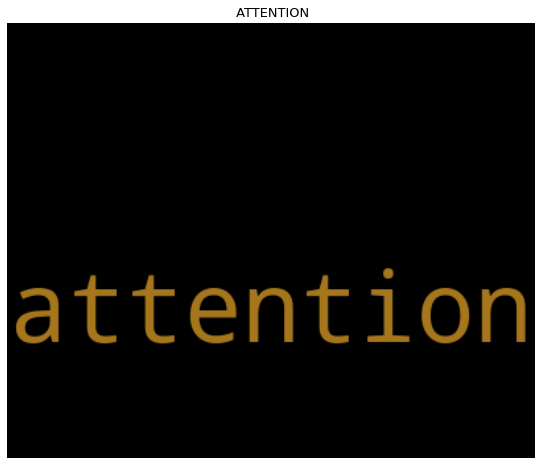

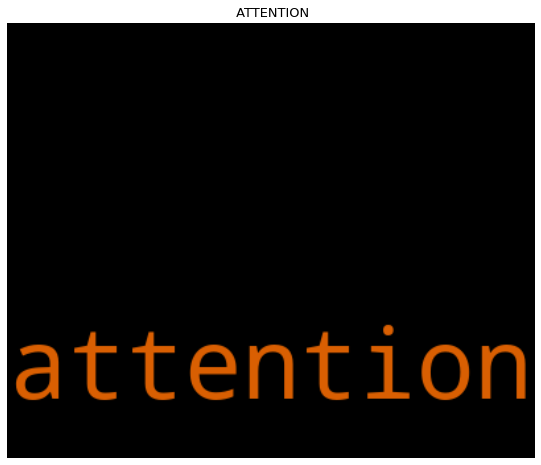

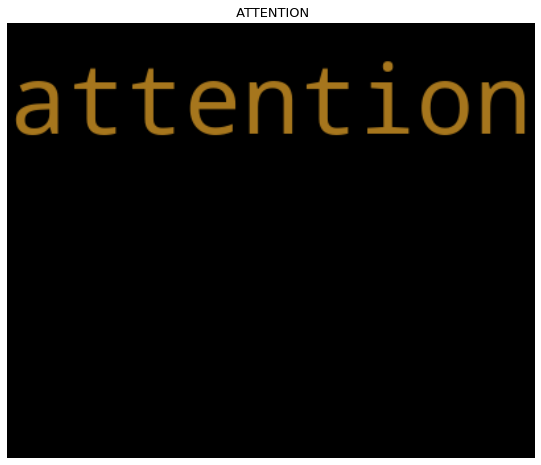

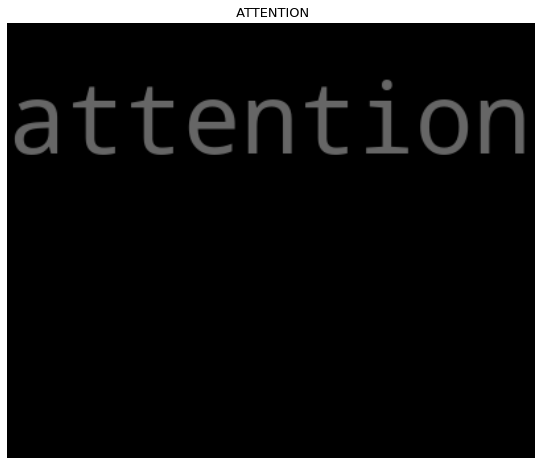

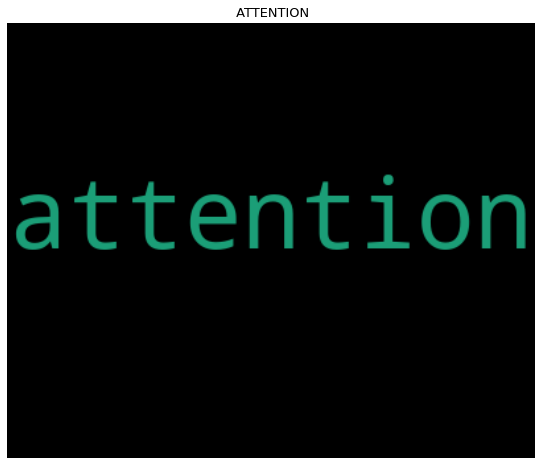

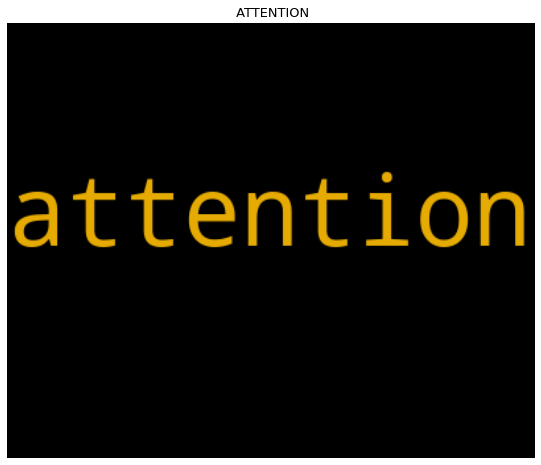

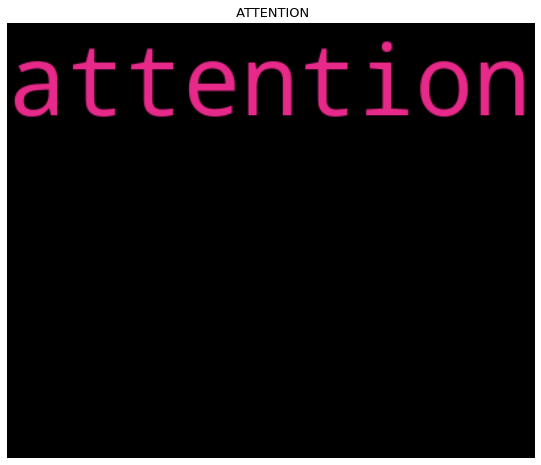

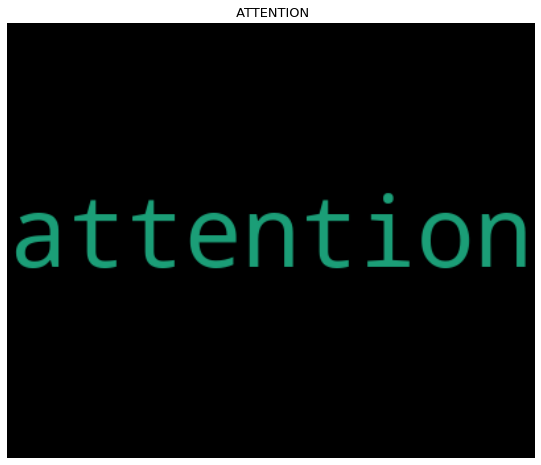

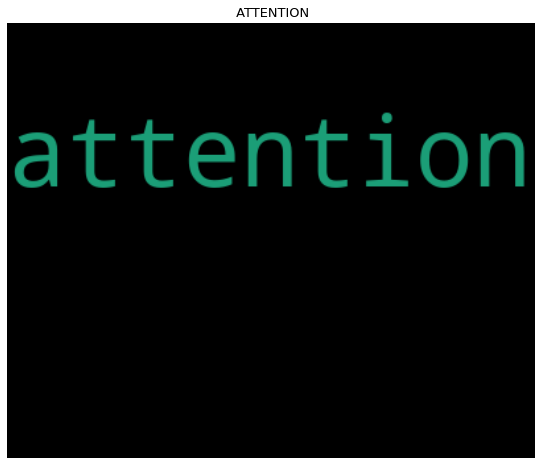

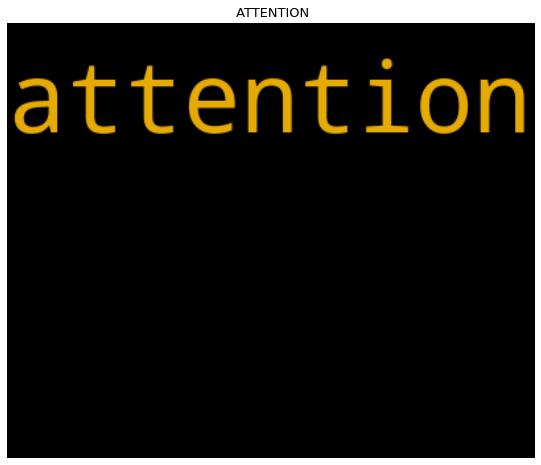

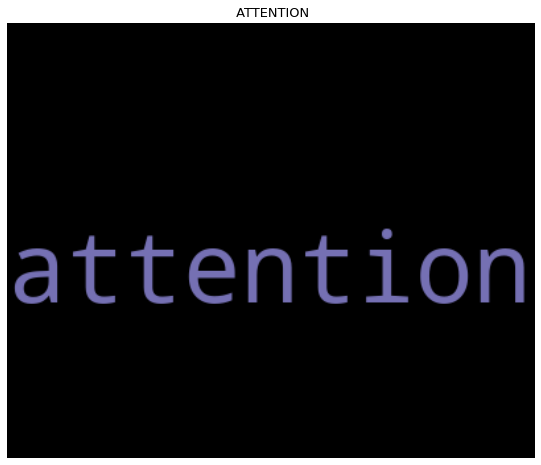

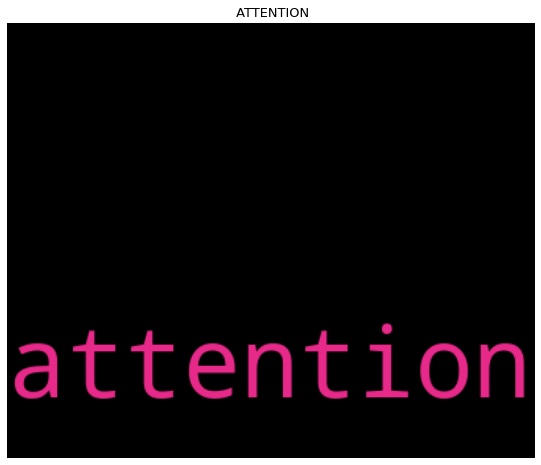

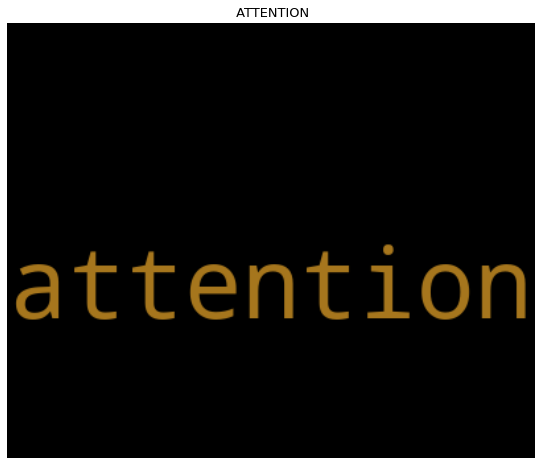

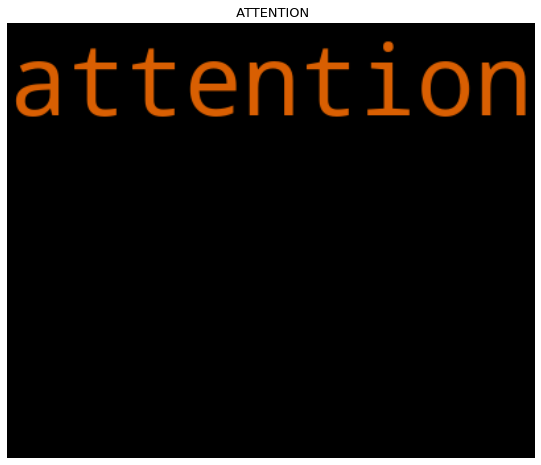

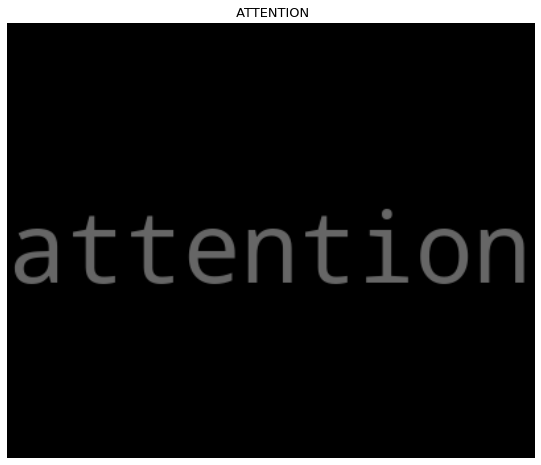

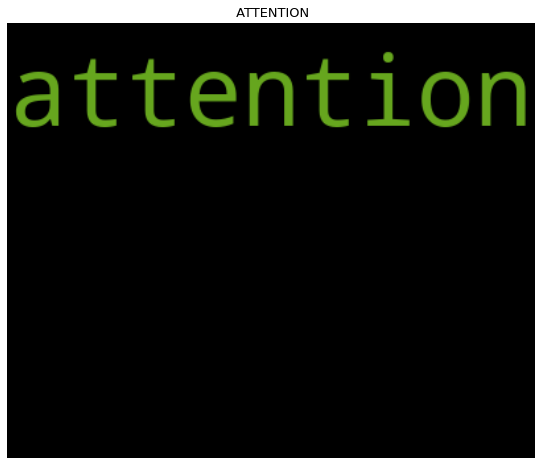

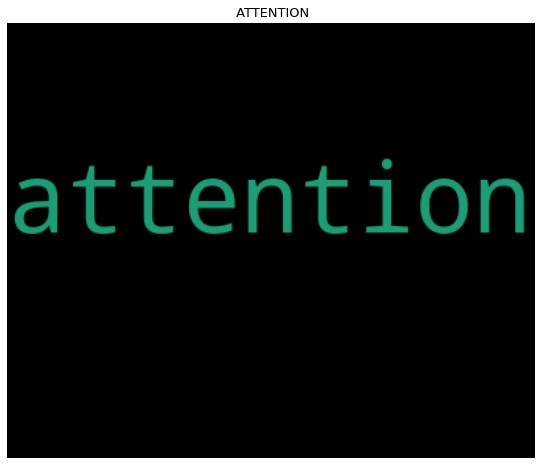

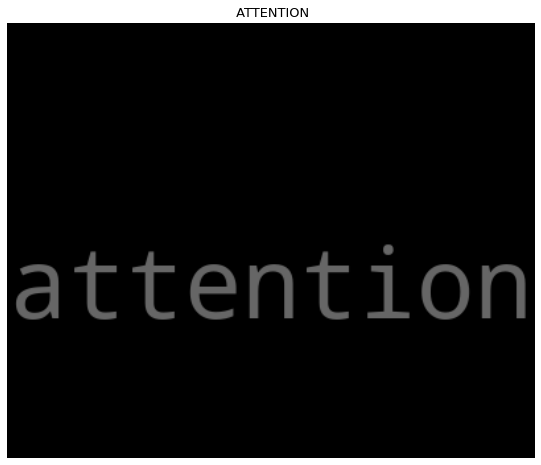

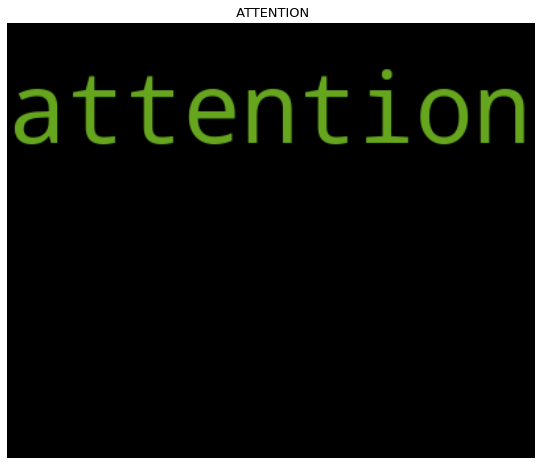

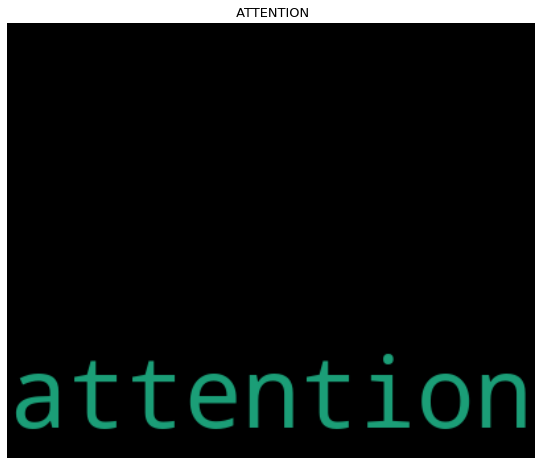

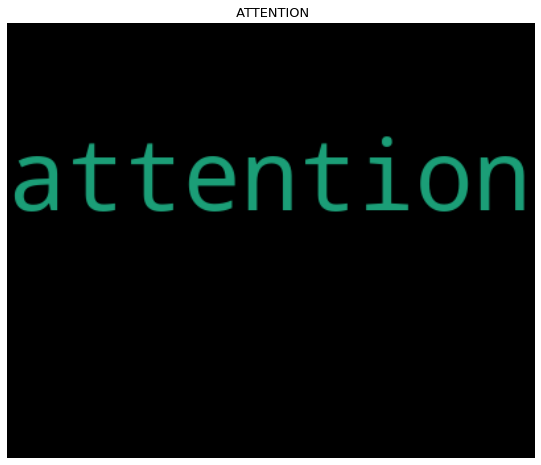

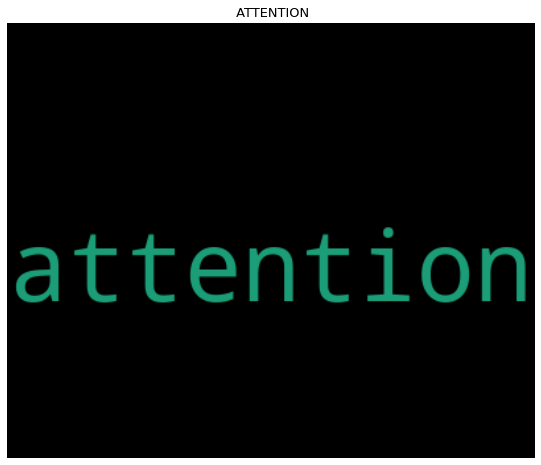

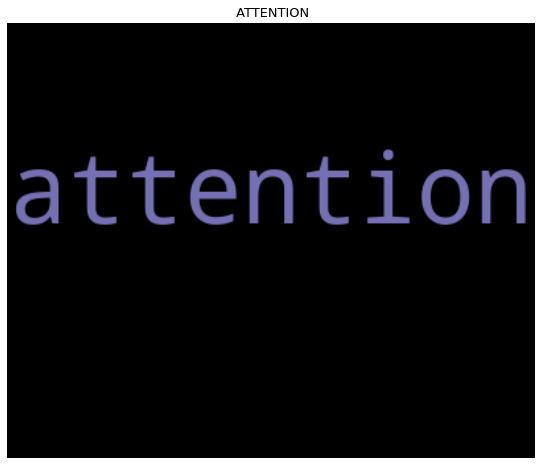

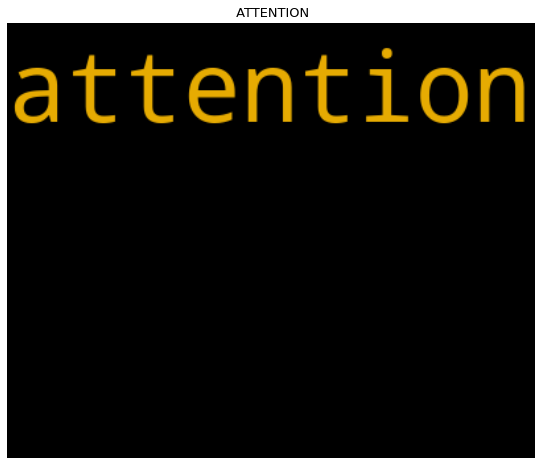

In [ ]:
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[subject].sort_values(ascending=False), subject)